# compare BNB and EXTBNB data to MC-BNB/DATA cosmic overlay 

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from matplotlib.pylab import *
import matplotlib.patches as patches
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


# import data

In [24]:
debug = 1
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/ComparisonsPlayground/'

In [3]:
Nevents

{'MC-BNB/Cosmic-DATA overlay': 96350,
 'MC-BNB/Cosmic-DATA overlay POT': 9.773e+19,
 'MC-BNB/Cosmic-MC overlay': 358800,
 'MC-BNB/Cosmic-MC overlay POT': 3.61901e+20,
 'OffBeam after sof.trig.': 380602,
 'OffBeam before sof.trig.': 8529852.084267145,
 'OffBeam sof.trig. efficiency': 0.04462,
 'OnBeam POT': 4.93e+19,
 'OnBeam after sof.trig.': 544114,
 'OnBeam before sof.trig.': 10596183.05744888,
 'OnBeam sof.trig. efficiency': 0.05135,
 'v04 after sof.trig.': 378787,
 'v05 after sof.trig.': 1815}

## (1) Off-Beam from two samples
the infamous "inconsistent process history" issue
separate the list into two lists 
corresponding to files that were swizzled using v04_26_04_% and v05_08_00_%

In [4]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

104447 pairs from Off-Beam
64134 pairs from Off-Beam in FV


## (2) On-Beam sample

In [5]:
OnBeam = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_bnb_v8_mcc8_vertices.csv')
OnBeamFV = sample_in_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeamFV),'pairs from On-Beam in FV'

162057 pairs from On-Beam
100379 pairs from On-Beam in FV


## (3) MC-BNB + Cosmic DATA overlay 

In [6]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


$\mu p$ eff. $\mu p$ pur. CC$0\pi 1 p$ eff.  \
no cut                       100.0%        12.6%            100.0%   
non-collinearity first        90.4%        45.3%             94.8%   
PIDa                          79.9%        45.6%             76.1%   
length                        64.0%        59.4%             63.9%   
non-collinearity              58.5%        70.8%             61.4%   
vertex activity               34.2%        78.3%             53.2%   
delta phi                     24.1%        87.7%             47.9%   
theta_pq                      17.5%        95.4%             39.4%   
Pt no Delta phi               24.7%        88.7%             46.1%   
soft Pt                       20.2%        94.6%             42.9%   
soft Pmiss                    16.3%        95.4%             37.3%   
tight Pt                       9.3%        95.7%             22.4%   
PIDa-                         83.3%        43.5%             79.4%   
PIDa+                         75.4%        46.8%             71.1%   
theta12-                      56.3%        72.2%             60.2%   
theta12+                      60.4%        70.0%             62.6%   
RdQ-                          32.8%        78.9%             51.6%   
RdQ+                          35.9%        76.6%             54.1%   
delta_phi-                    23.0%        88.9%             46.9%   
delta_phi+                    25.1%        87.3%             48.6%   
Pt-                           18.3%        94.7%             40.4%   
Pt+                           21.3%        94.4%             44.7%   
theta_pq-                     12.3%        96.3%             29.4%   
theta_pq+                     20.6%        94.9%             44.2%   

                       CC$0\pi 1 p$ pur.  \
no cut                              4.1%   
non-collinearity first             15.4%   
PIDa                               14.0%   
length                             19.2%   
non-collinearity                   24.0%   
vertex activity                    39.4%   
delta phi                          56.3%   
theta_pq                           69.4%   
Pt no Delta phi                    53.6%   
soft Pt                            65.1%   
soft Pmiss                         70.7%   
tight Pt                           74.9%   
PIDa-                              13.4%   
PIDa+                              14.3%   
theta12-                           25.0%   
theta12+                           23.5%   
RdQ-                               40.1%   
RdQ+                               37.3%   
delta_phi-                         58.7%   
delta_phi+                         54.7%   
Pt-                                67.7%   
Pt+                                64.1%   
theta_pq-                          74.5%   
theta_pq+                          65.8%   

                                                                    label  \
no cut                                                             no cut   
non-collinearity first                         $|\theta_{1,2}-90^0|<60^0$   
PIDa                                                         ${PID}_a>12$   
length                                                    $l_{\mu}>l_{p}$   
non-collinearity                               $|\theta_{1,2}-90^0|<60^0$   
vertex activity         $\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...   
delta phi                                      $|\Delta \phi - \pi|<40^0$   
theta_pq                                               $\theta_{pq}<25^0$   
Pt no Delta phi                                        $p_{t}<0.35$ GeV/c   
soft Pt                                                $p_{t}<0.35$ GeV/c   
soft Pmiss                                          $p_{miss}<0.30$ GeV/c   
tight Pt                                               $p_{t}<0.15$ GeV/c   
PIDa-                                                        ${PID}_a>11$   
PIDa+                                                        ${PID}_a>13$   
theta12-        

In [7]:
len(pureff_MCbnbDATAcosmic)

24

In [13]:
reduced_OffBeam = dict()
reduced_OnBeam = dict()

reduced_OffBeam['no cut'] = OffBeamFV
reduced_OnBeam['no cut'] = OnBeamFV

# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['no cut']
reduced_OffBeam['non-collinearity first'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['non-collinearity first'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]



# cut 1: PIDa
PIDaCut = 12
sam = reduced_OffBeam['no cut']
reduced_OffBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]


# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['PIDa']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]
sam = reduced_OnBeam['PIDa']
reduced_OnBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]


# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['length']
reduced_OnBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]


# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru = 'RdQaroundVertex[plane 0]'+box_str
Rv = 'RdQaroundVertex[plane 1]'+box_str
Ry = 'RdQaroundVertex[plane 2]'+box_str    
reduced_MCbnbDATAcosmic = dict()
r_max_RdQ_CC1p0pi = 0.33
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
sam = reduced_OnBeam['non-collinearity']
reduced_OnBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]


# cut 5: \Delta \phi
delta_Delta_phi = 40
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
sam = reduced_OnBeam['vertex activity']
reduced_OnBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]


# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]
sam = reduced_OnBeam['delta phi']
reduced_OnBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

# lets get to buissiness

# How do the samples look like before and after the application of the $\theta_{1,2}$ cut?

In [14]:

# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -
# Nov-9,2017
def plot_OnBeam(OnBeamSample=None,OnBeamFV=None
                , var='PIDa_assigned_proton' , x_label='$PID_a^p$'                 
                , bins=np.linspace(0,30,31)                 
                , ax=None, figsize=(14,6),fontsize=25                
                , color='royalblue'                            
                , do_add_legend=True , legend_loc='best'):
    bin_width = bins[1]-bins[0]
    if ax is None: fig,ax=plt.subplots(figsize=figsize)
    x = OnBeamSample[var]
    h_OnBeam,edges = np.histogram( x , bins=bins )
    h_OnBeam_err = np.sqrt(h_OnBeam)
    
    plt.errorbar( x = bins[:-1], xerr=bin_width/2.
                 , y=h_OnBeam , yerr=h_OnBeam_err
                 , fmt='o', color=color , ecolor='black'
                 , label='BNB (%d=%.1f'%(len(OnBeamSample),100*float(len(OnBeamSample))/len(OnBeamFV))+'%)'
                )
    plt.plot([0,0],[0,0],'--',color='black',linewidth=2)
    
    set_axes(ax,x_label=x_label,y_label='counts',do_add_grid=True,fontsize=fontsize
             ,xlim=(np.min(bins)-bin_width,np.max(bins)+bin_width)
            )
    if do_add_legend: 
        if legend_loc=='bbox':
            leg=plt.legend(bbox_to_anchor=(1.,1.05),fontsize=fontsize,loc=2)
        else:
            leg=plt.legend(fontsize=fontsize,loc=legend_loc)
    plt.tight_layout()
    return ax,leg
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -

In [25]:
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -
# Dec-4,2017
def draw_var(cut_name=None,var=None,x_label=None,bins=None,debug=0
             ,do_cosmic_only=True,do_bnb_only=True
             ,chi2_xrange=None,chi2_xy=None
             ,reduced_OnBeam=None,reduced_OffBeam=None,MCbnbDATAcosmicSamples=None
             ,do_save_fig=False):

    Nsubplots = 1
    i_subplot = 0
    if do_cosmic_only: Nsubplots += 1
    if do_bnb_only: Nsubplots += 1
        
    fig = plt.figure(figsize=(16,6*Nsubplots))        
    if do_cosmic_only:
        i_subplot+=1
        ax = fig.add_subplot(Nsubplots,1,i_subplot)
        ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam[cut_name]
                                     ,OffBeamFV=OffBeamFV,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                                     ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples[cut_name]['cosmic']
                                     ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')
    if do_bnb_only:
        i_subplot+=1
        ax = fig.add_subplot(Nsubplots,1,i_subplot)
        ax,leg=plot_OnBeam(OnBeamSample=reduced_OnBeam[cut_name],OnBeamFV=OnBeamFV
                                     ,var=var , color='royalblue' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')

    ax = fig.add_subplot(Nsubplots,1,Nsubplots)
    ax,leg=OnBeam_minus_OffBeam_1d(debug=debug
                                   ,OnBeamSample=reduced_OnBeam[cut_name] 
                                   ,OffBeamSample=reduced_OffBeam[cut_name] 
                                   ,MCsamples=reduced_MCbnbDATAcosmicSamples[cut_name]
                                   ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                                   ,var=var
                                   ,x_label=x_label 
                                   ,bins=bins 
                                   ,ax=ax
                                   ,legend_loc='bbox'                                       
                                   ,do_add_chi2_MC_data=True , chi2_xrange=chi2_xrange, chi2_xy=chi2_xy)
    if do_save_fig:
        plt.savefig(figures_path+var+'_'+'after_cut_'+cut_name+'.pdf', bbox_inches='tight')    
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -




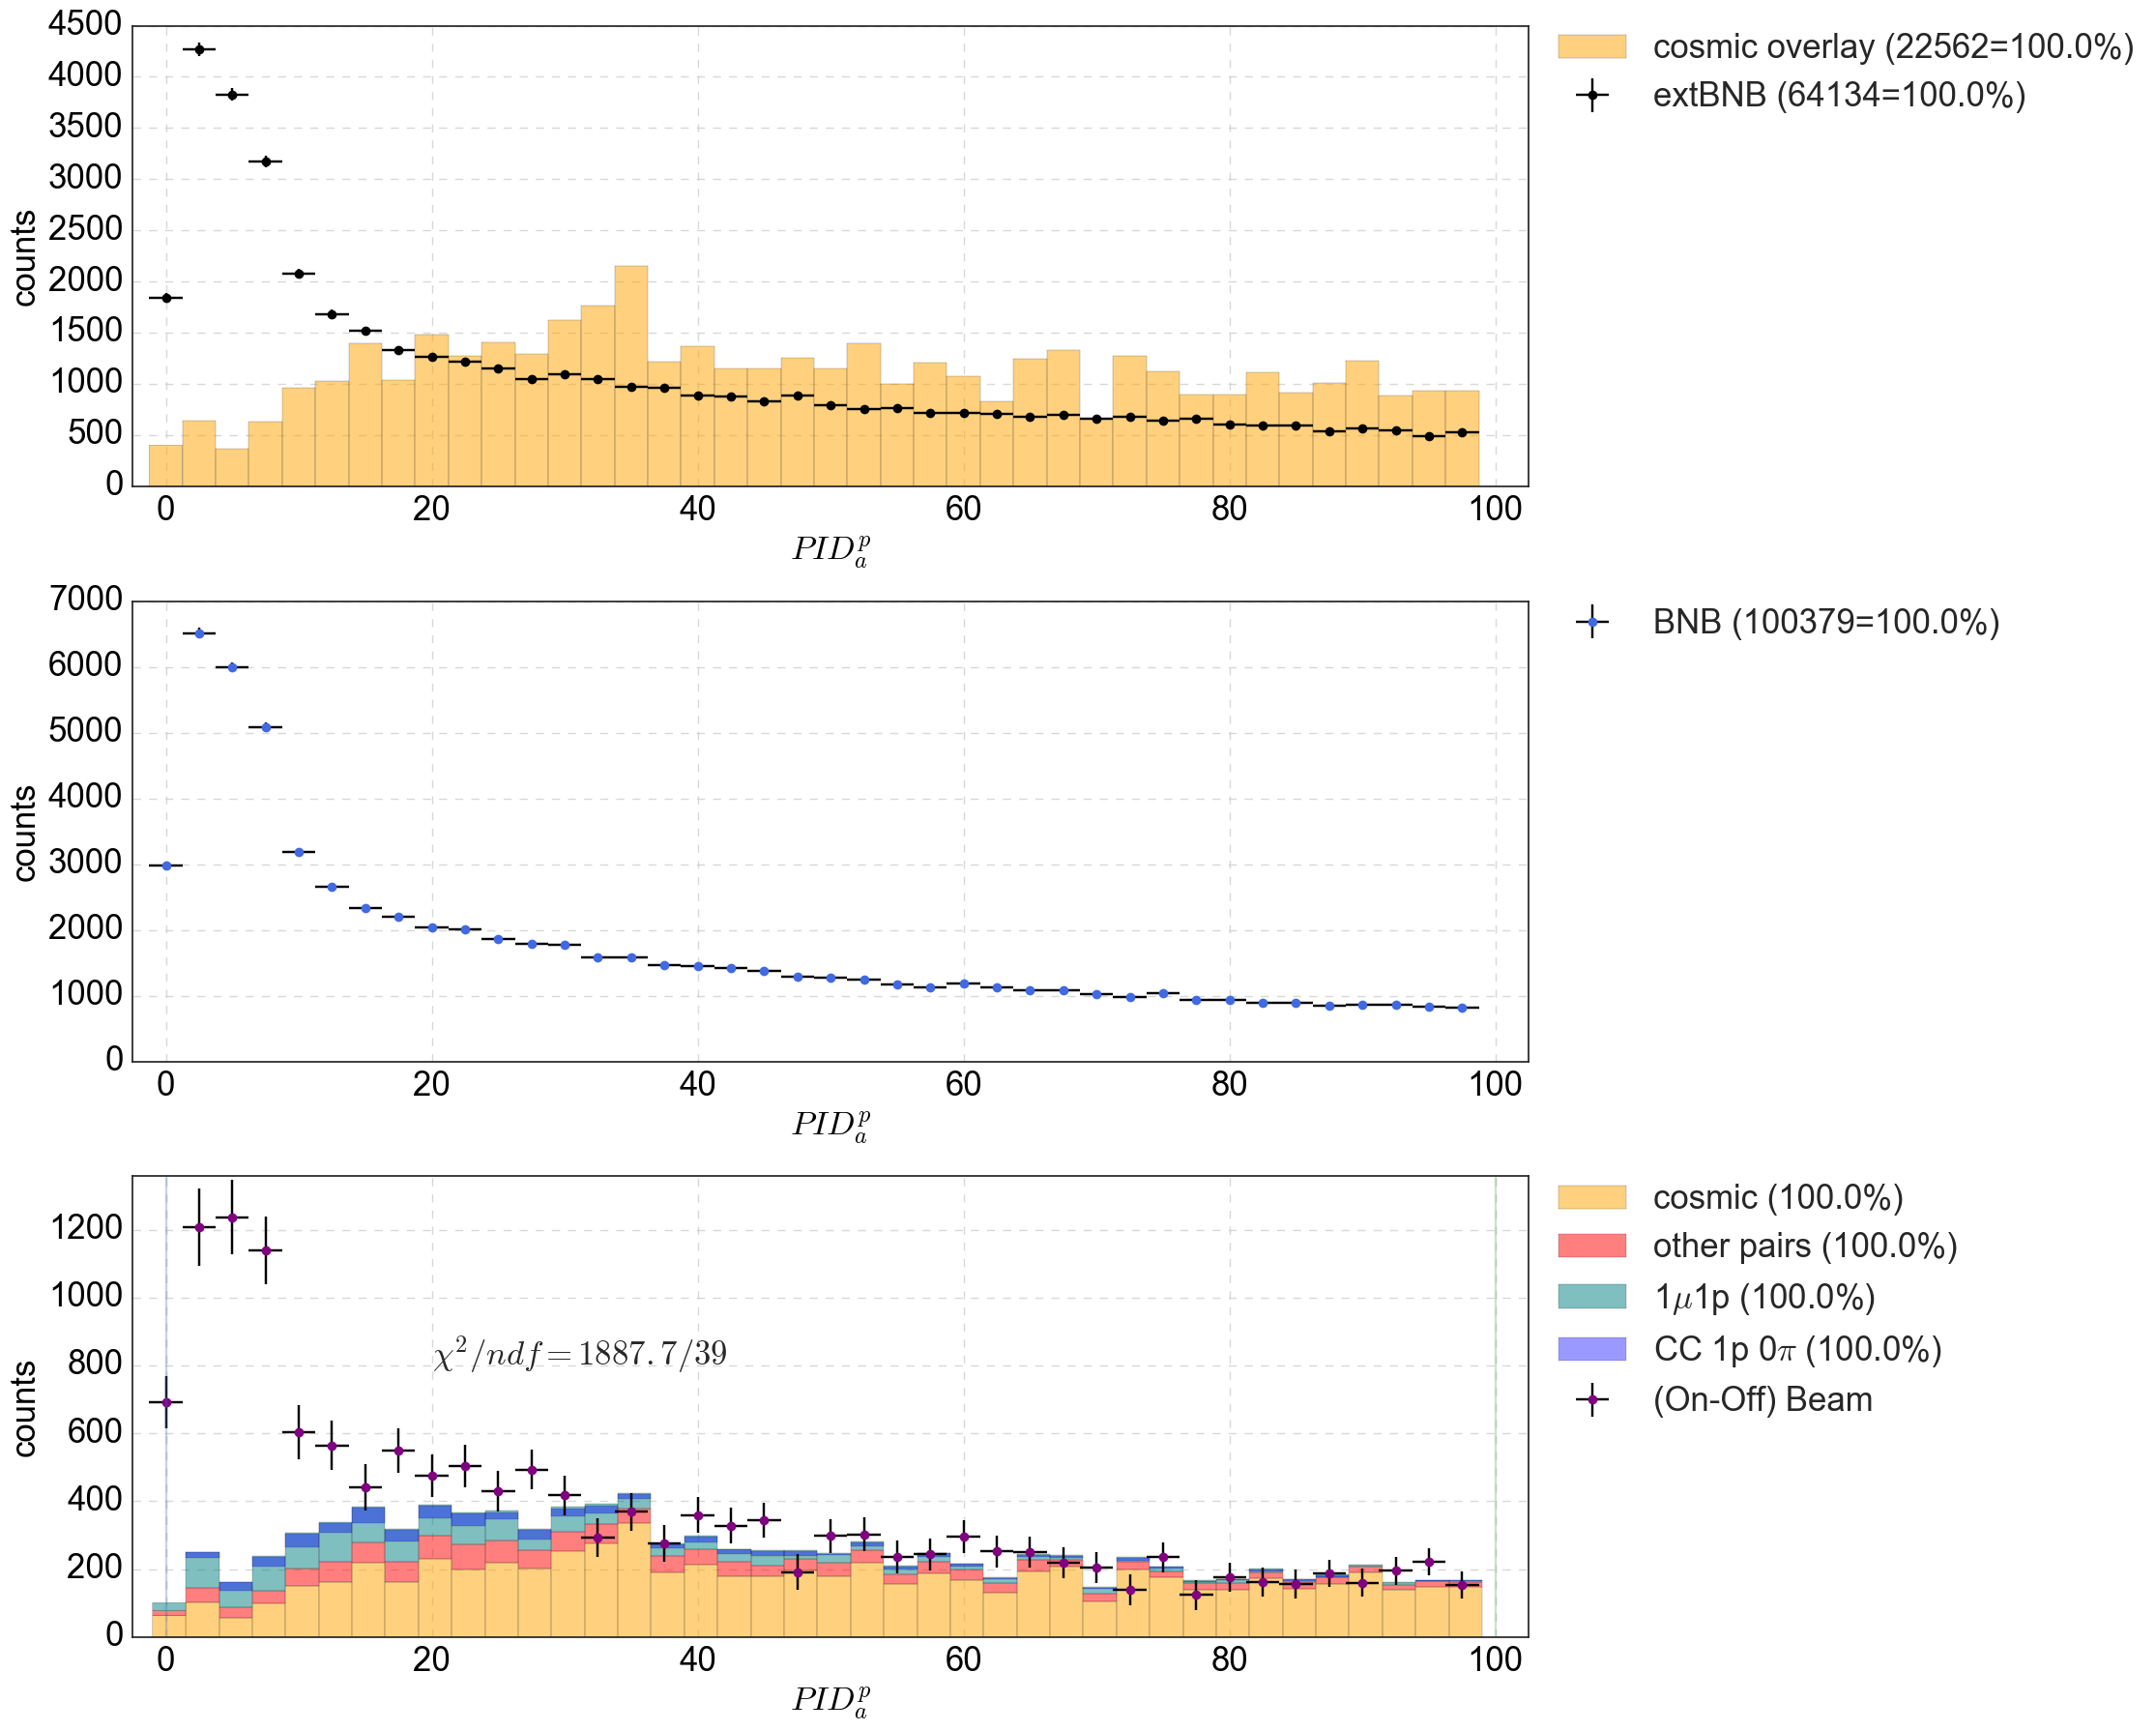

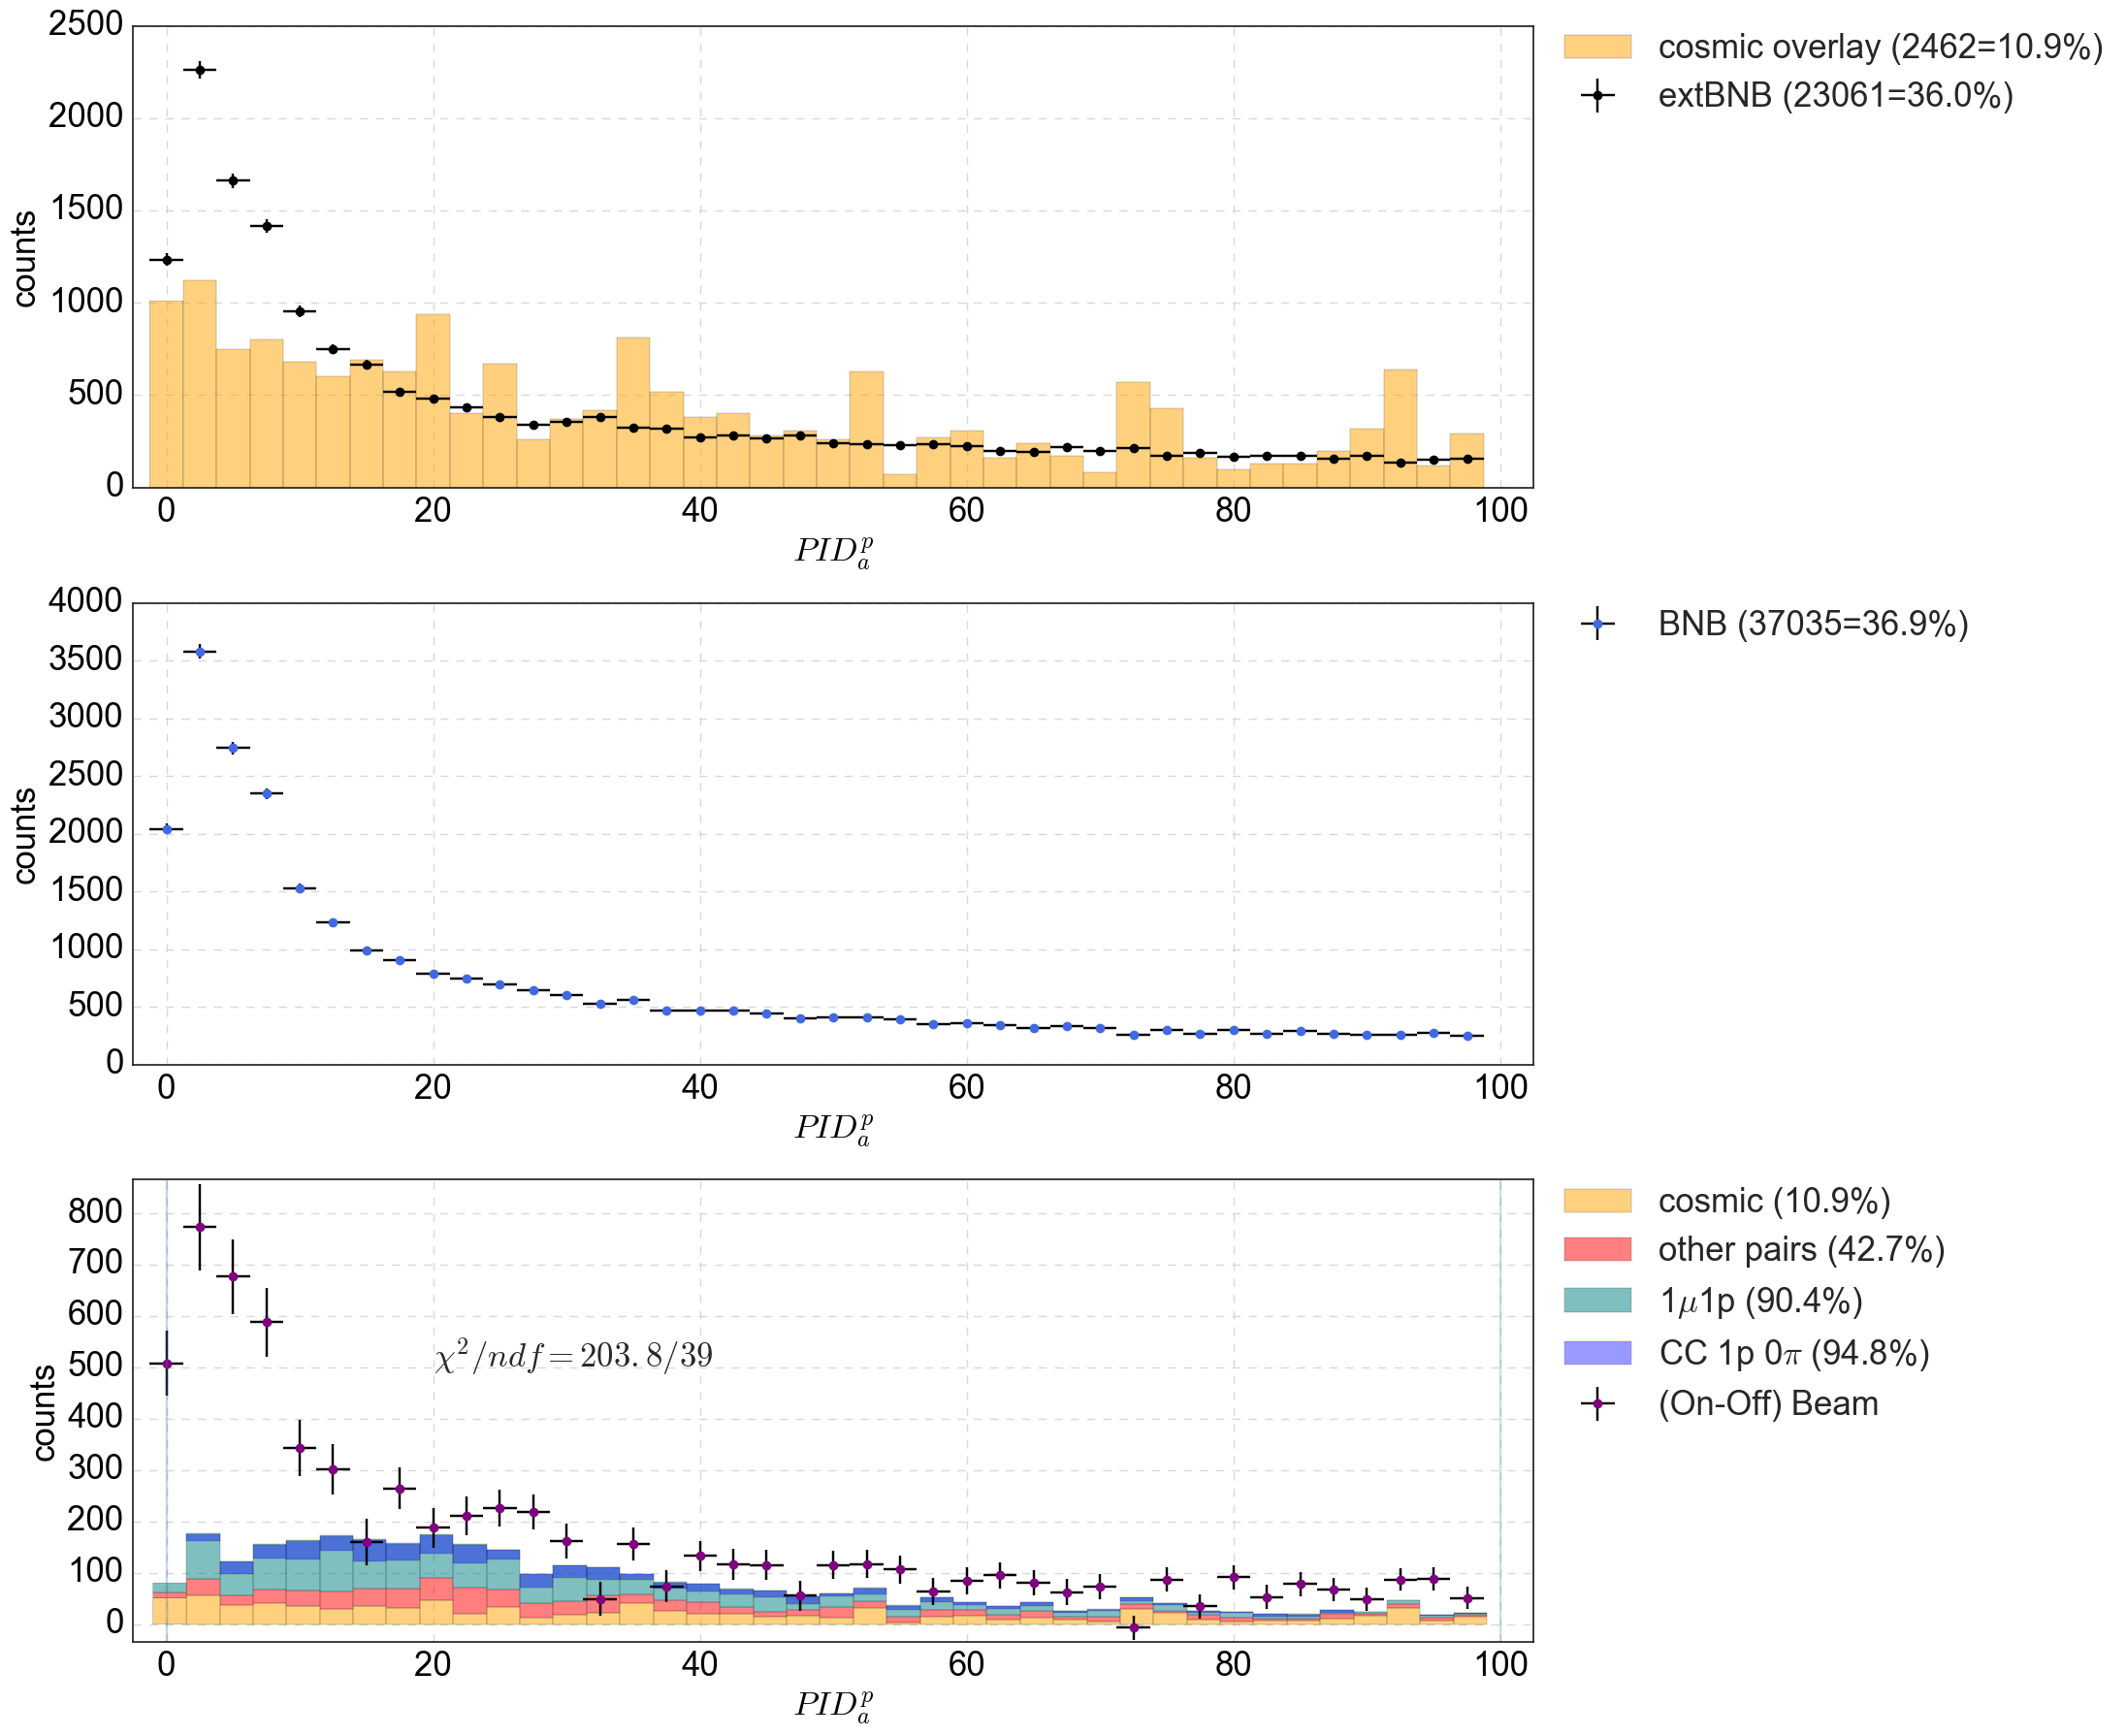

In [27]:
for cut_name,chi2_y in zip(['no cut','non-collinearity first']
                           ,[800,500]):
    draw_var(cut_name=cut_name,var='l_assigned_proton',x_label=r'$PID_a^{p}$',bins=np.linspace(0,100,41)    
         ,reduced_OnBeam=reduced_OnBeam,reduced_OffBeam=reduced_OffBeam,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
         ,do_cosmic_only=True
         ,do_bnb_only=True
         ,chi2_xrange=(0.,100),chi2_xy=(20,chi2_y)
         ,debug=0)

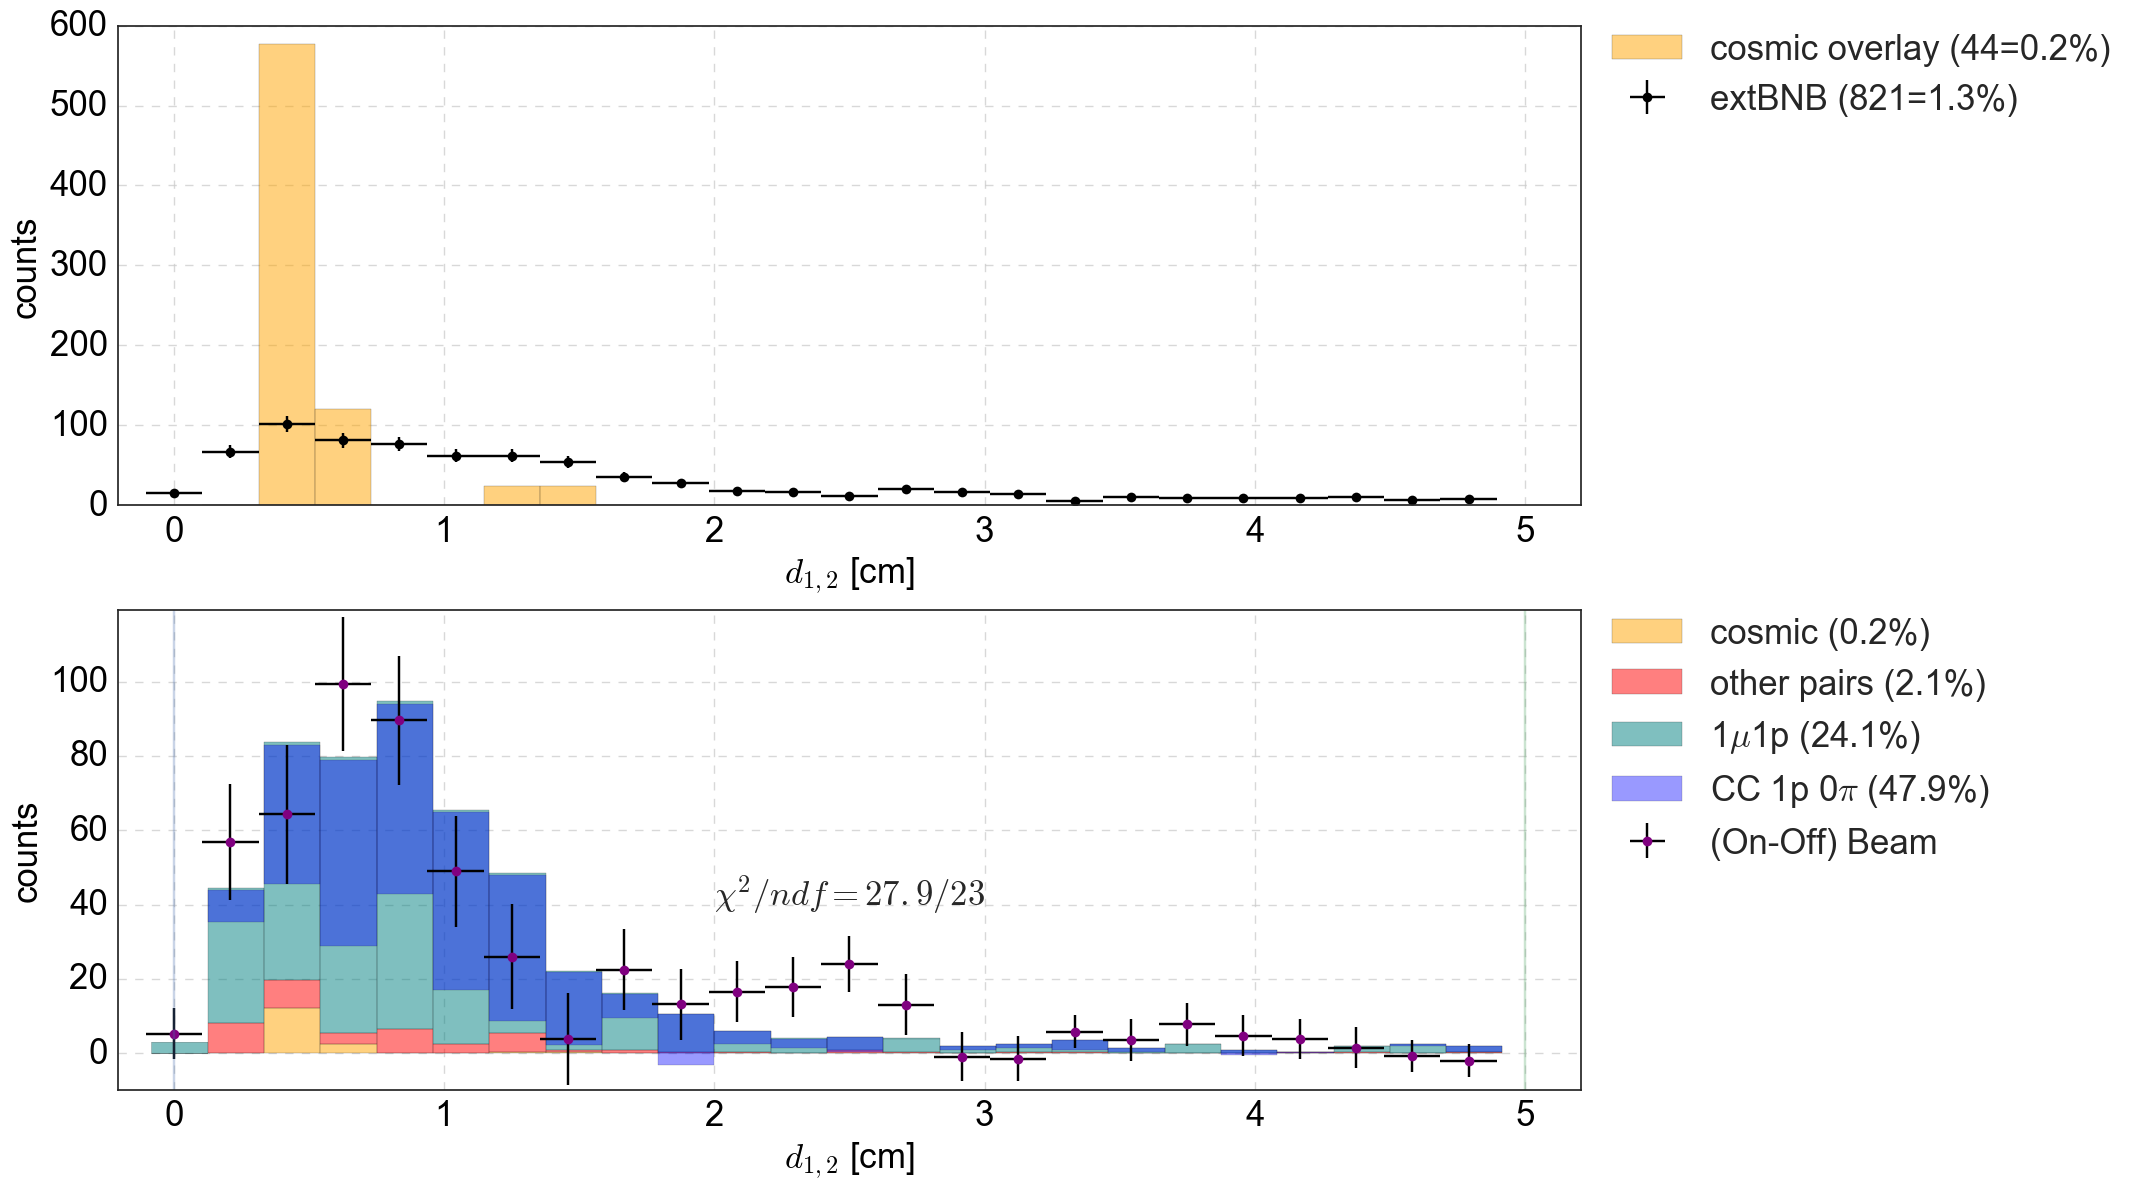

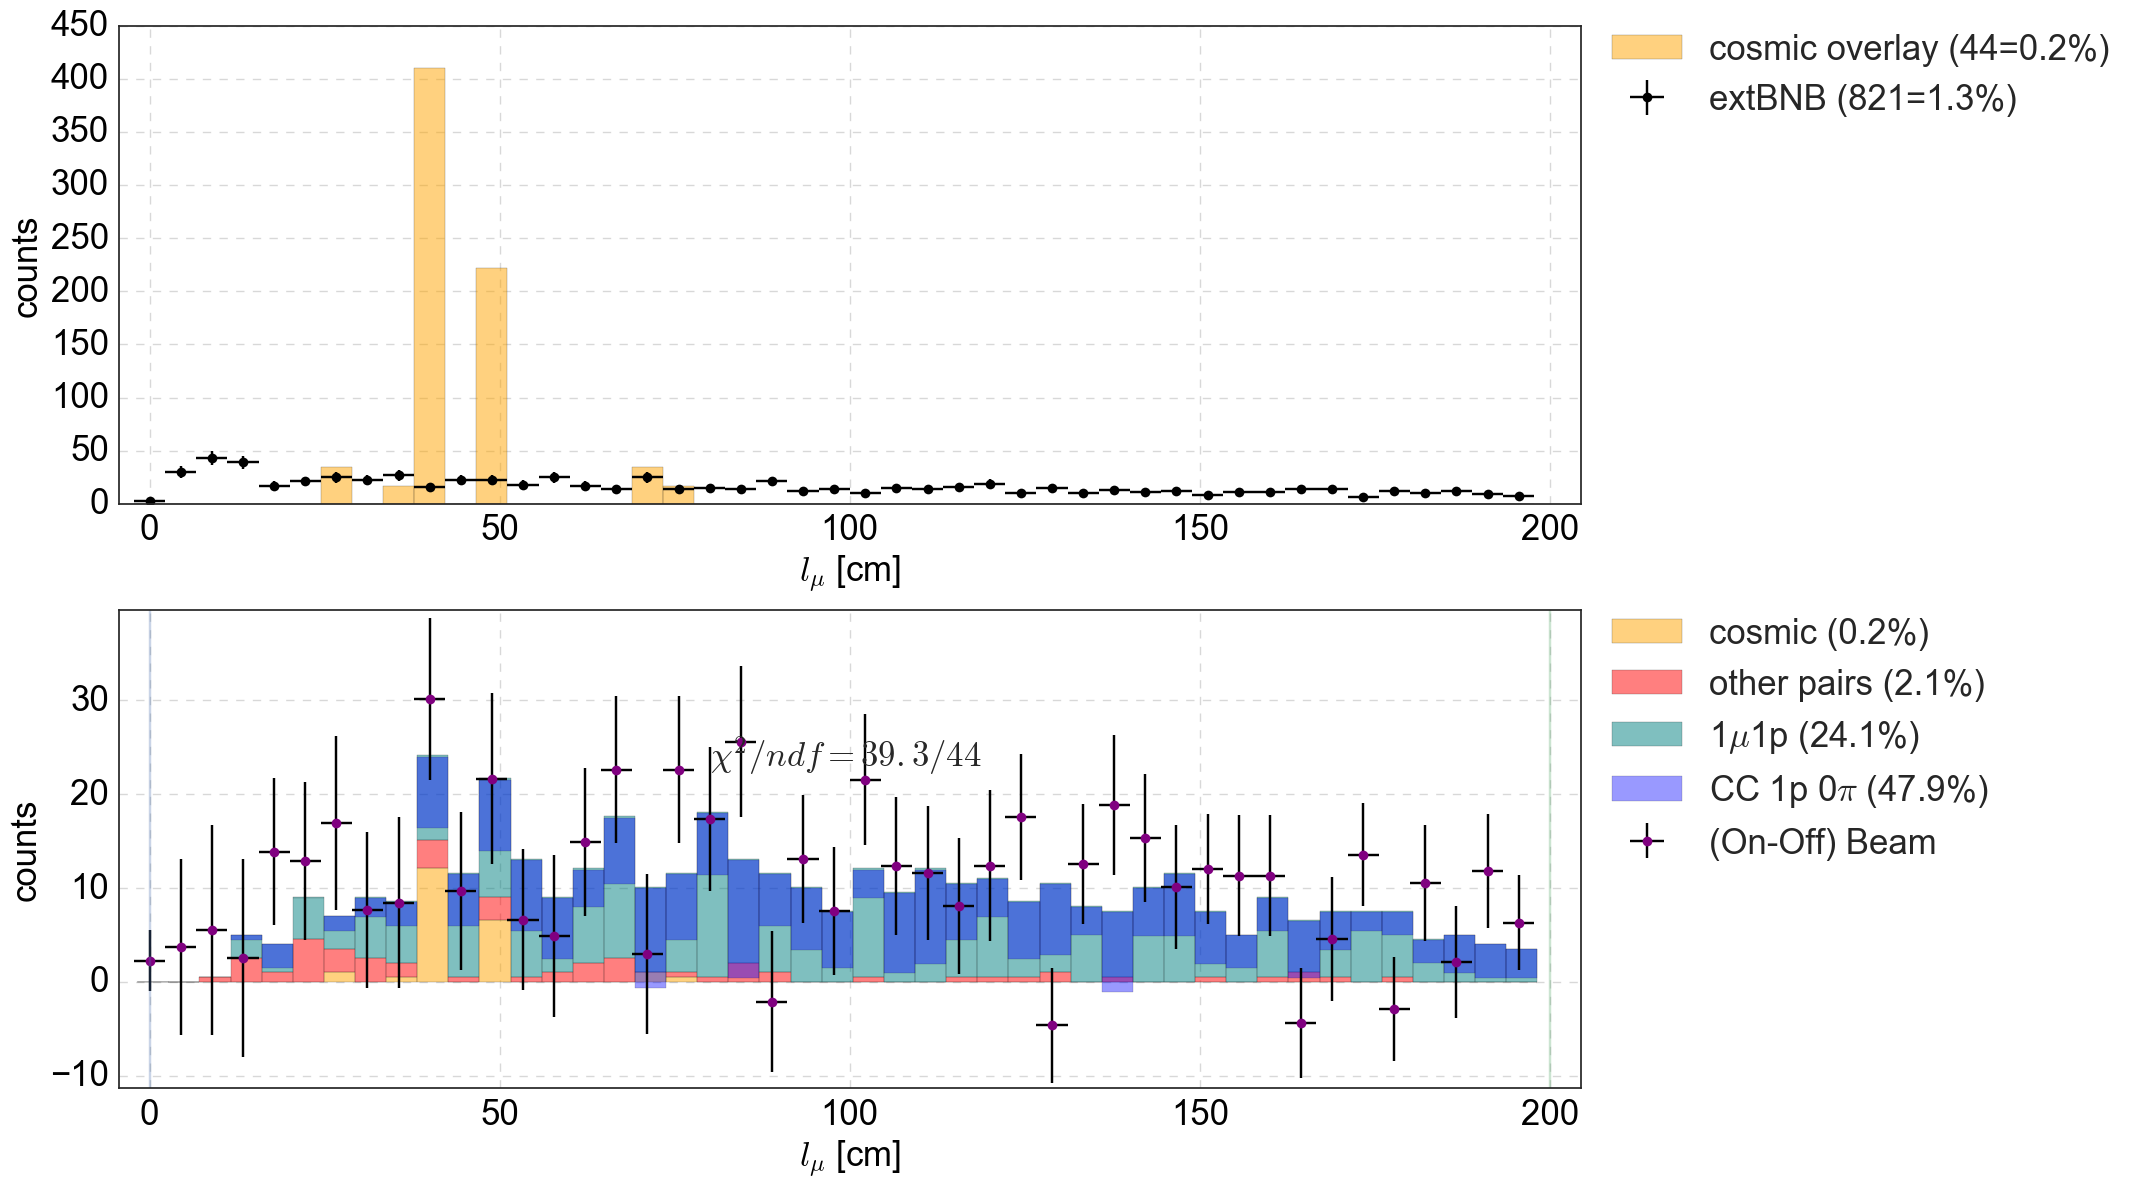

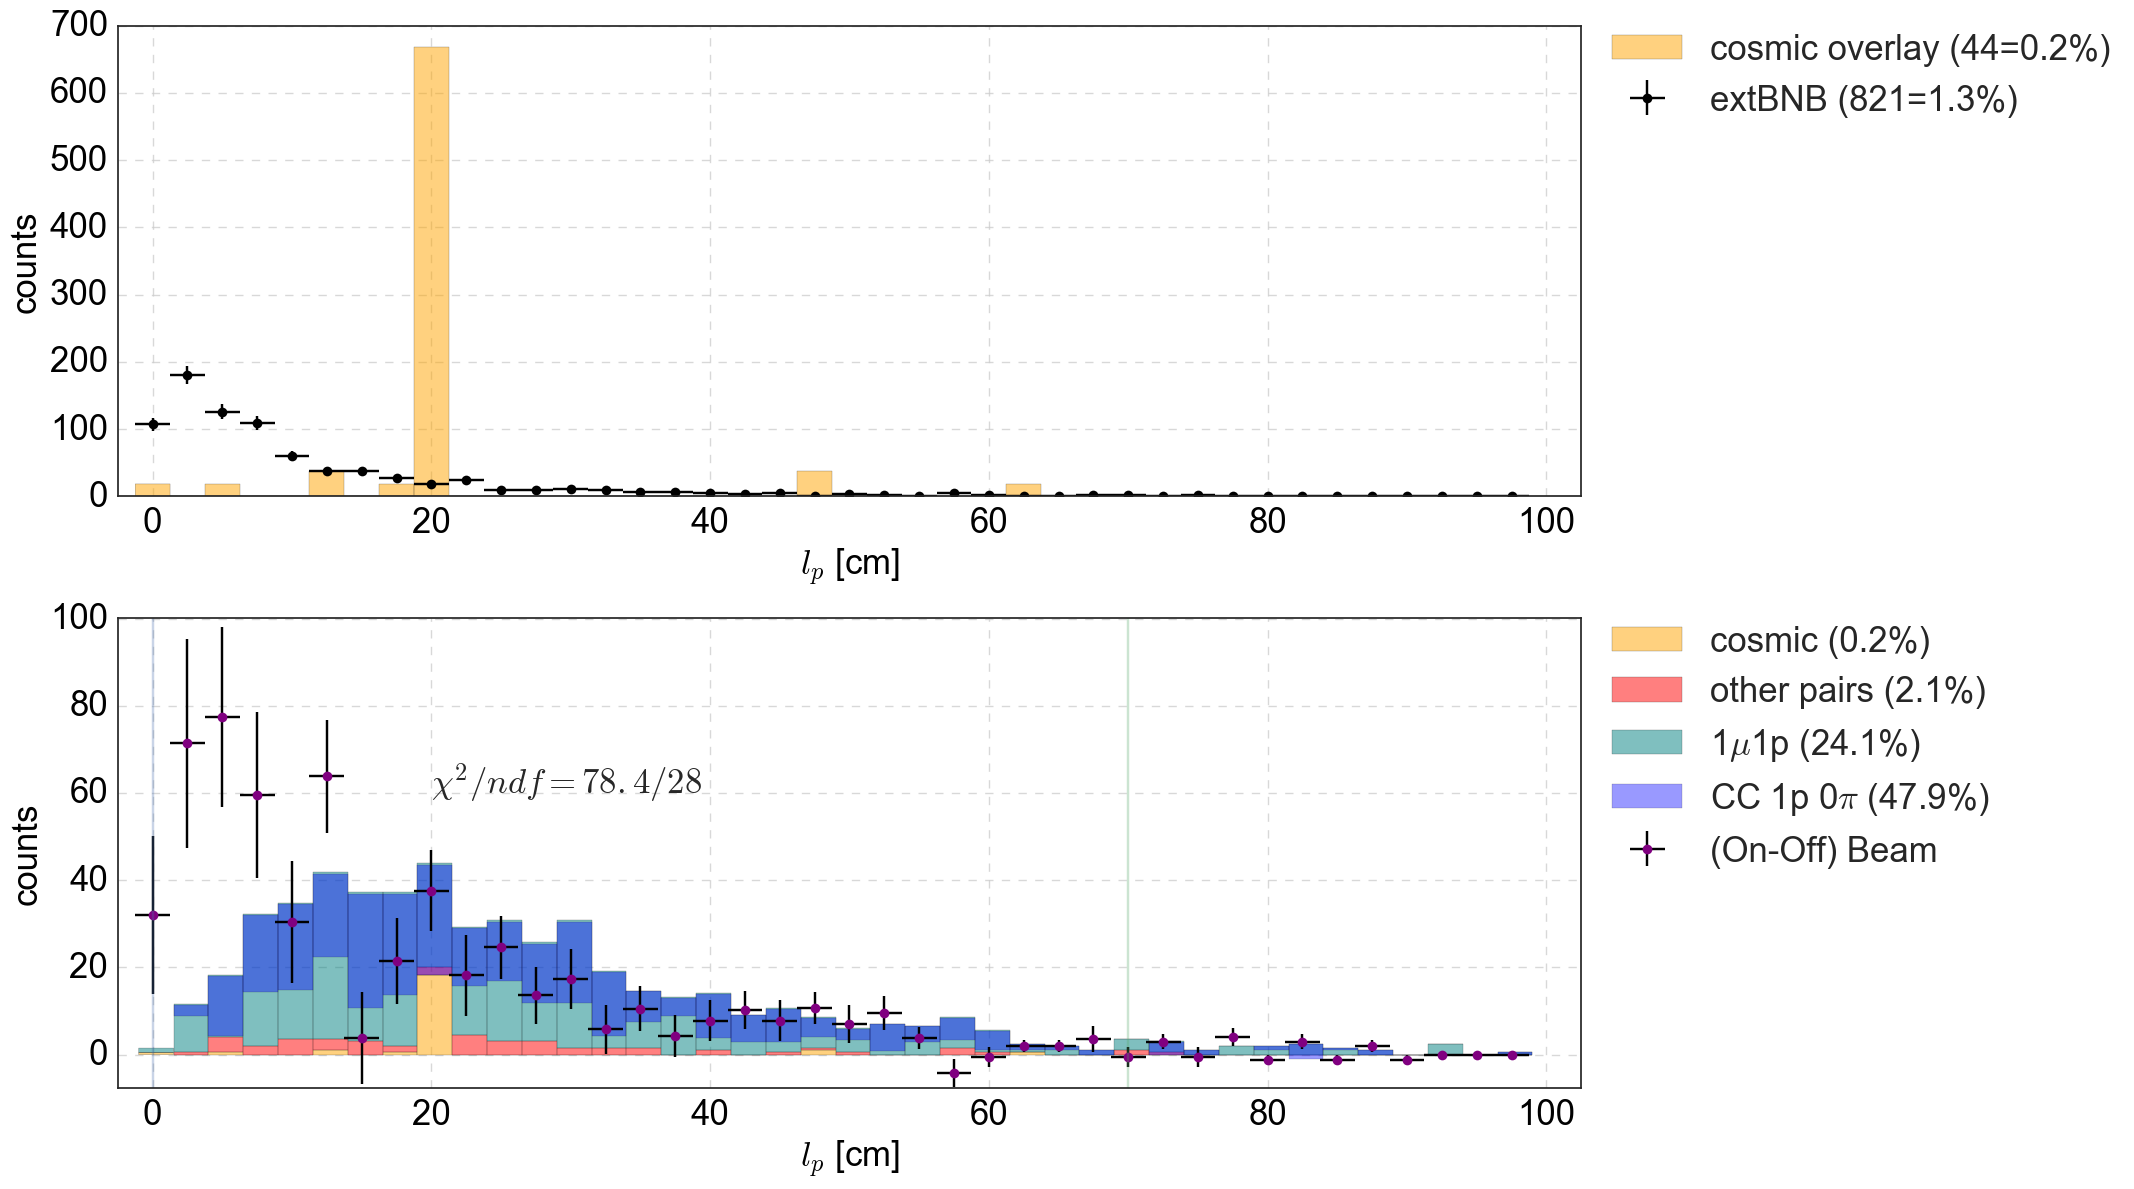

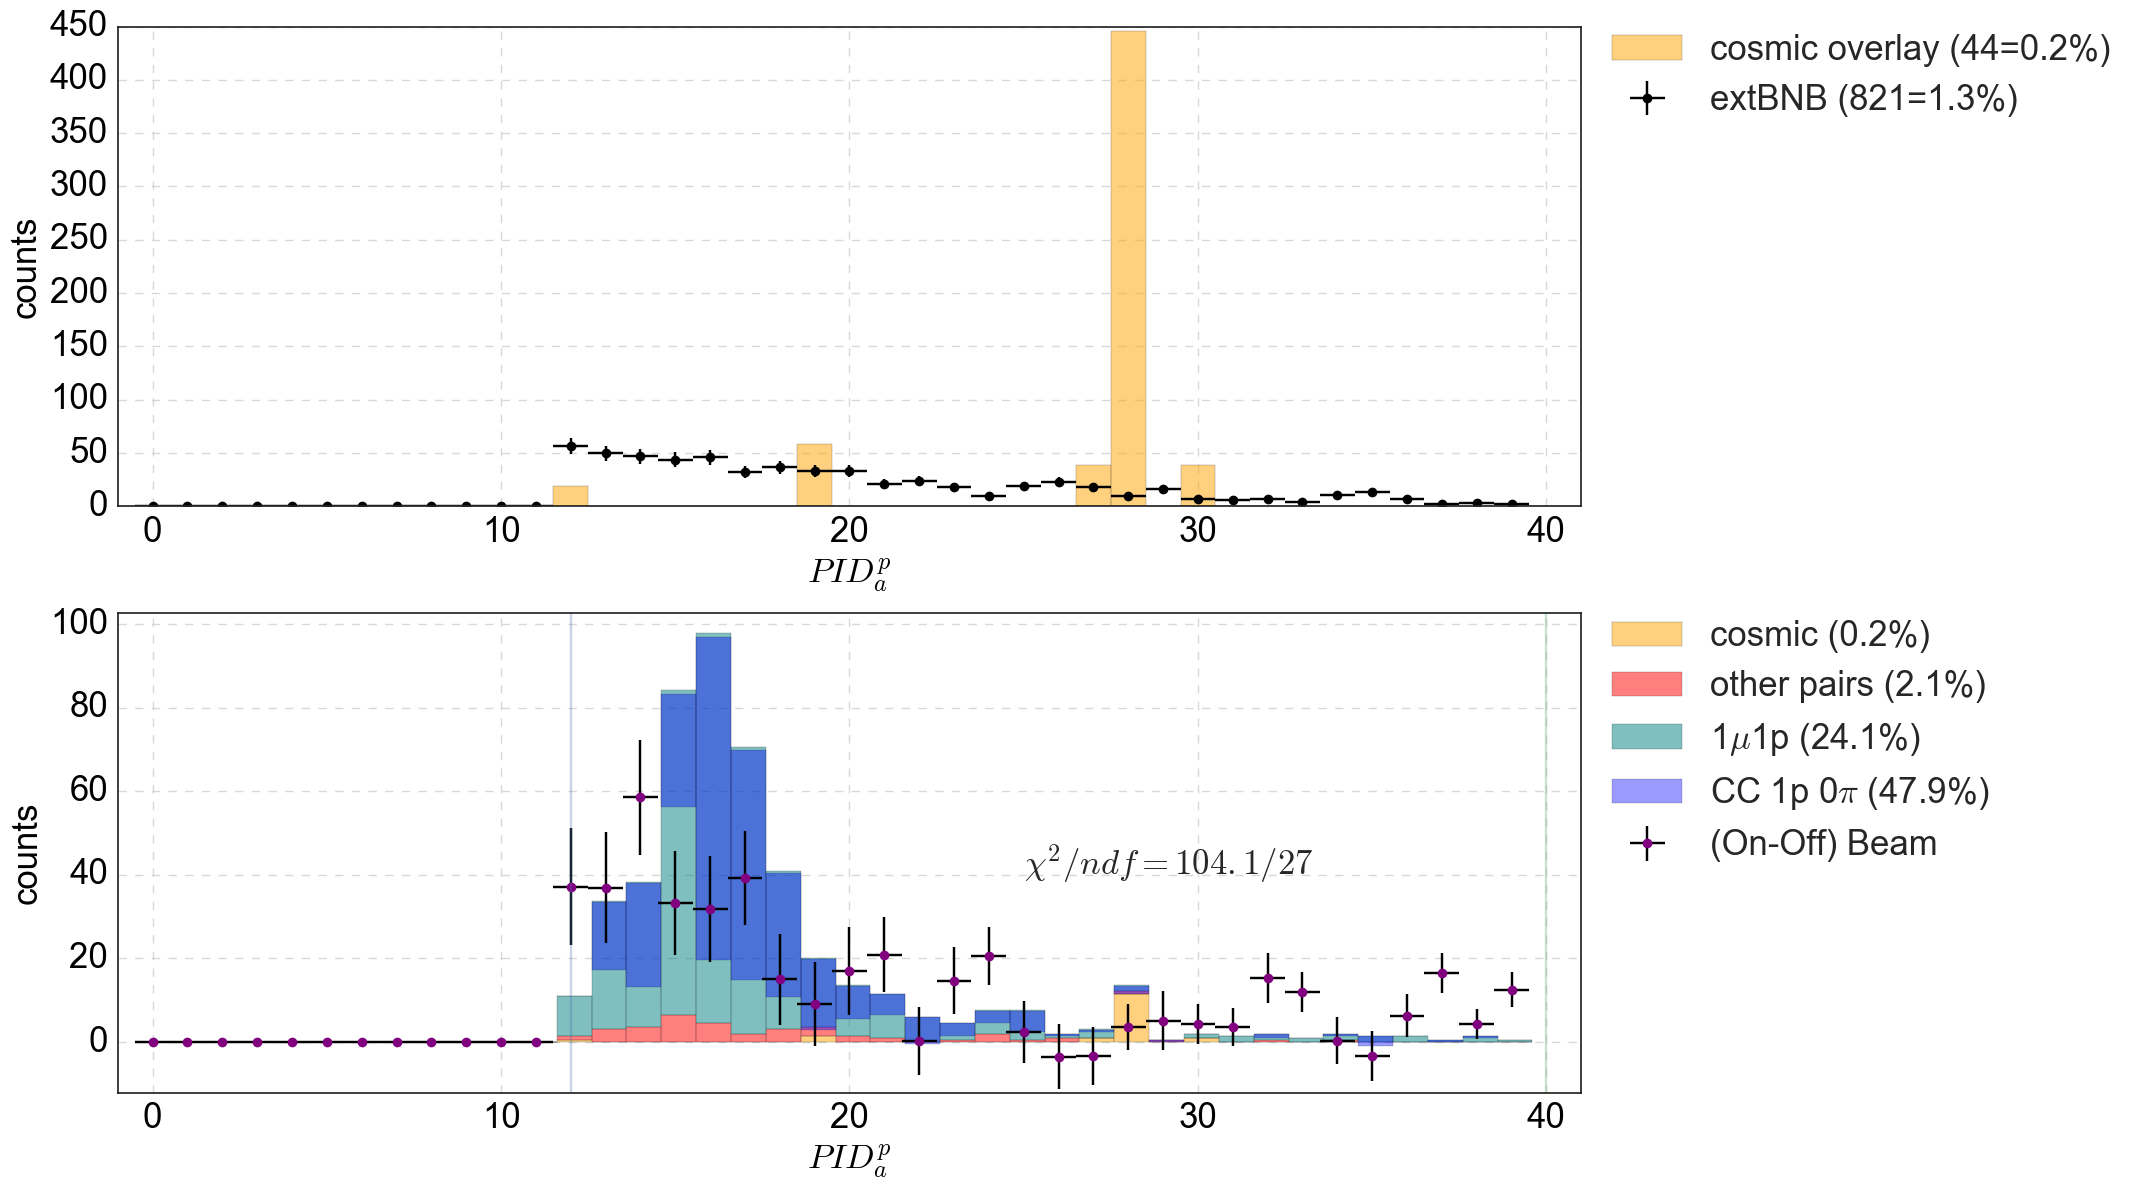

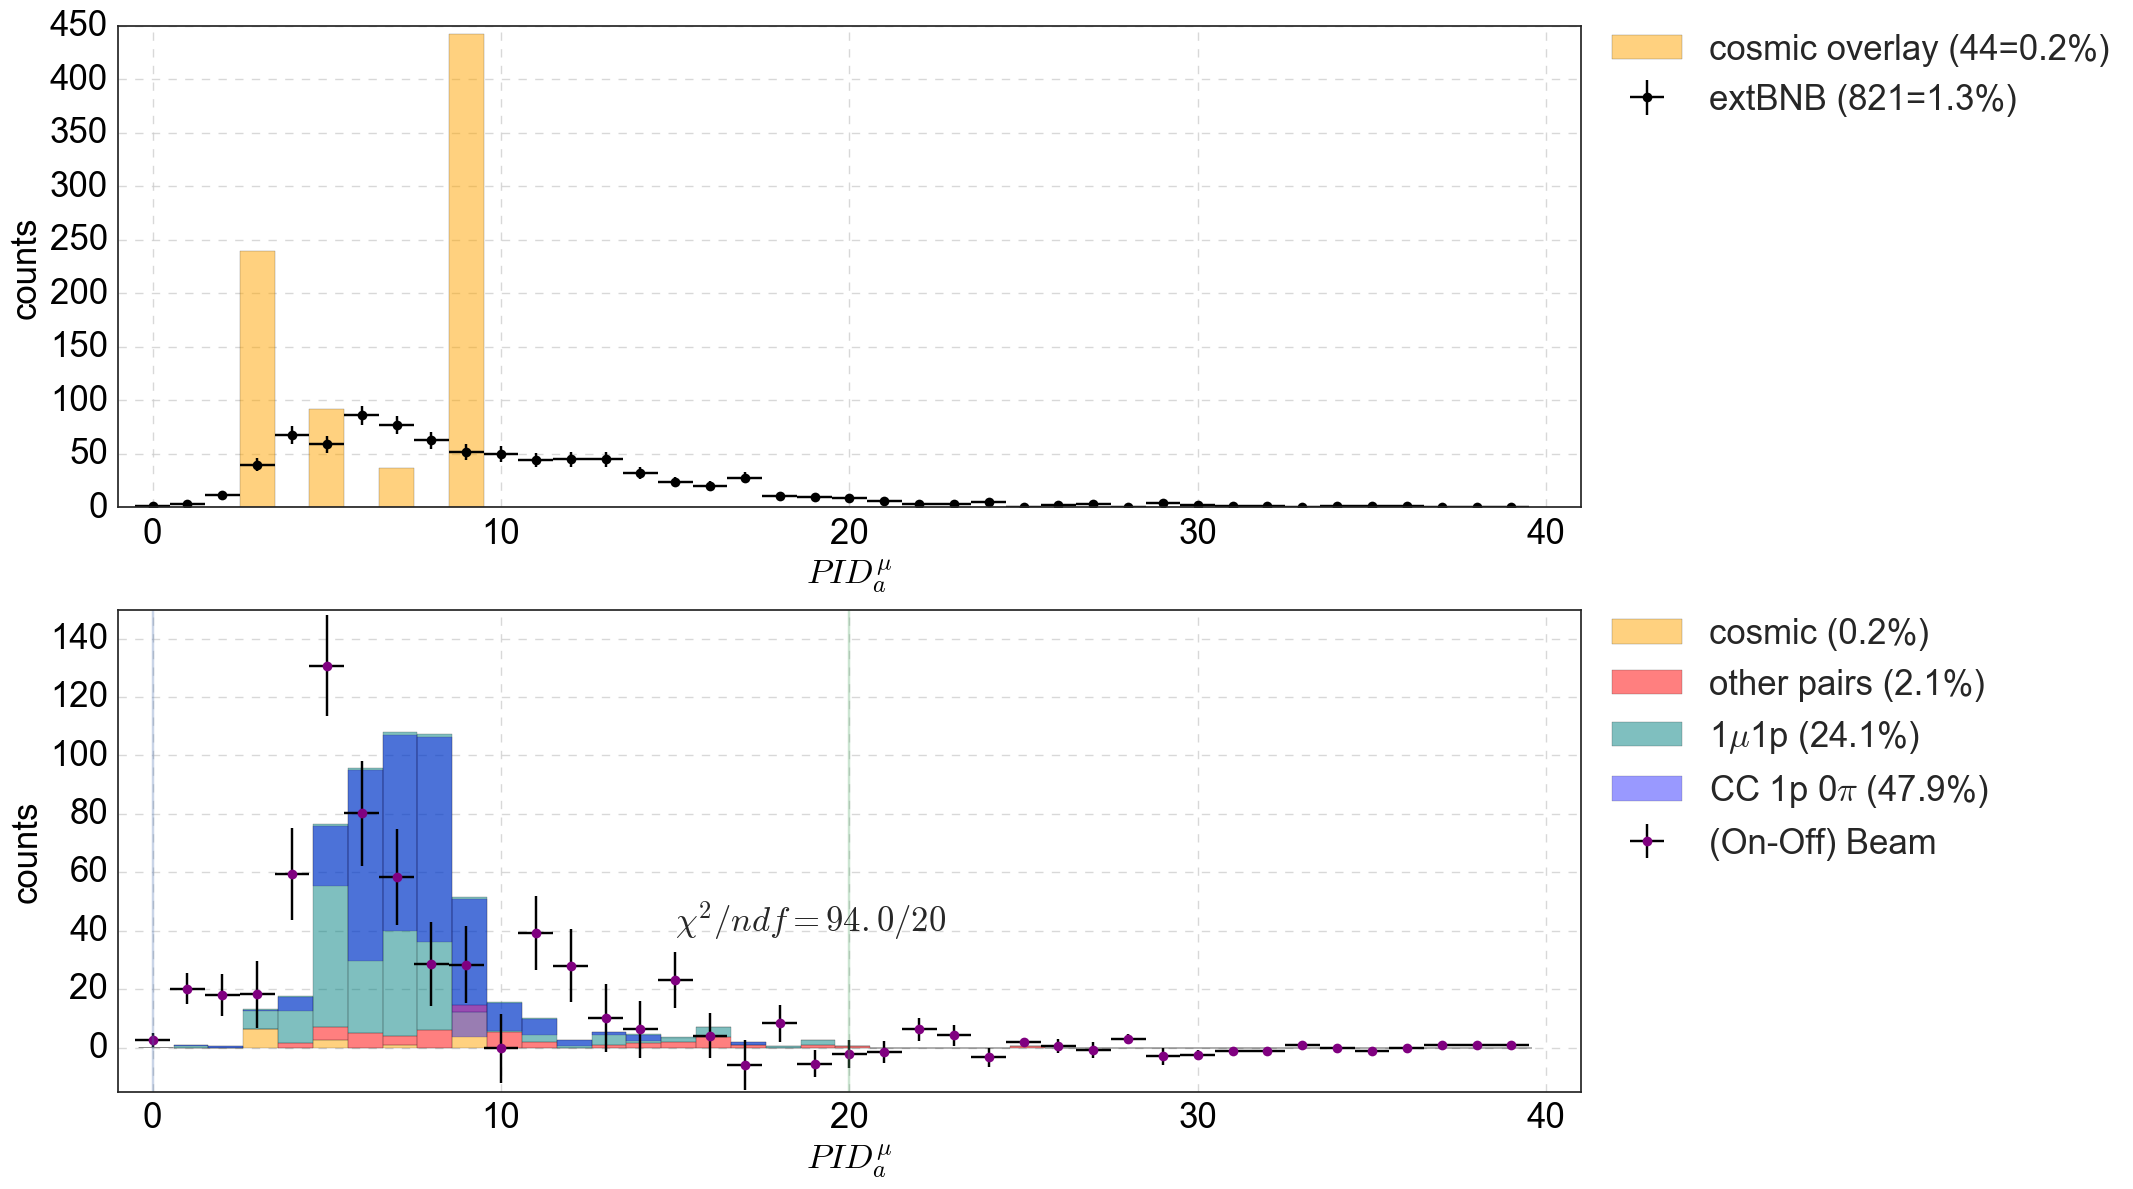

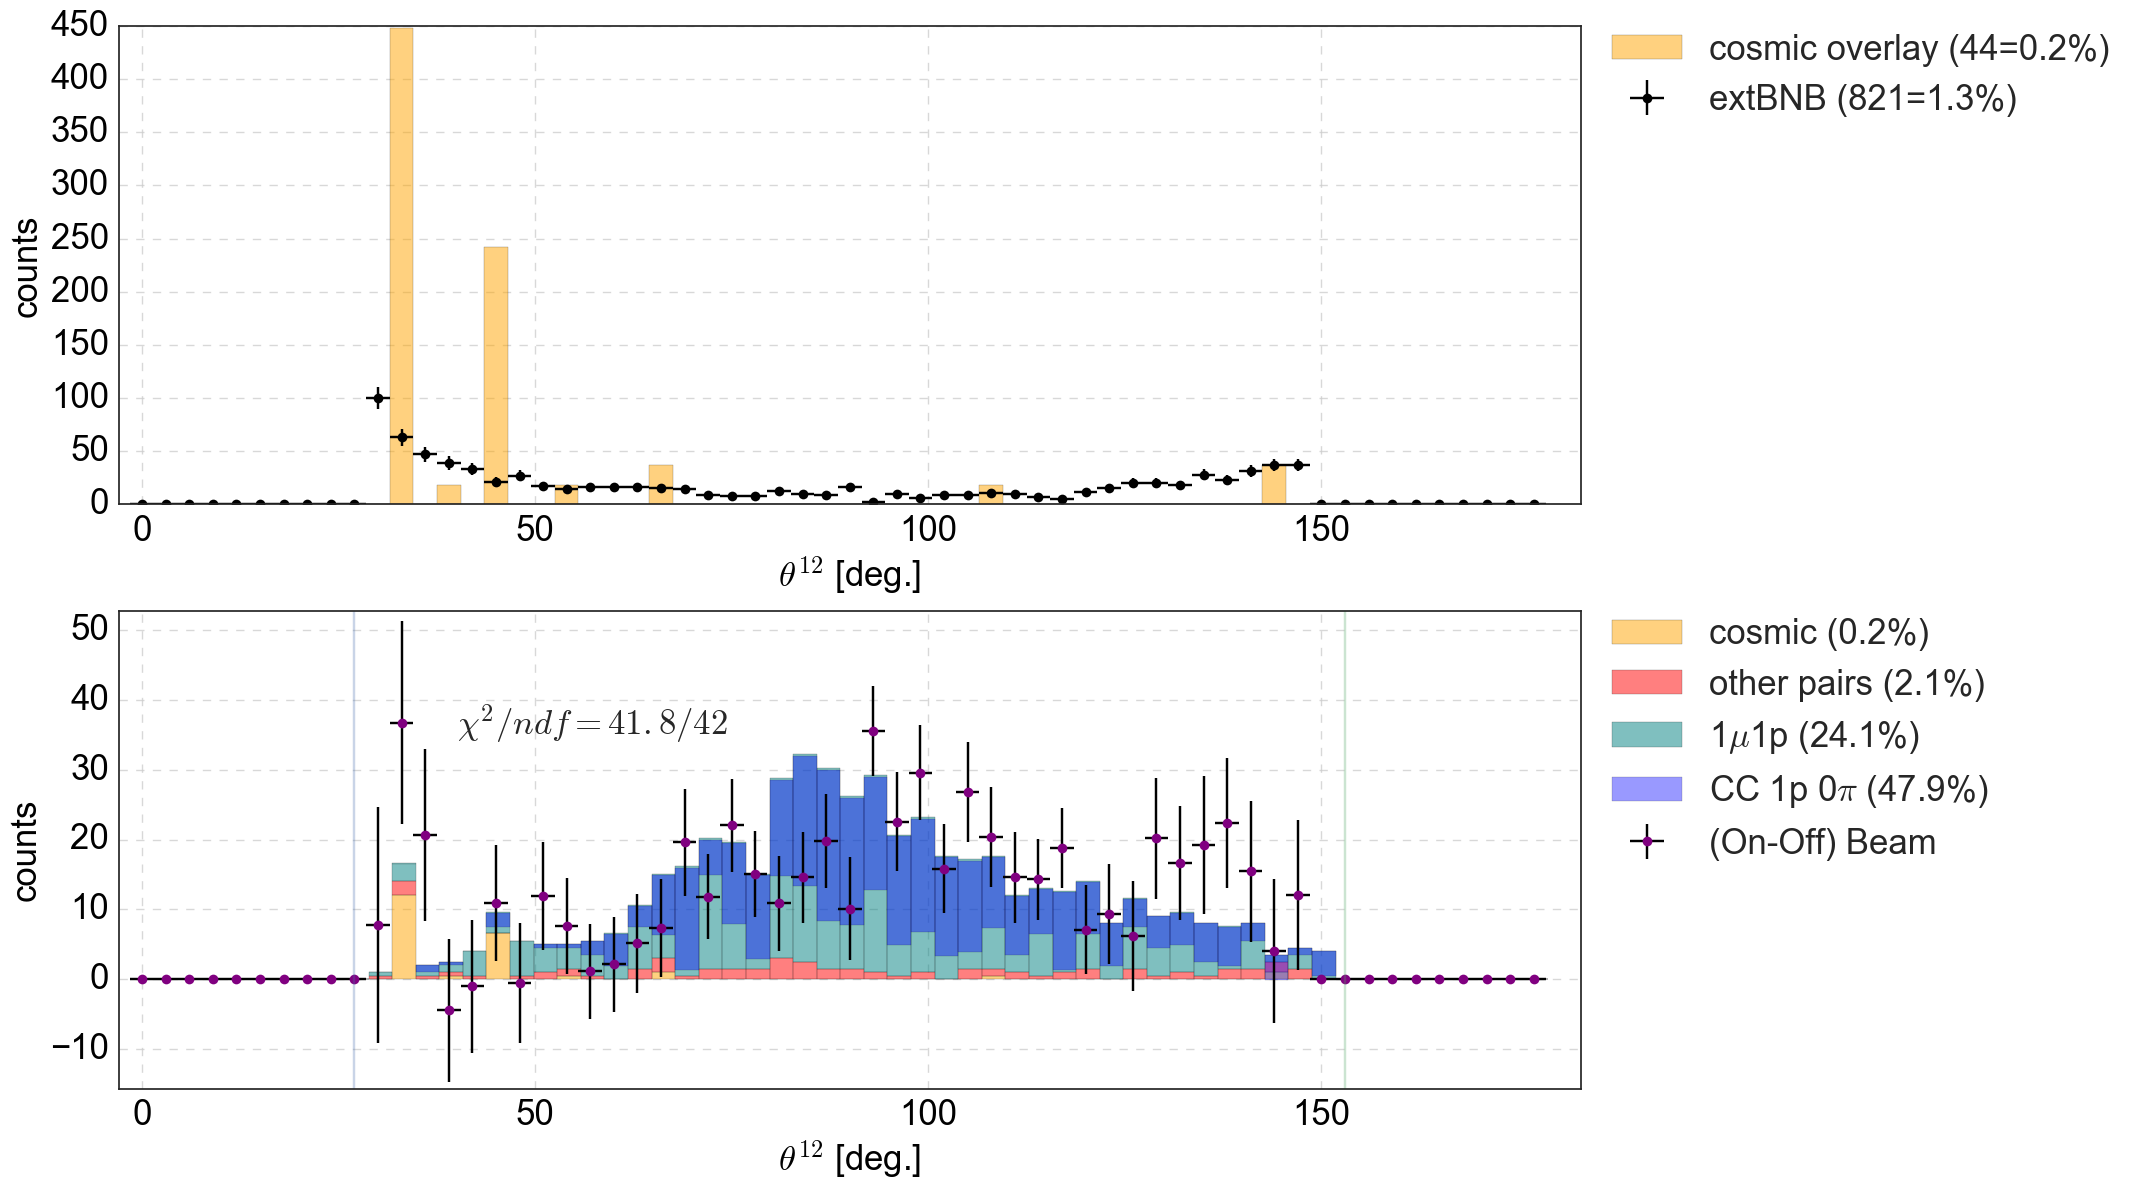

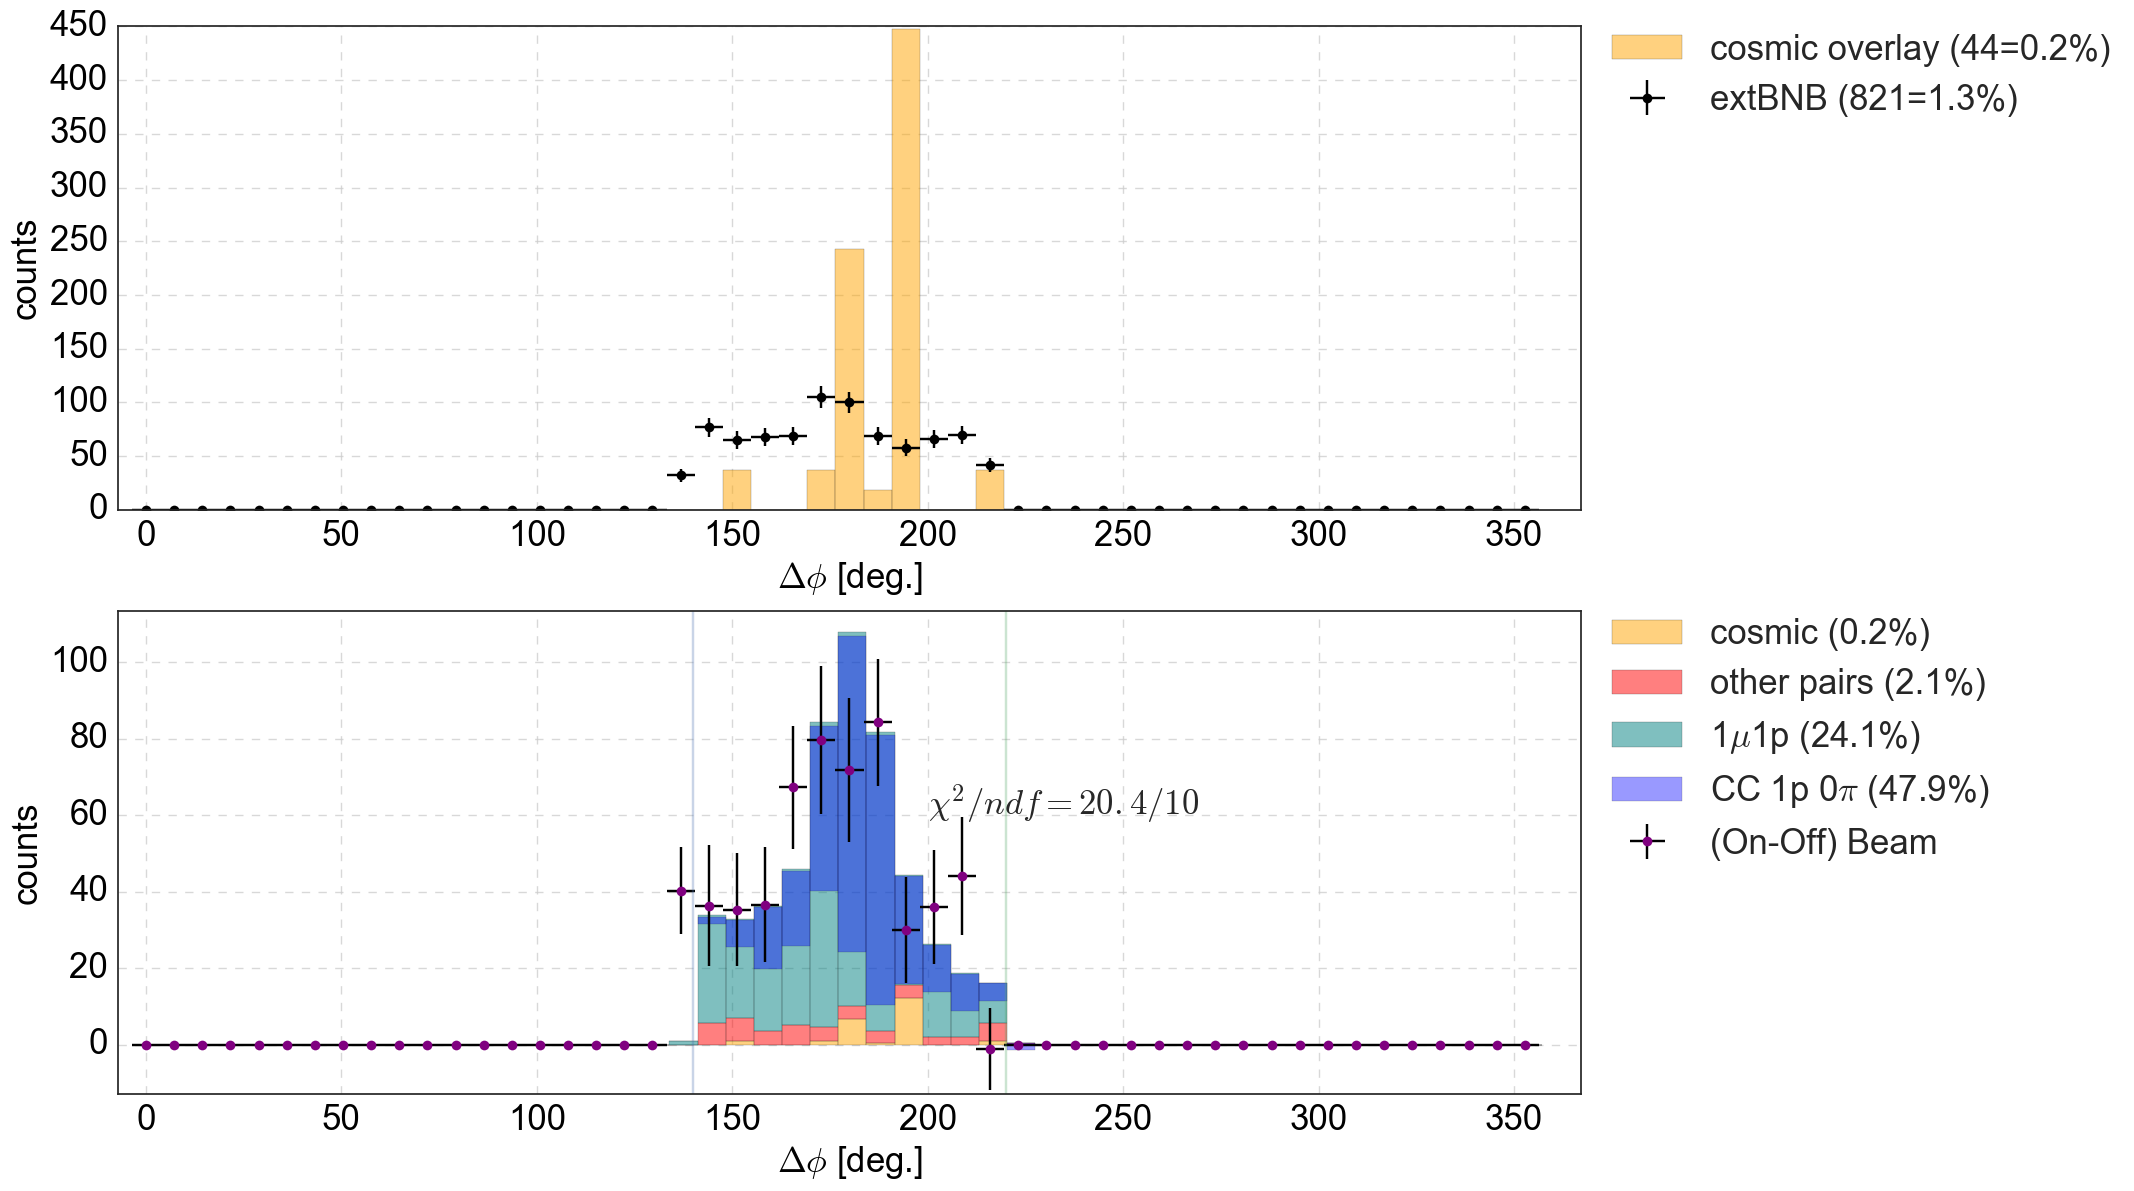

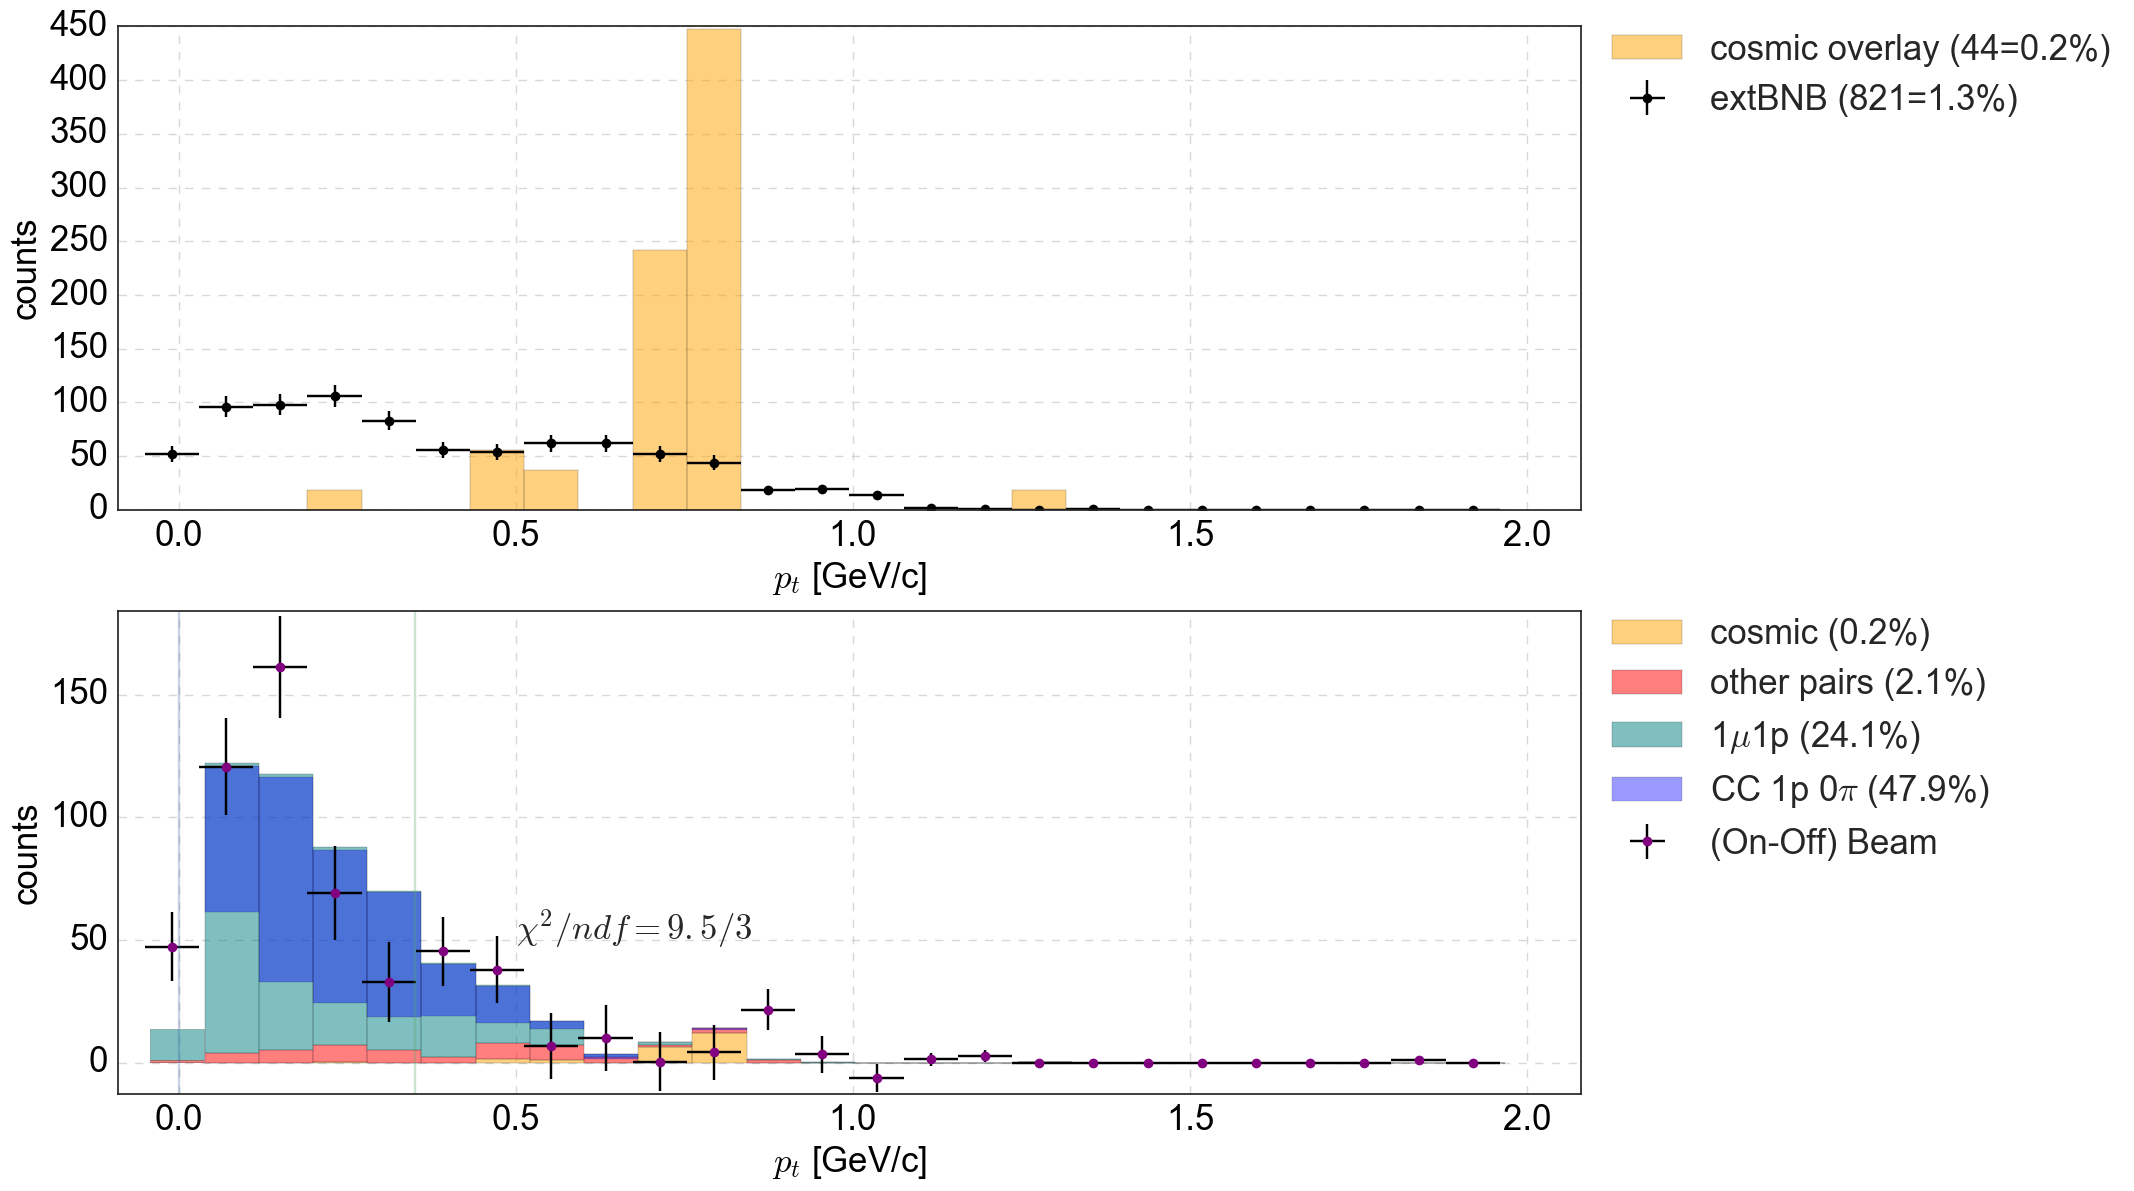

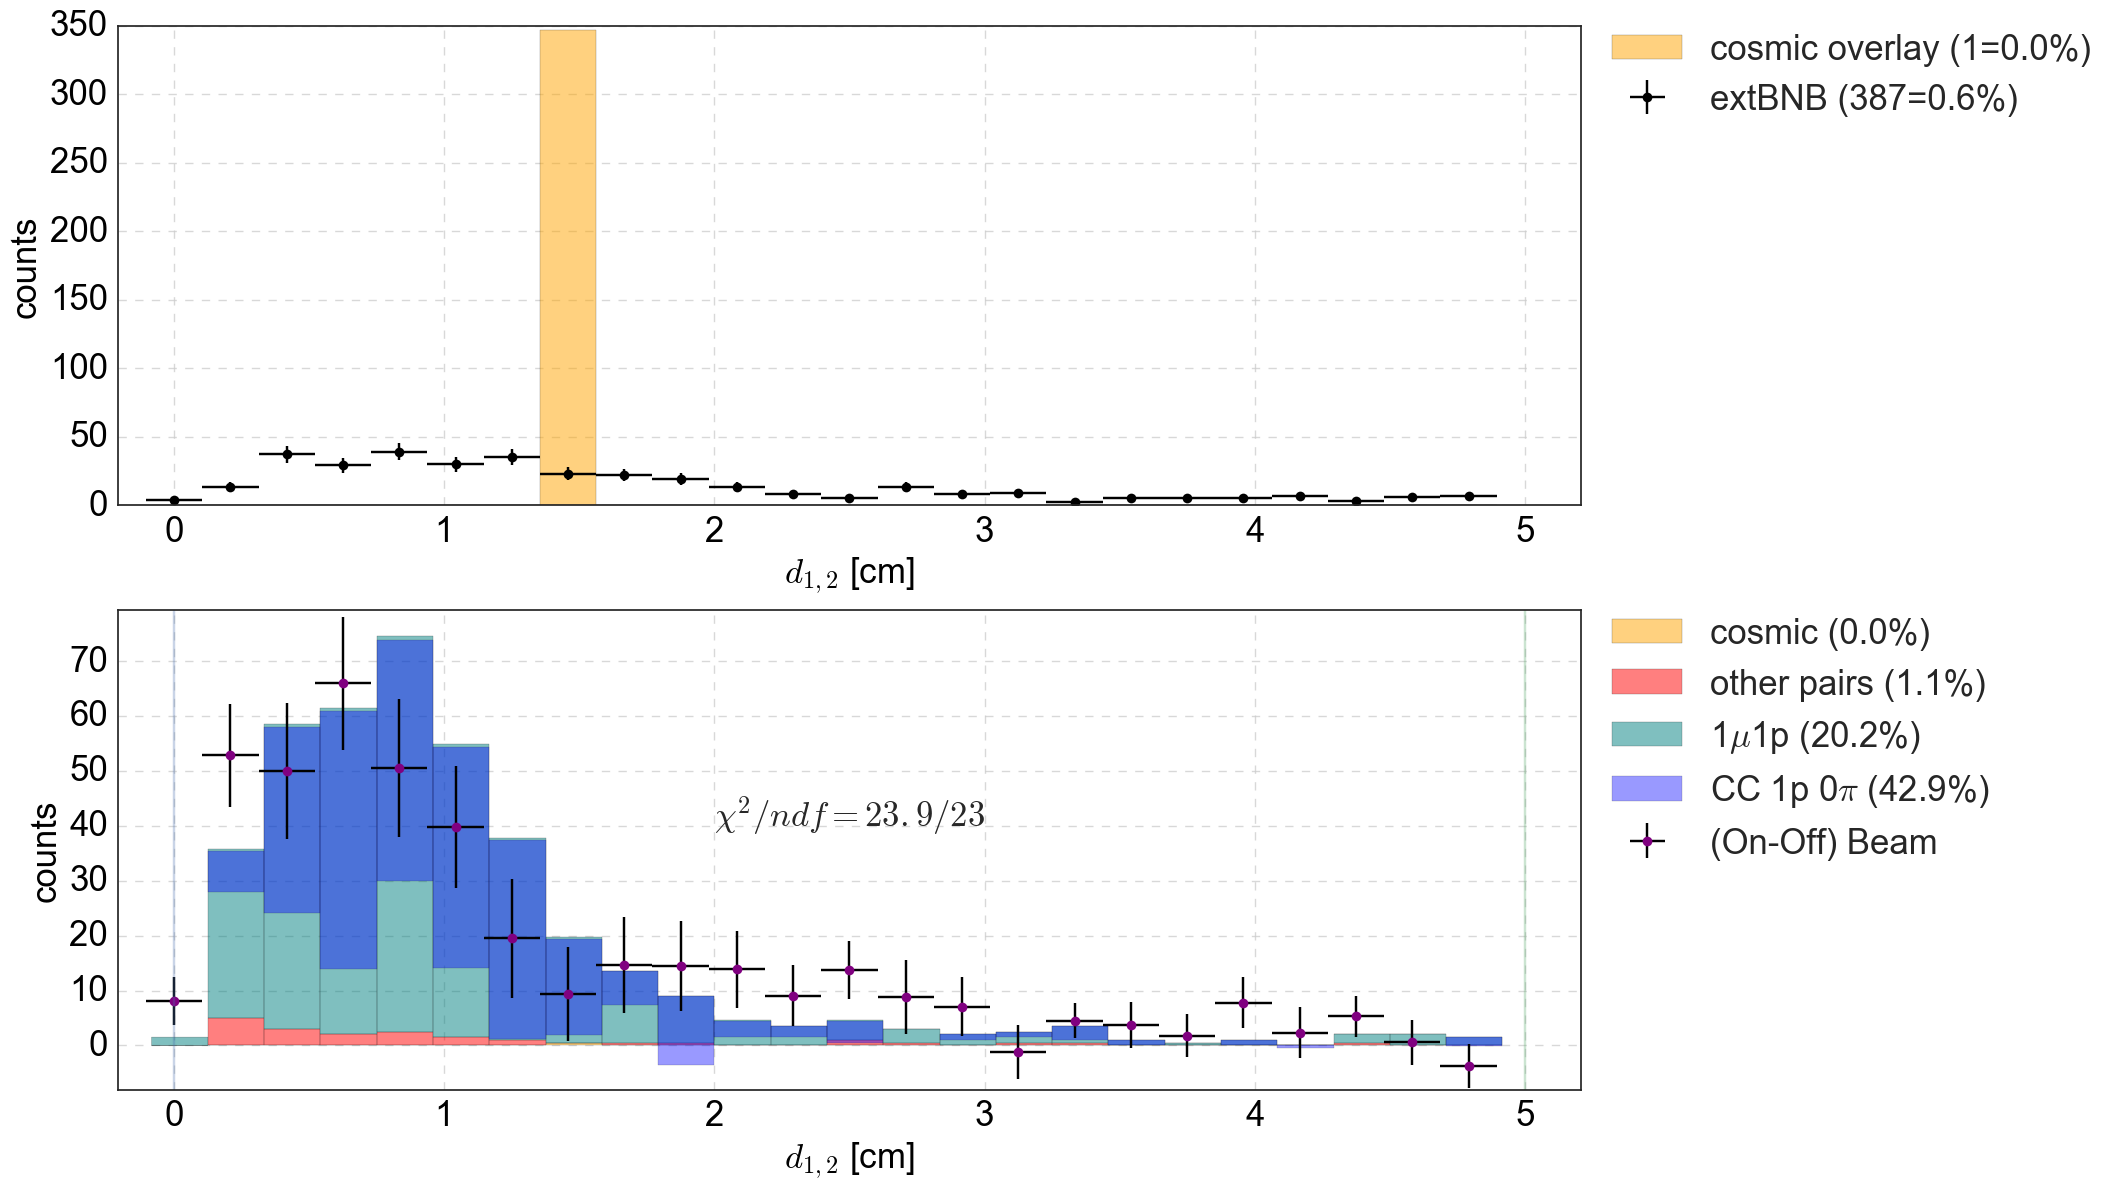

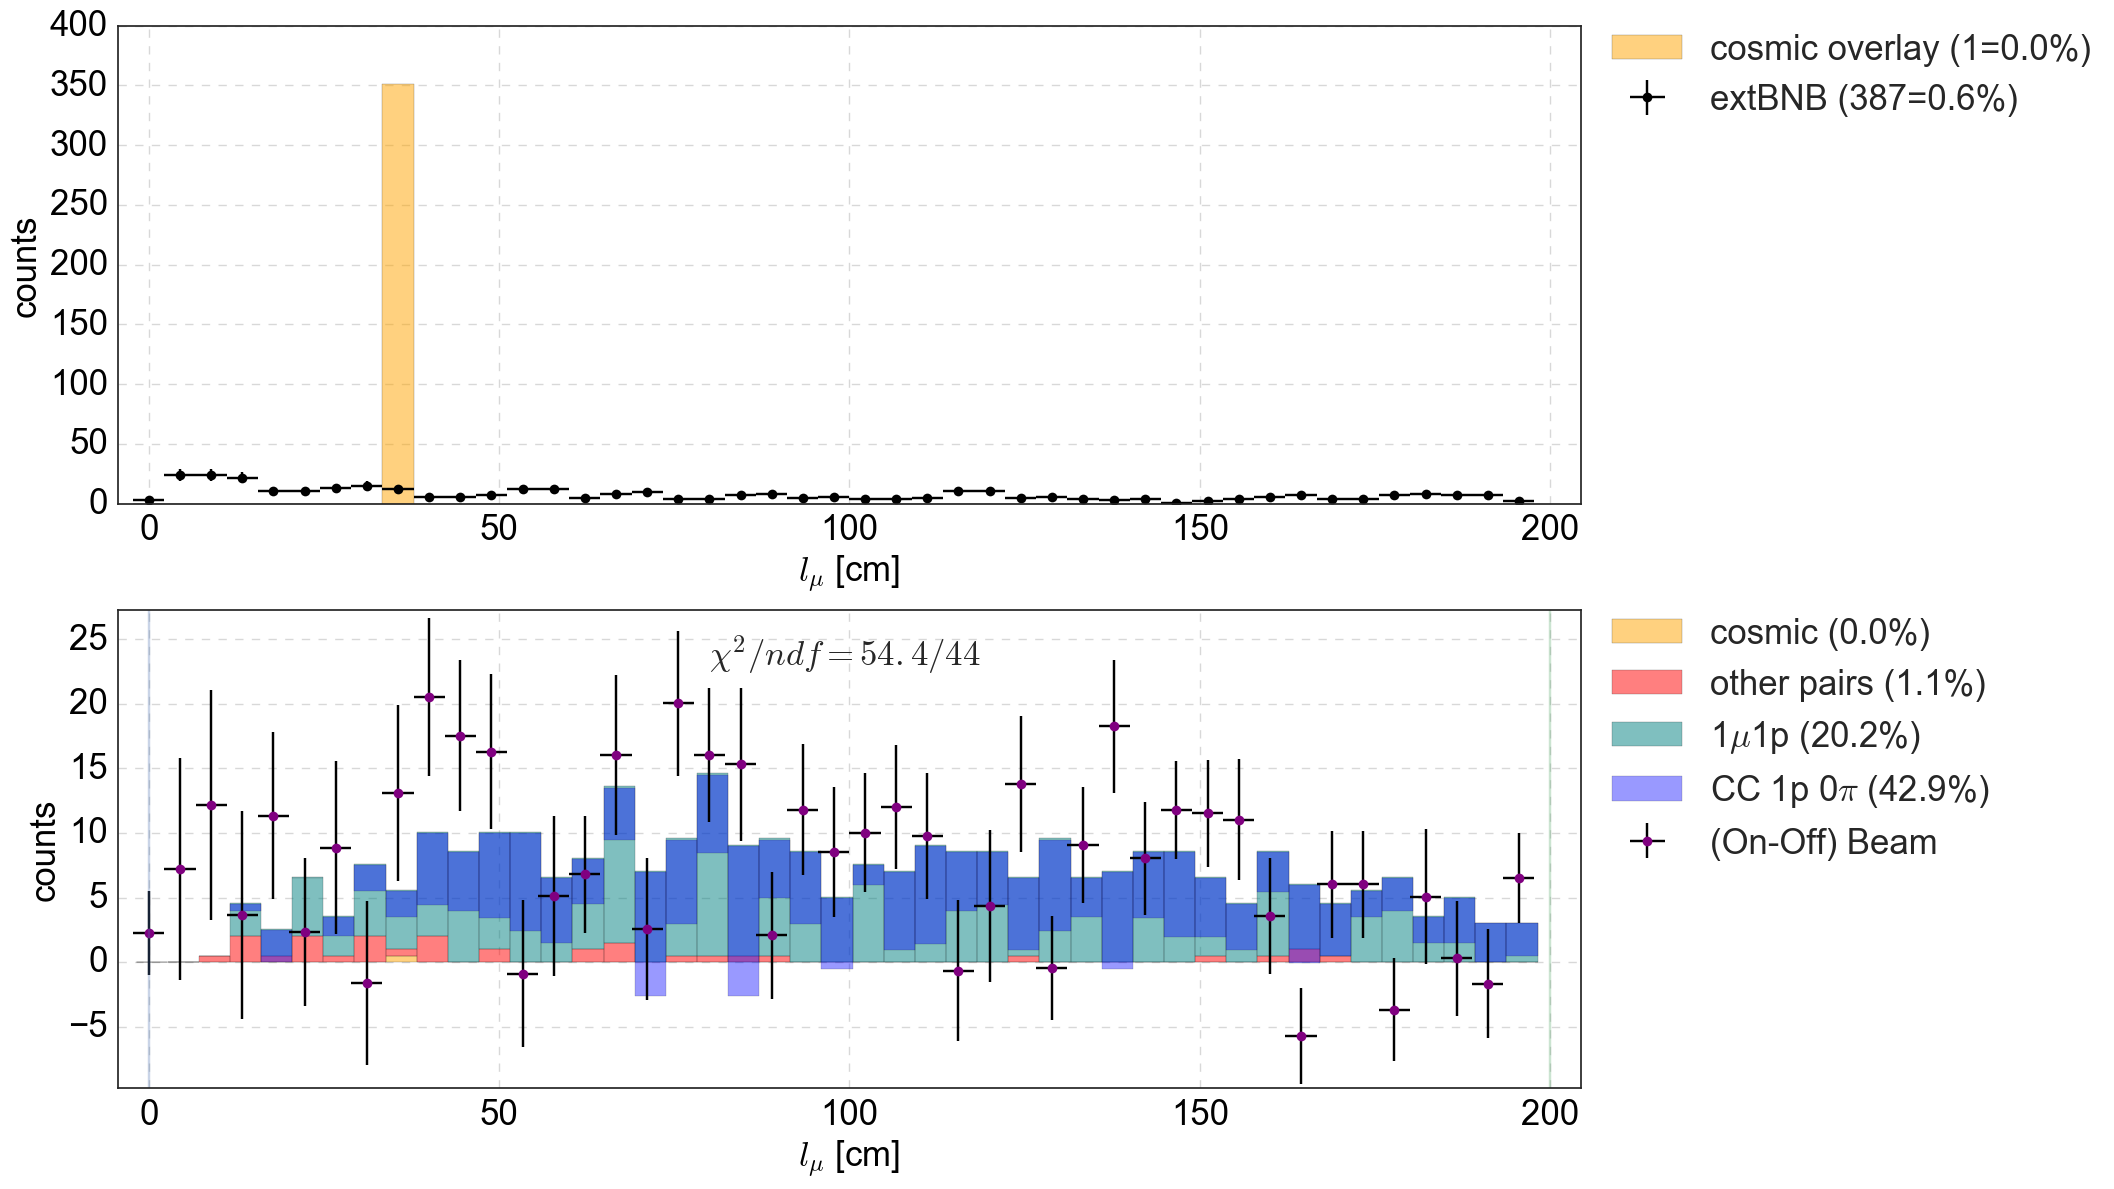

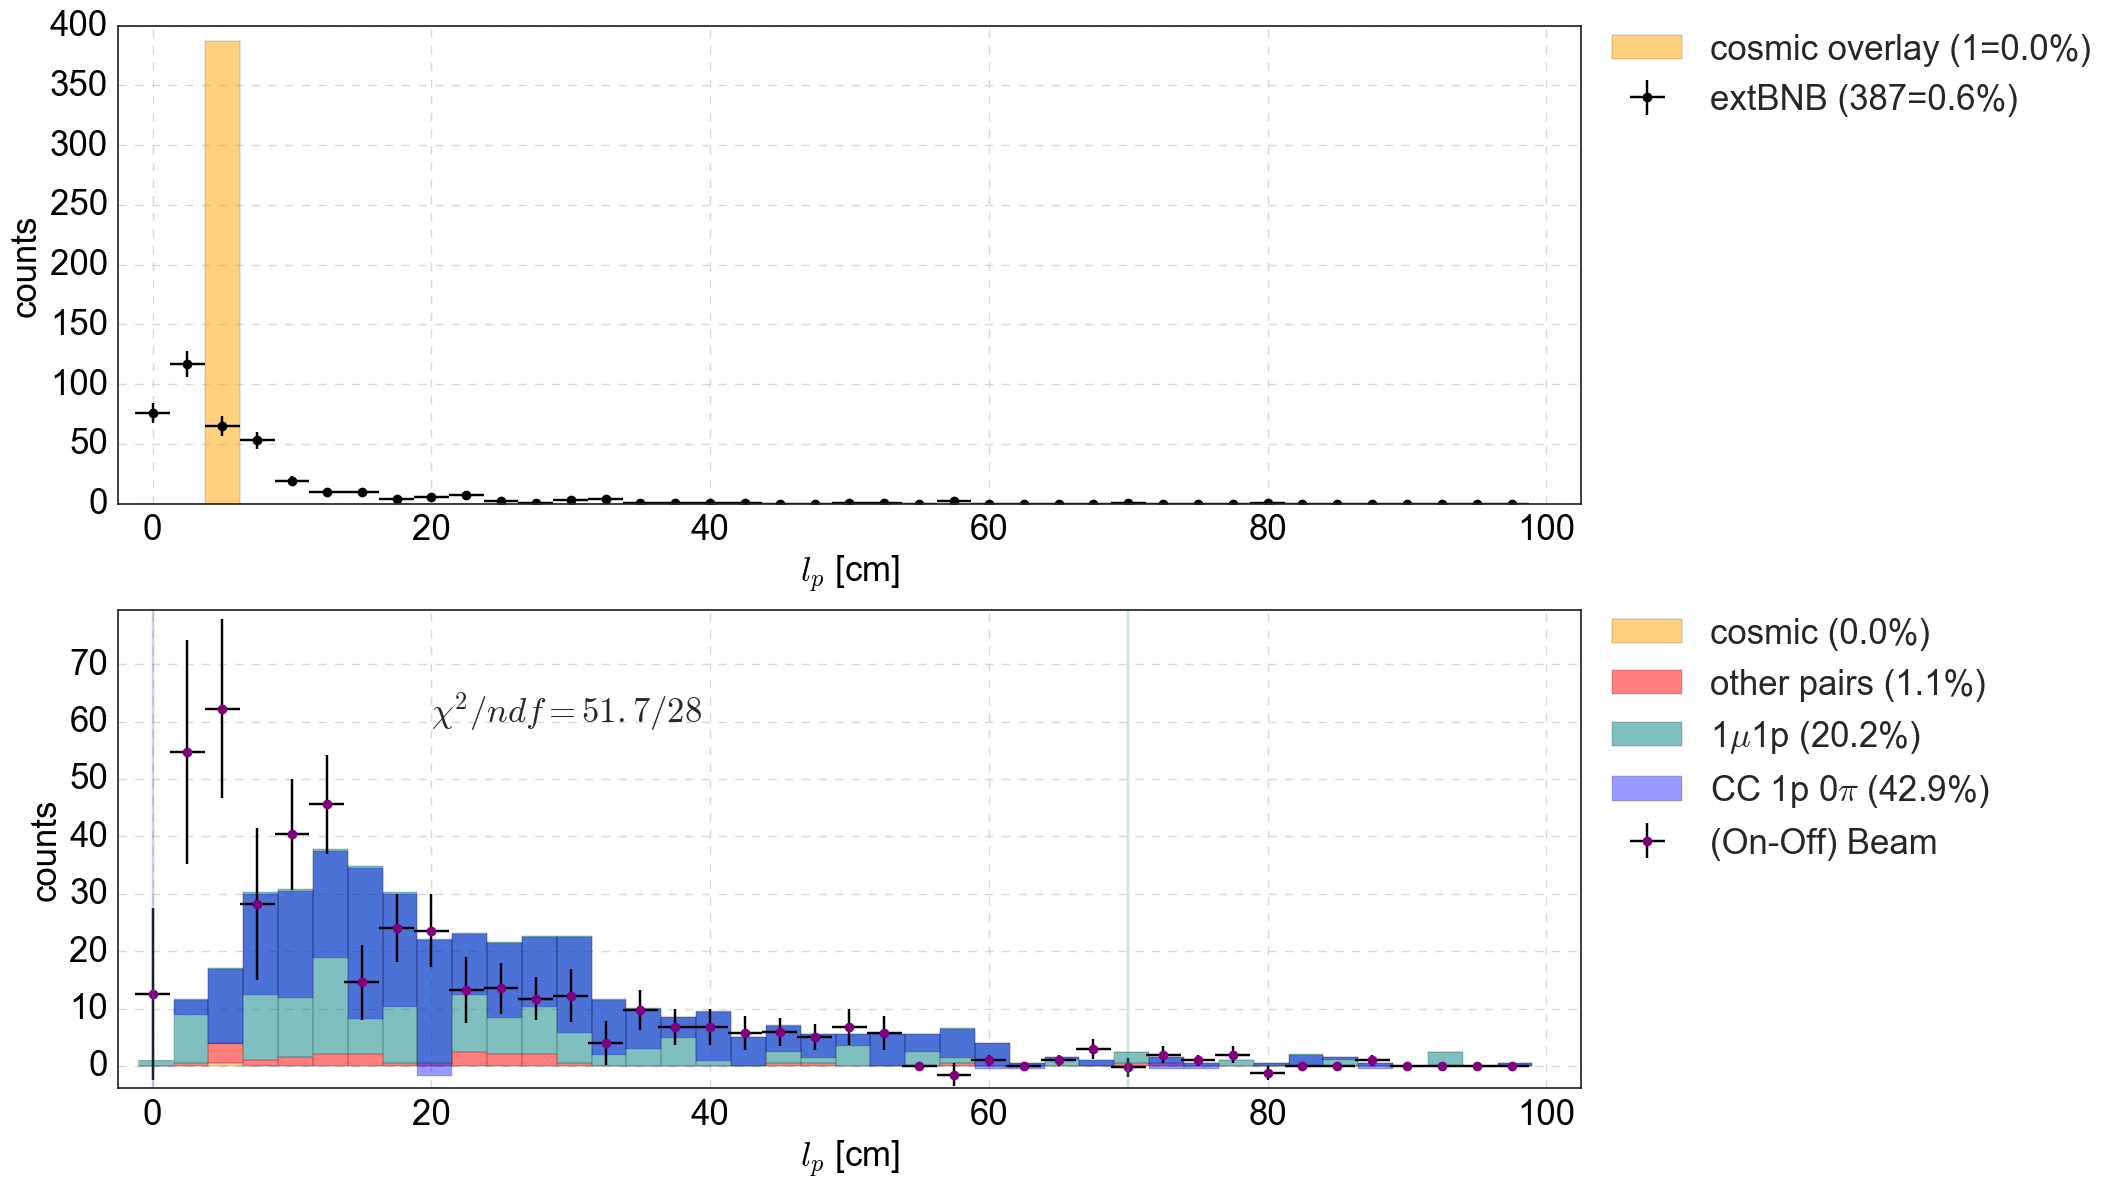

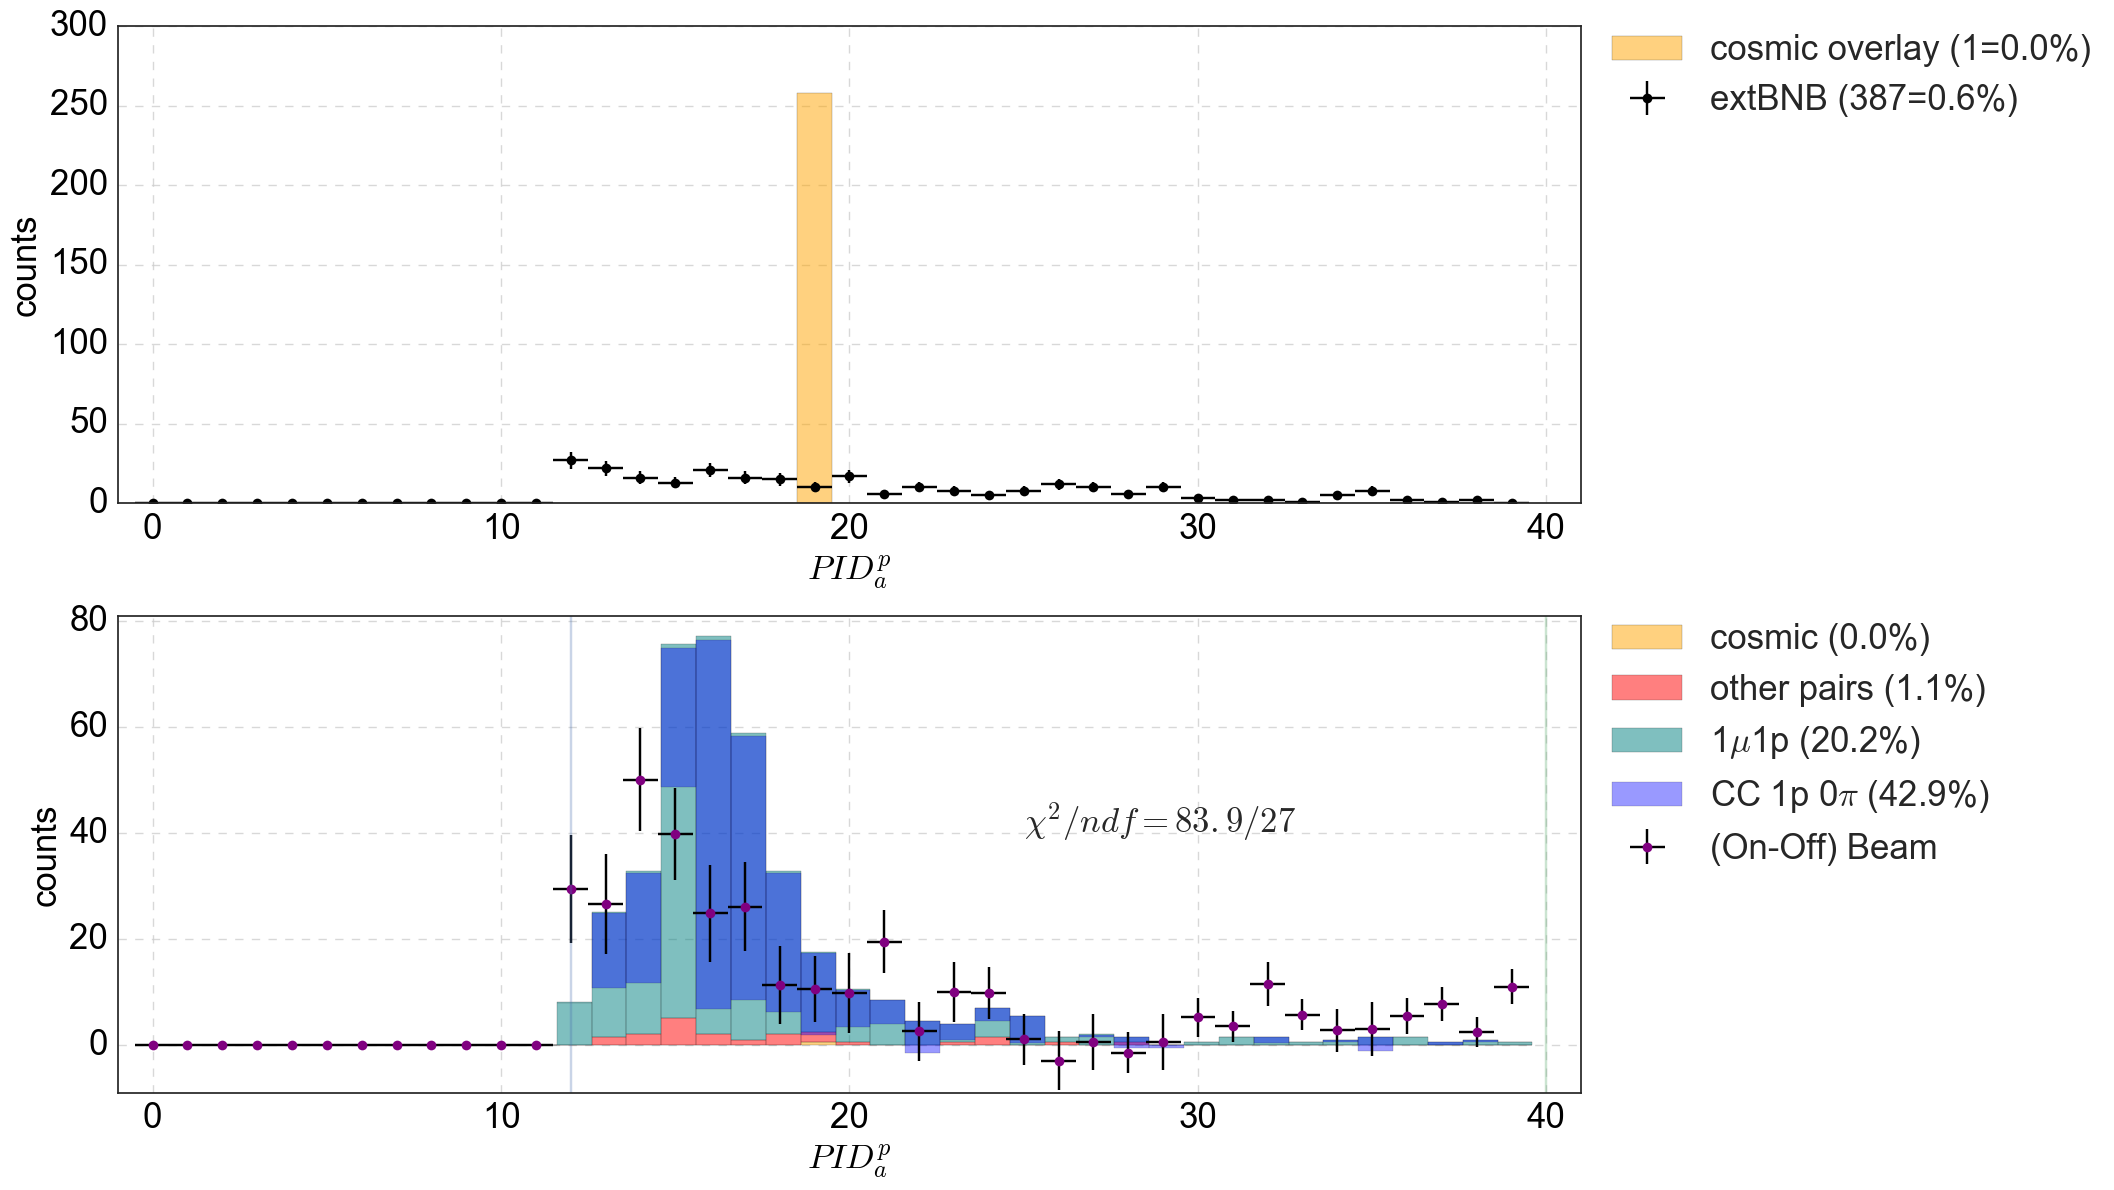

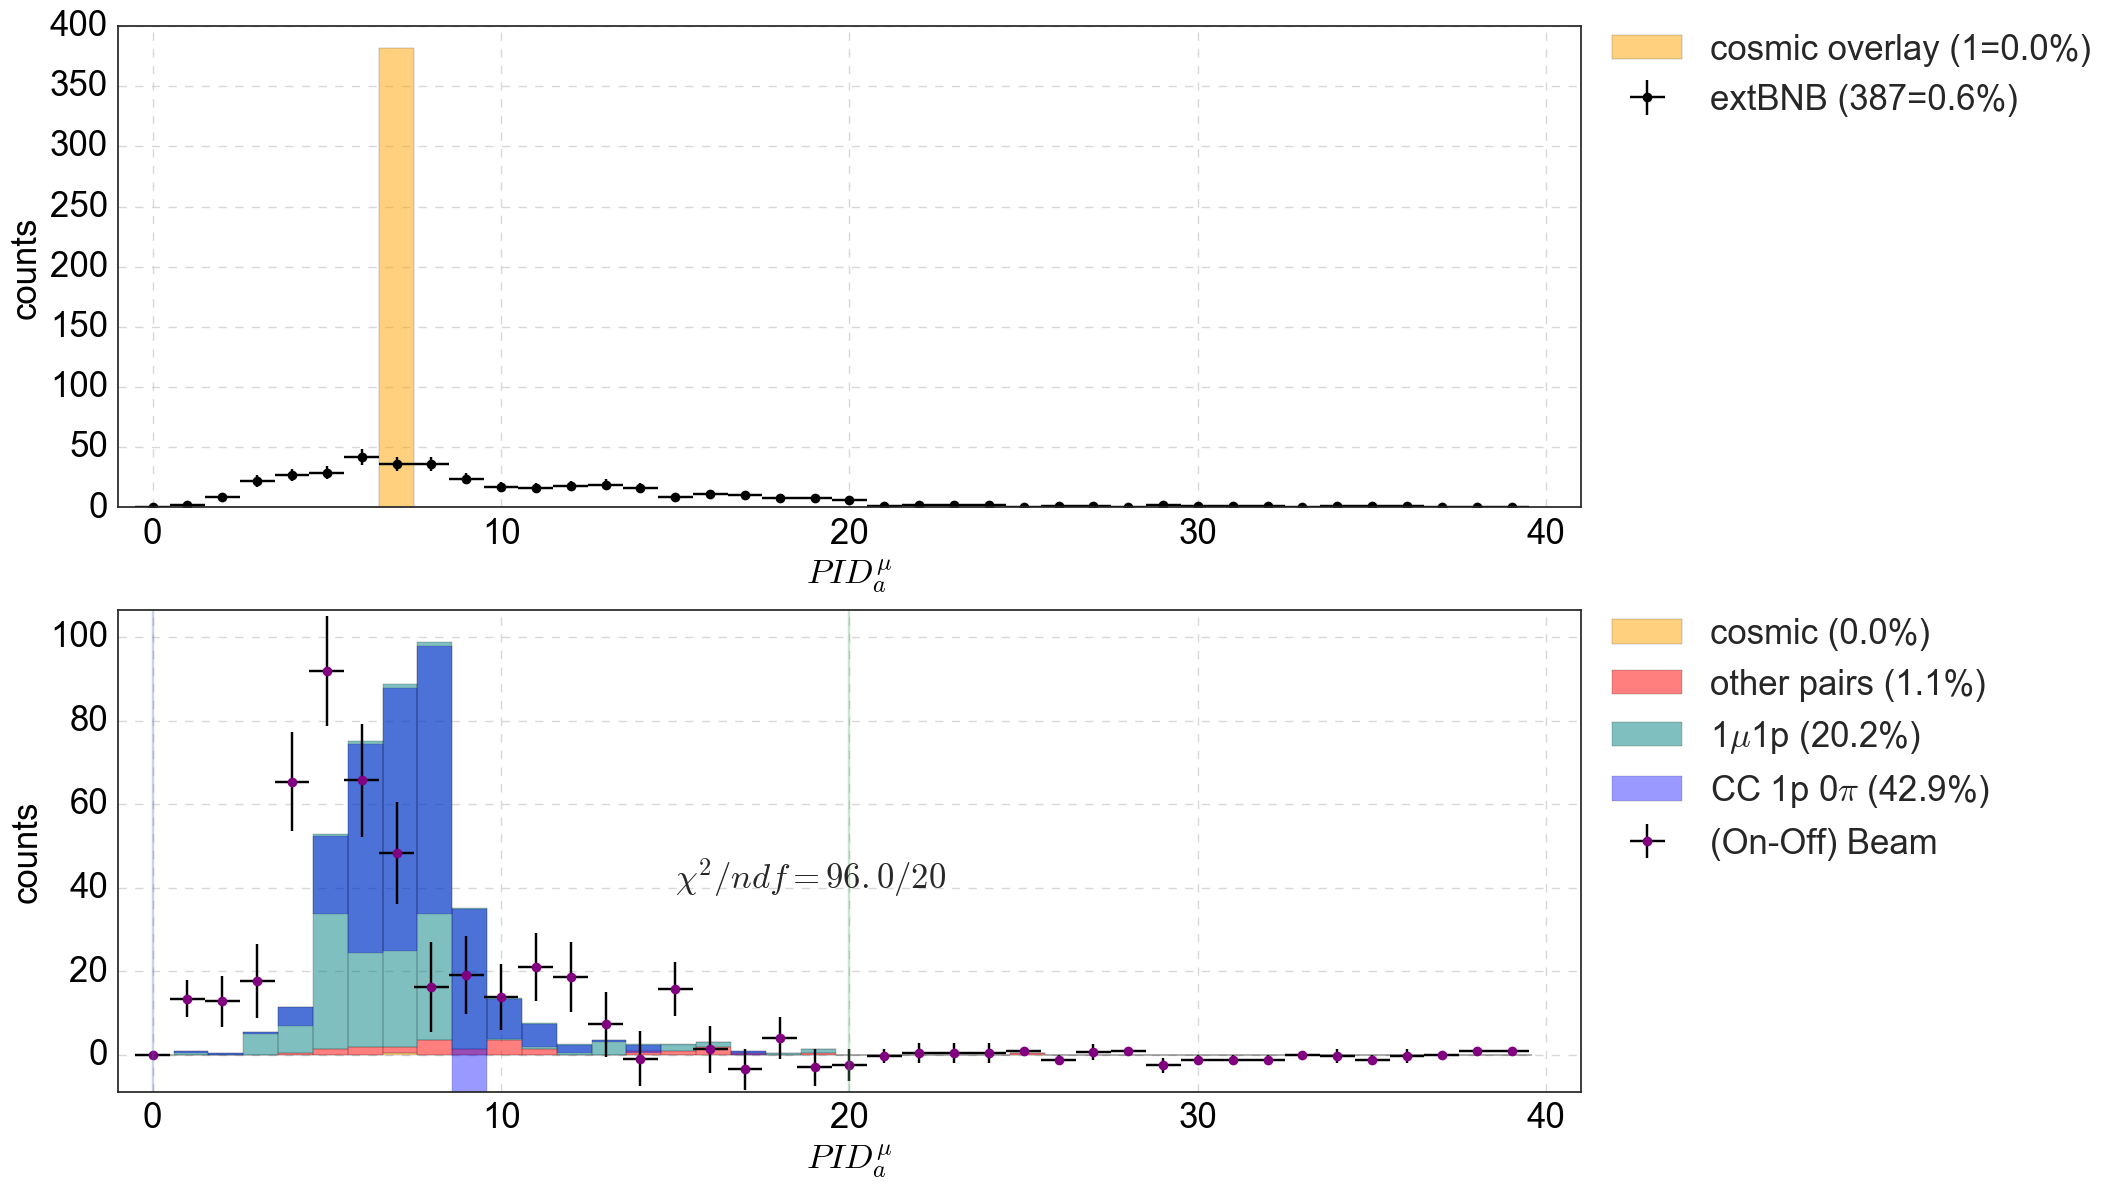

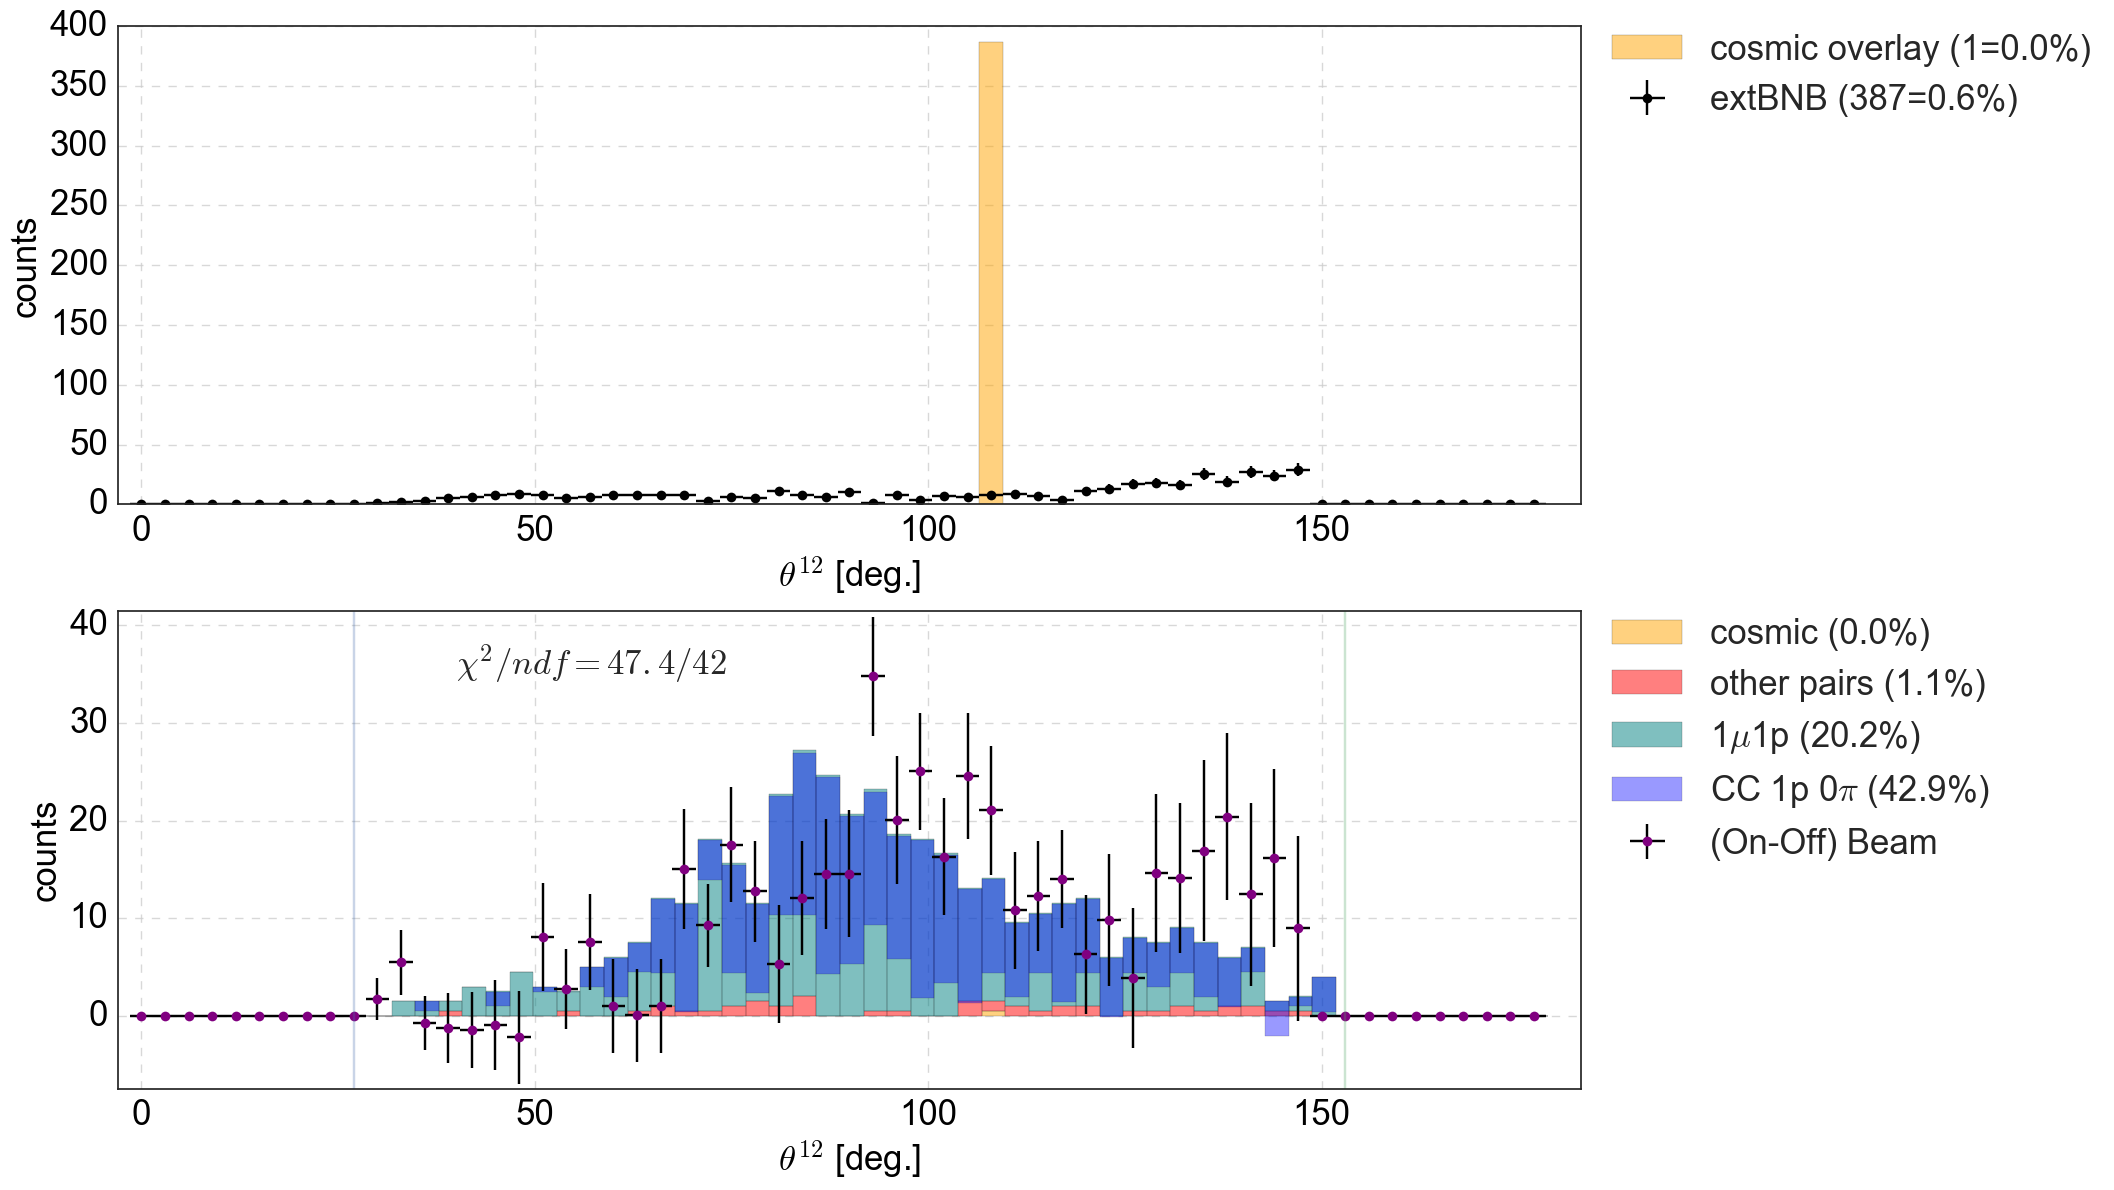

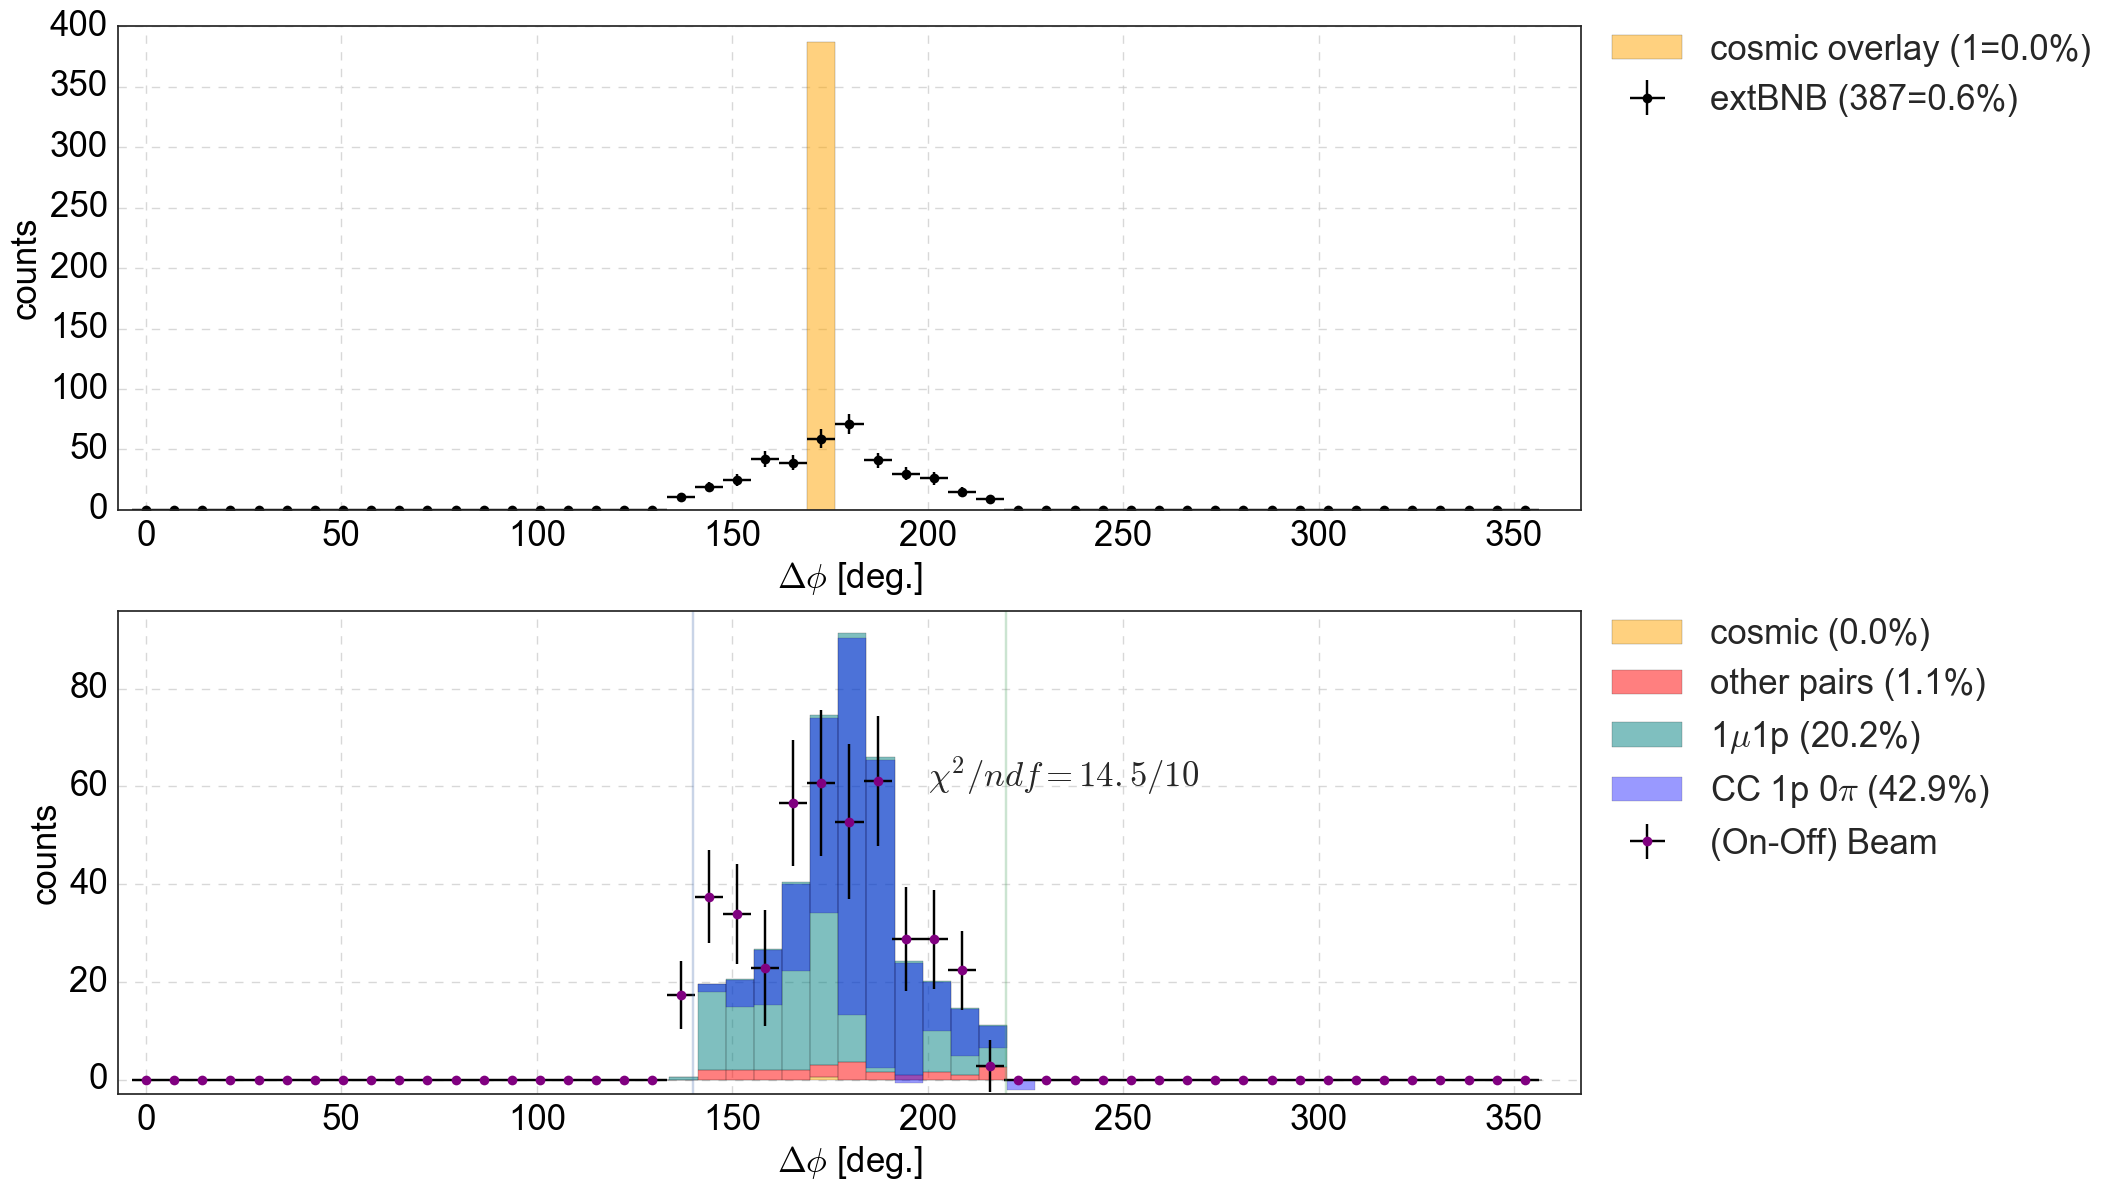

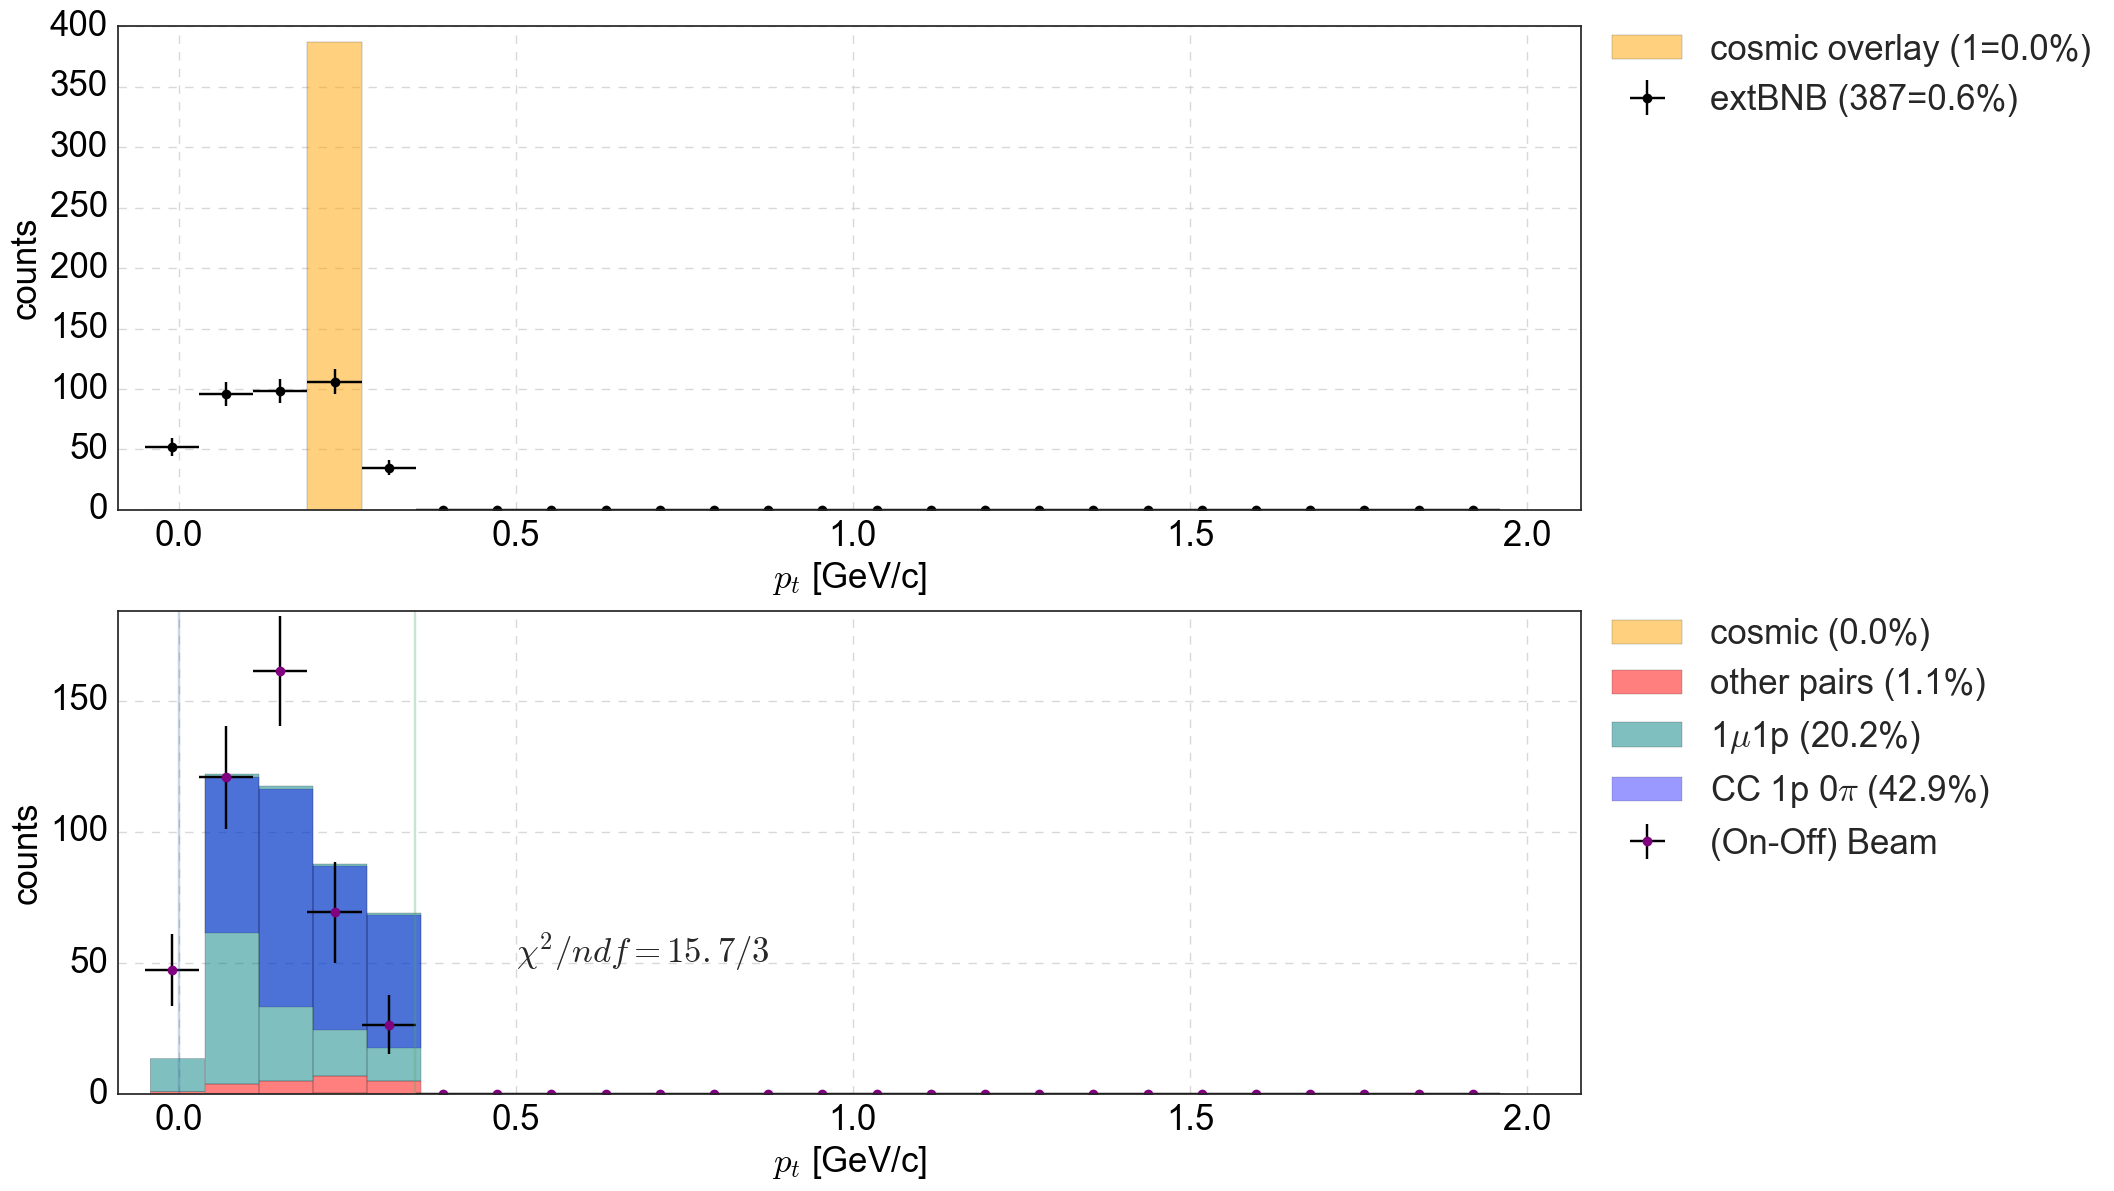

In [11]:
observables = ['l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt']
x_labels = [r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]']
x_bins = [np.linspace(0,5,25),np.linspace(0,200,46),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,61),np.linspace(0,360,51),np.linspace(-0.01,2,26)]
chi2_xranges = [(0,5),(0,200),(0,70),(12,40),(0,20),(27,153),(140,220),(0,0.35)]
chi2_xy_text = [(2,40),(80,23),(20,60),(25,40),(15,40),(40,35),(200,60),(0.5,50)]

for cut_name in ['no cut','non-collinearity first']: # 'PIDa','length','non-collinearity','vertex activity',
    for var,x_label,bins,chi2_xrange,chi2_xy in zip(observables,x_labels,x_bins,chi2_xranges,chi2_xy_text):
        fig = plt.figure(figsize=(16,12))

        ax = fig.add_subplot(2,1,1)
        ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam[cut_name]
                                     ,OffBeamFV=OffBeamFV,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                                     ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples[cut_name]['cosmic']
                                     ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')

        ax = fig.add_subplot(2,1,2)
        ax,leg=OnBeam_minus_OffBeam_1d(OnBeamSample=reduced_OnBeam[cut_name] 
                            ,OffBeamSample=reduced_OffBeam[cut_name] 
                            ,MCsamples=reduced_MCbnbDATAcosmicSamples[cut_name], MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                            ,var=var , x_label=x_label ,bins=bins  , ax=ax, legend_loc='bbox'
                                       ,do_add_chi2_MC_data=True , chi2_xrange=chi2_xrange, chi2_xy=chi2_xy)

comparing in bin: 0.0 h1: 1320.65281899 h2: 921.938982539
comparing in bin: 0.222222222222 h1: 8062.13649852 h2: 3042.42891781
comparing in bin: 0.444444444444 h1: 7848.7537092 h2: 3152.02984555
comparing in bin: 0.666666666667 h1: 4936.05341247 h2: 2339.18213414
comparing in bin: 0.888888888889 h1: 3184.09495549 h2: 1579.55614578
comparing in bin: 1.11111111111 h1: 2746.23145401 h2: 1363.0237479
comparing in bin: 1.33333333333 h1: 1851.33531157 h2: 1086.28828384
comparing in bin: 1.55555555556 h1: 1497.71513353 h2: 787.648175287
comparing in bin: 1.77777777778 h1: 1066.91394659 h2: 795.754120936
comparing in bin: 2.0 h1: 781.394658754 h2: 558.521253402
comparing in bin: 2.22222222222 h1: 679.495548962 h2: 413.53648226
comparing in bin: 2.44444444444 h1: 609.3768546 h2: 447.712620769
comparing in bin: 2.66666666667 h1: 531.186943621 h2: 289.348090609
comparing in bin: 2.88888888889 h1: 308.21958457 h2: 298.119307456
comparing in bin: 3.11111111111 h1: 312.255192879 h2: 267.431192971
co

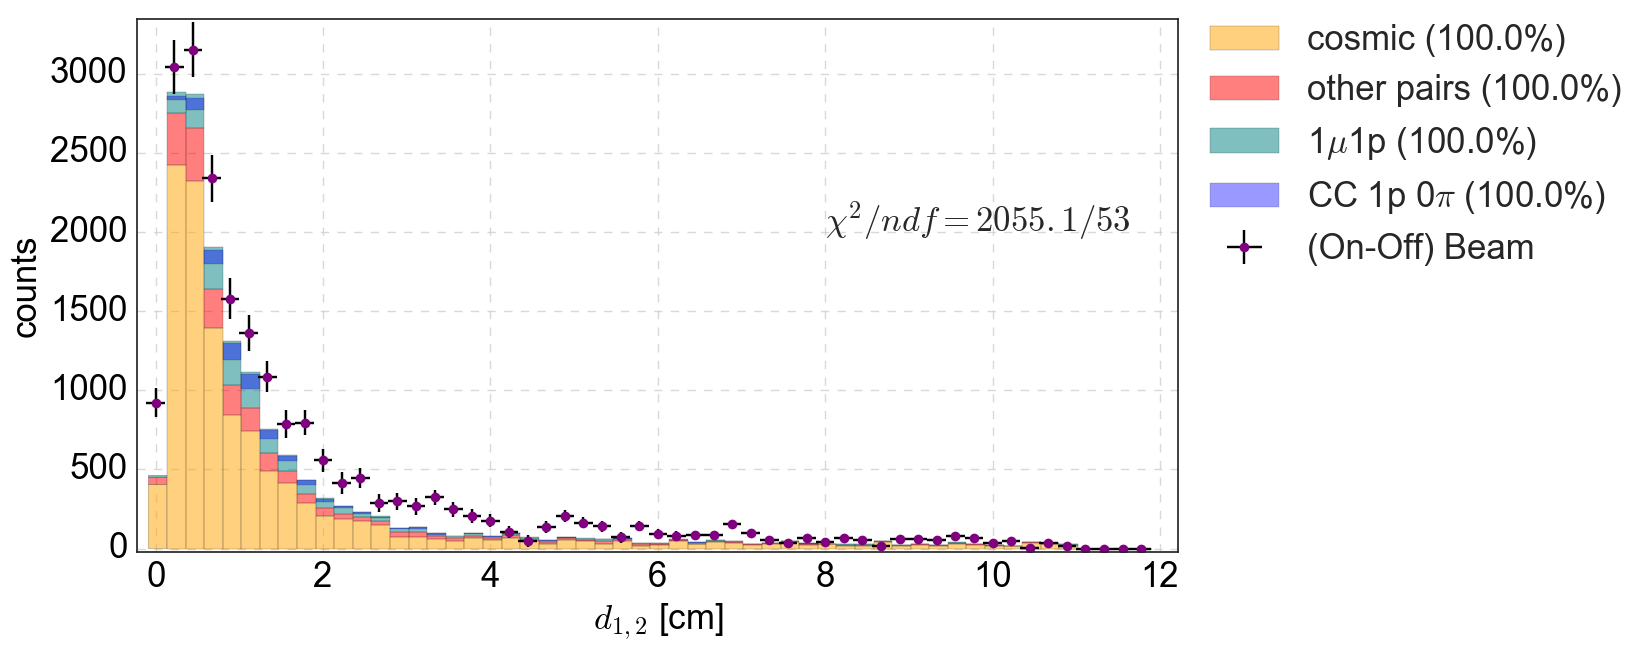

In [9]:
fig = plt.figure(figsize=(12,12))
bins=np.linspace(0,12,55)
var='distance'
x_label = '$d_{1,2}$ [cm]'
# ax = fig.add_subplot(2,1,1)
# ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam['no cut'], OffBeamFV=OffBeamFV
#                       ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']
#                       ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')
ax = fig.add_subplot(2,1,2)
ax,leg=OnBeam_minus_OffBeam_1d(debug=debug
                               ,OnBeamSample=reduced_OnBeam['no cut'] 
                               ,OffBeamSample=reduced_OffBeam['no cut'] 
                               ,MCsamples=reduced_MCbnbDATAcosmicSamples['no cut'], MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                               ,var=var , x_label=x_label ,bins=bins  , ax=ax, legend_loc='bbox'
                               ,do_add_chi2_MC_data=True , chi2_xy=(8,2000))
# plt.tight_layout()
plt.savefig(figures_path+'distance_before_cuts'+'.pdf', bbox_inches='tight')

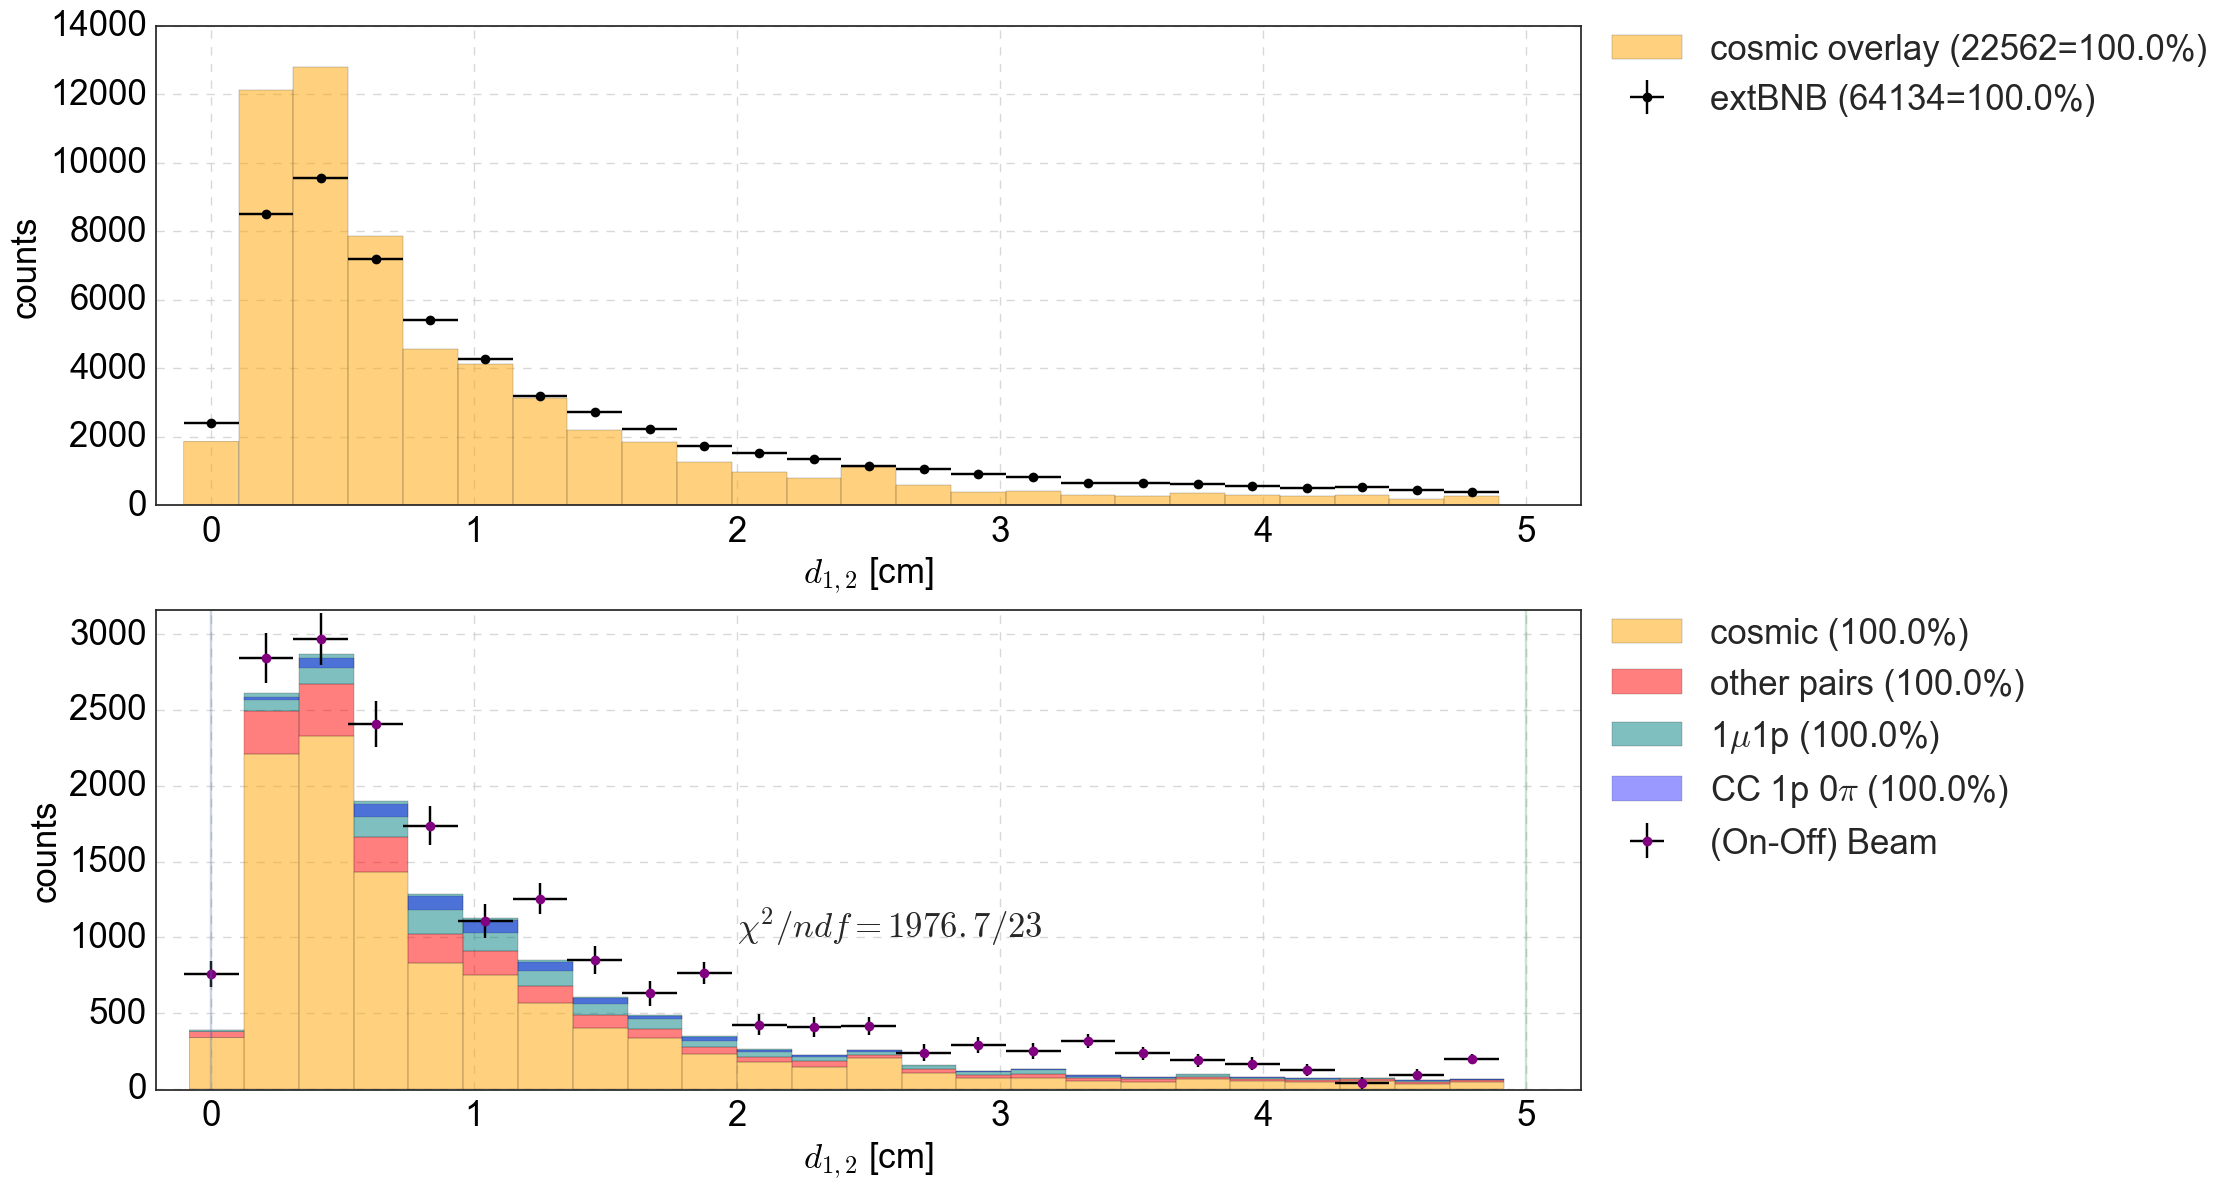

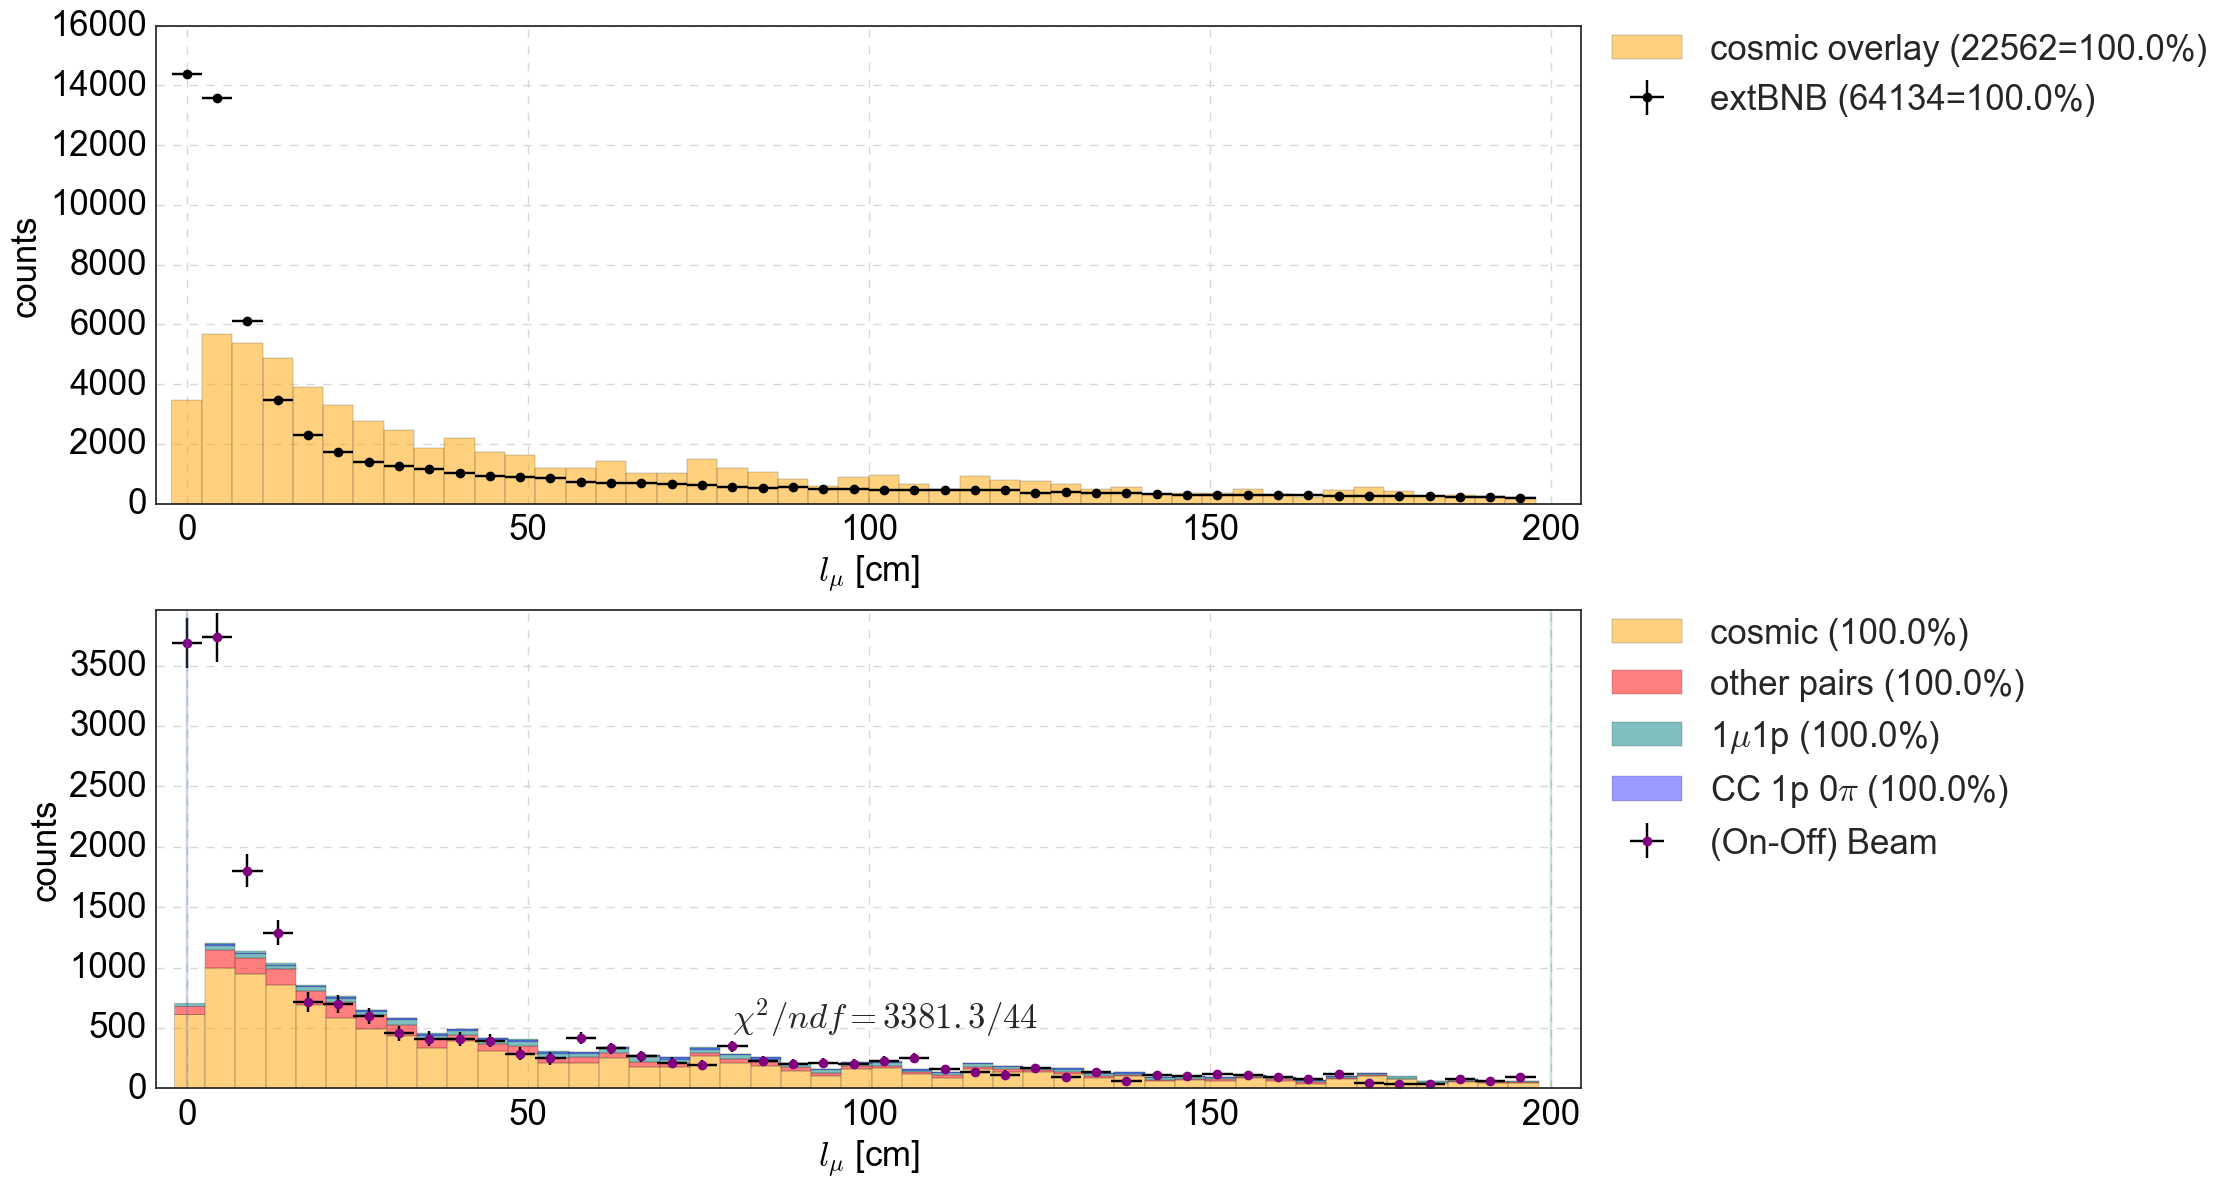

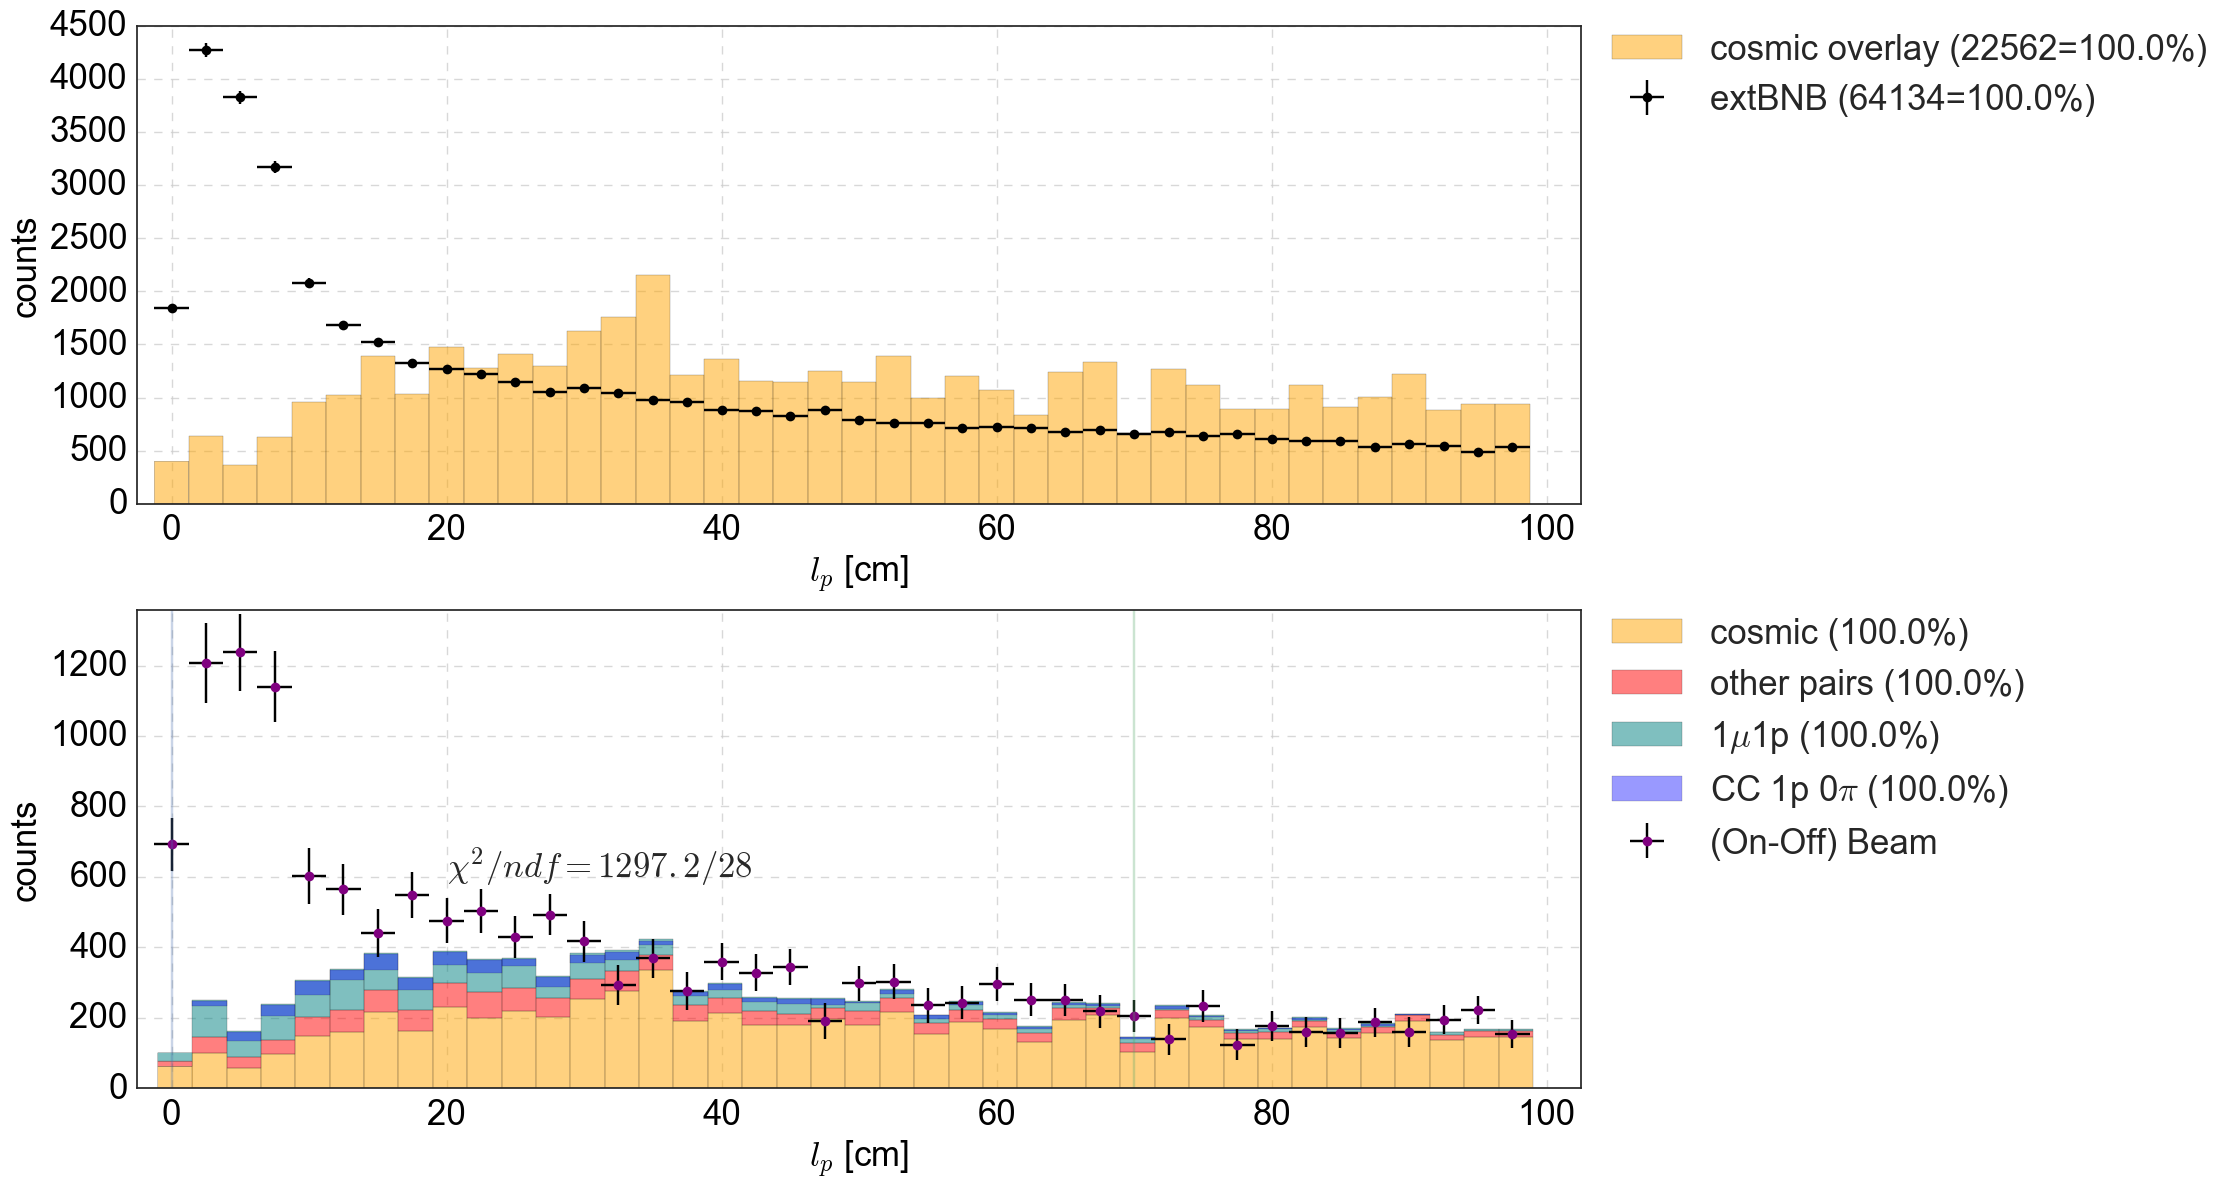

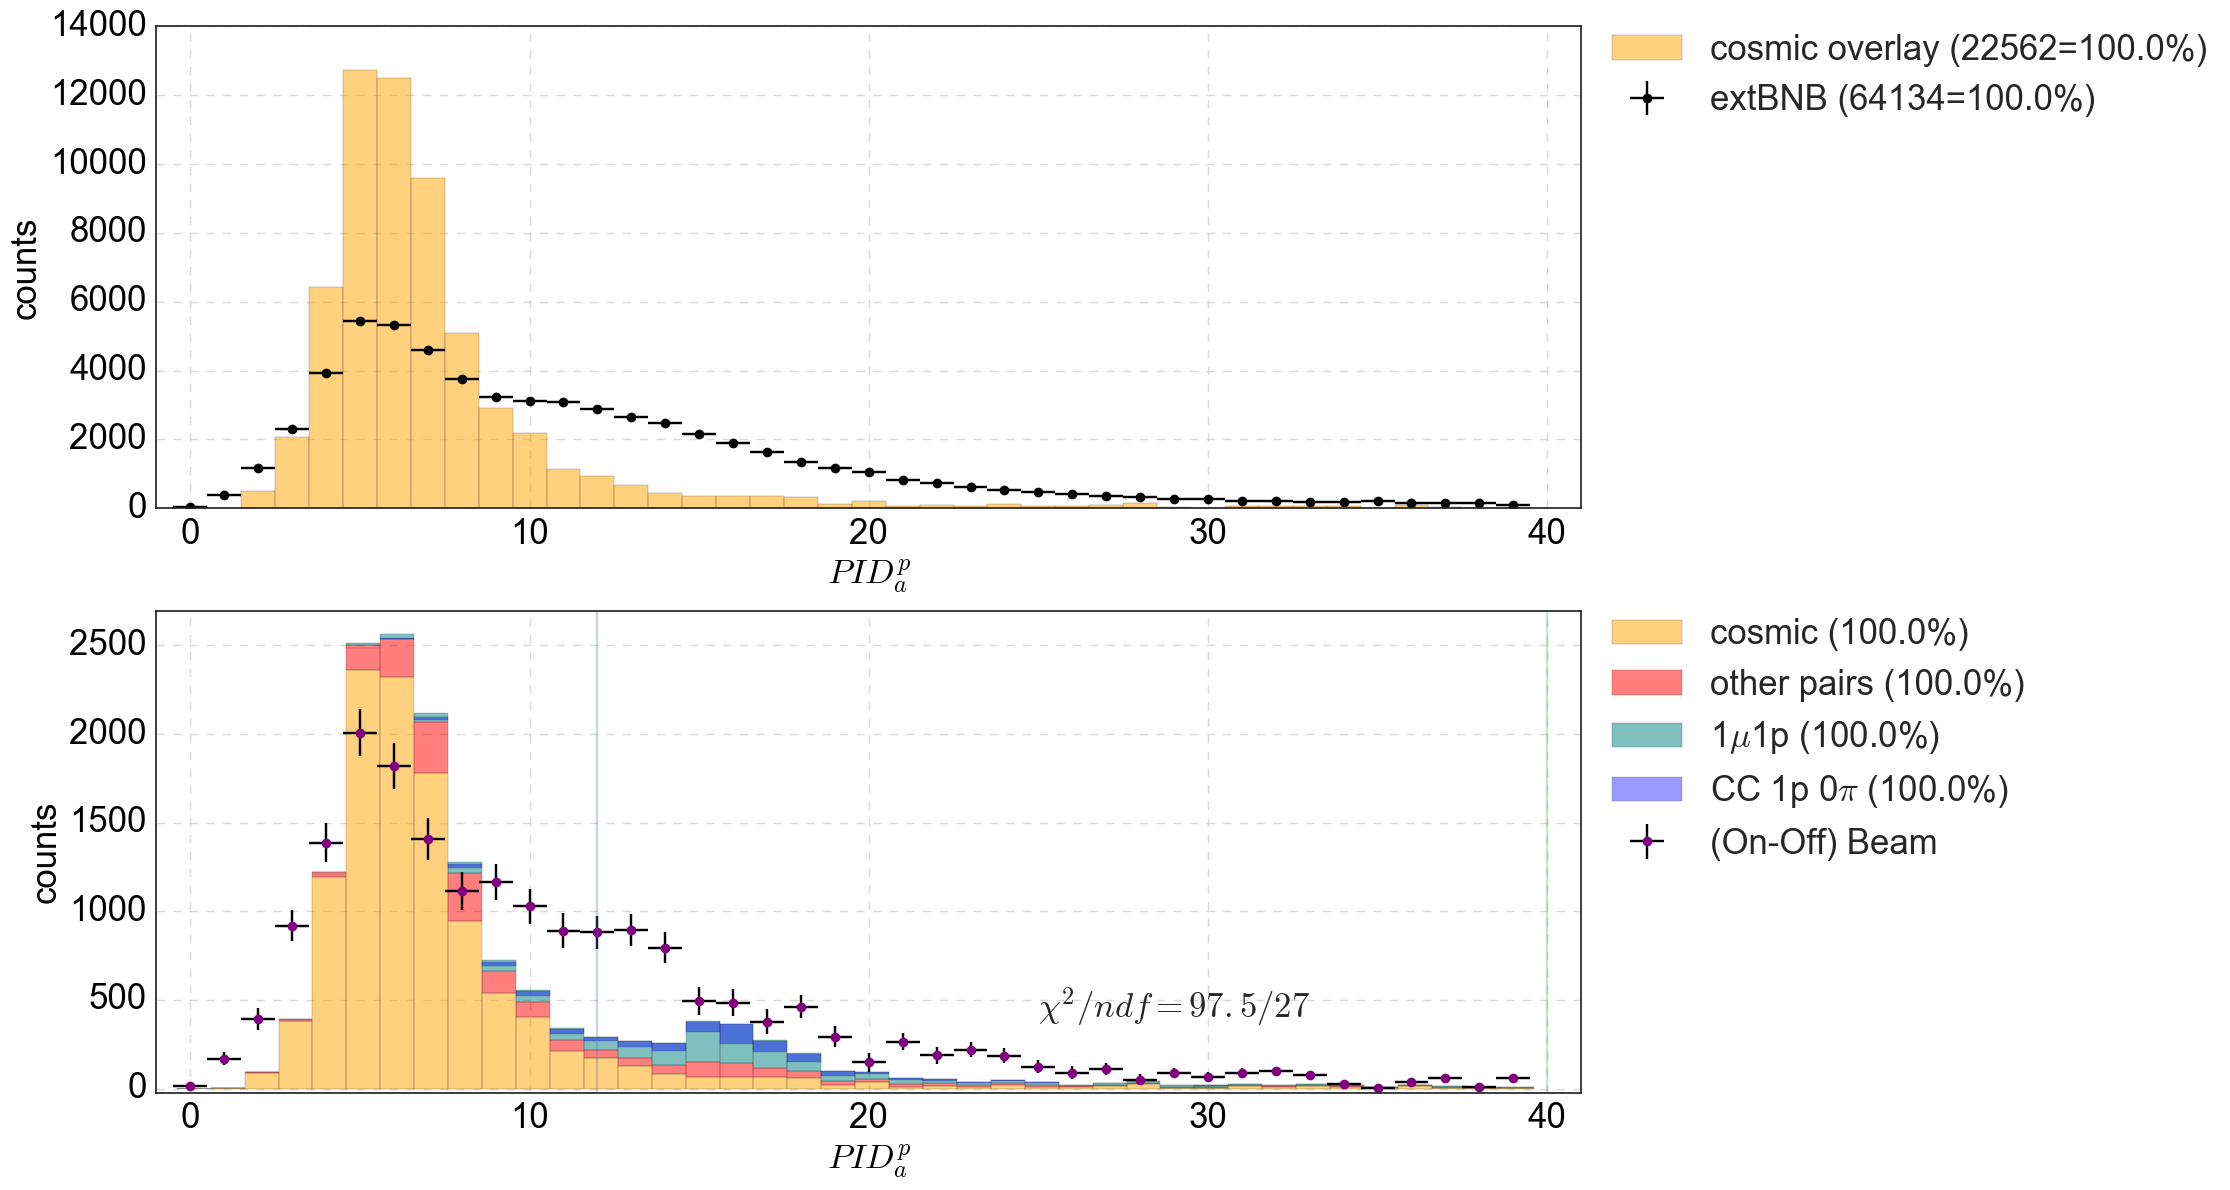

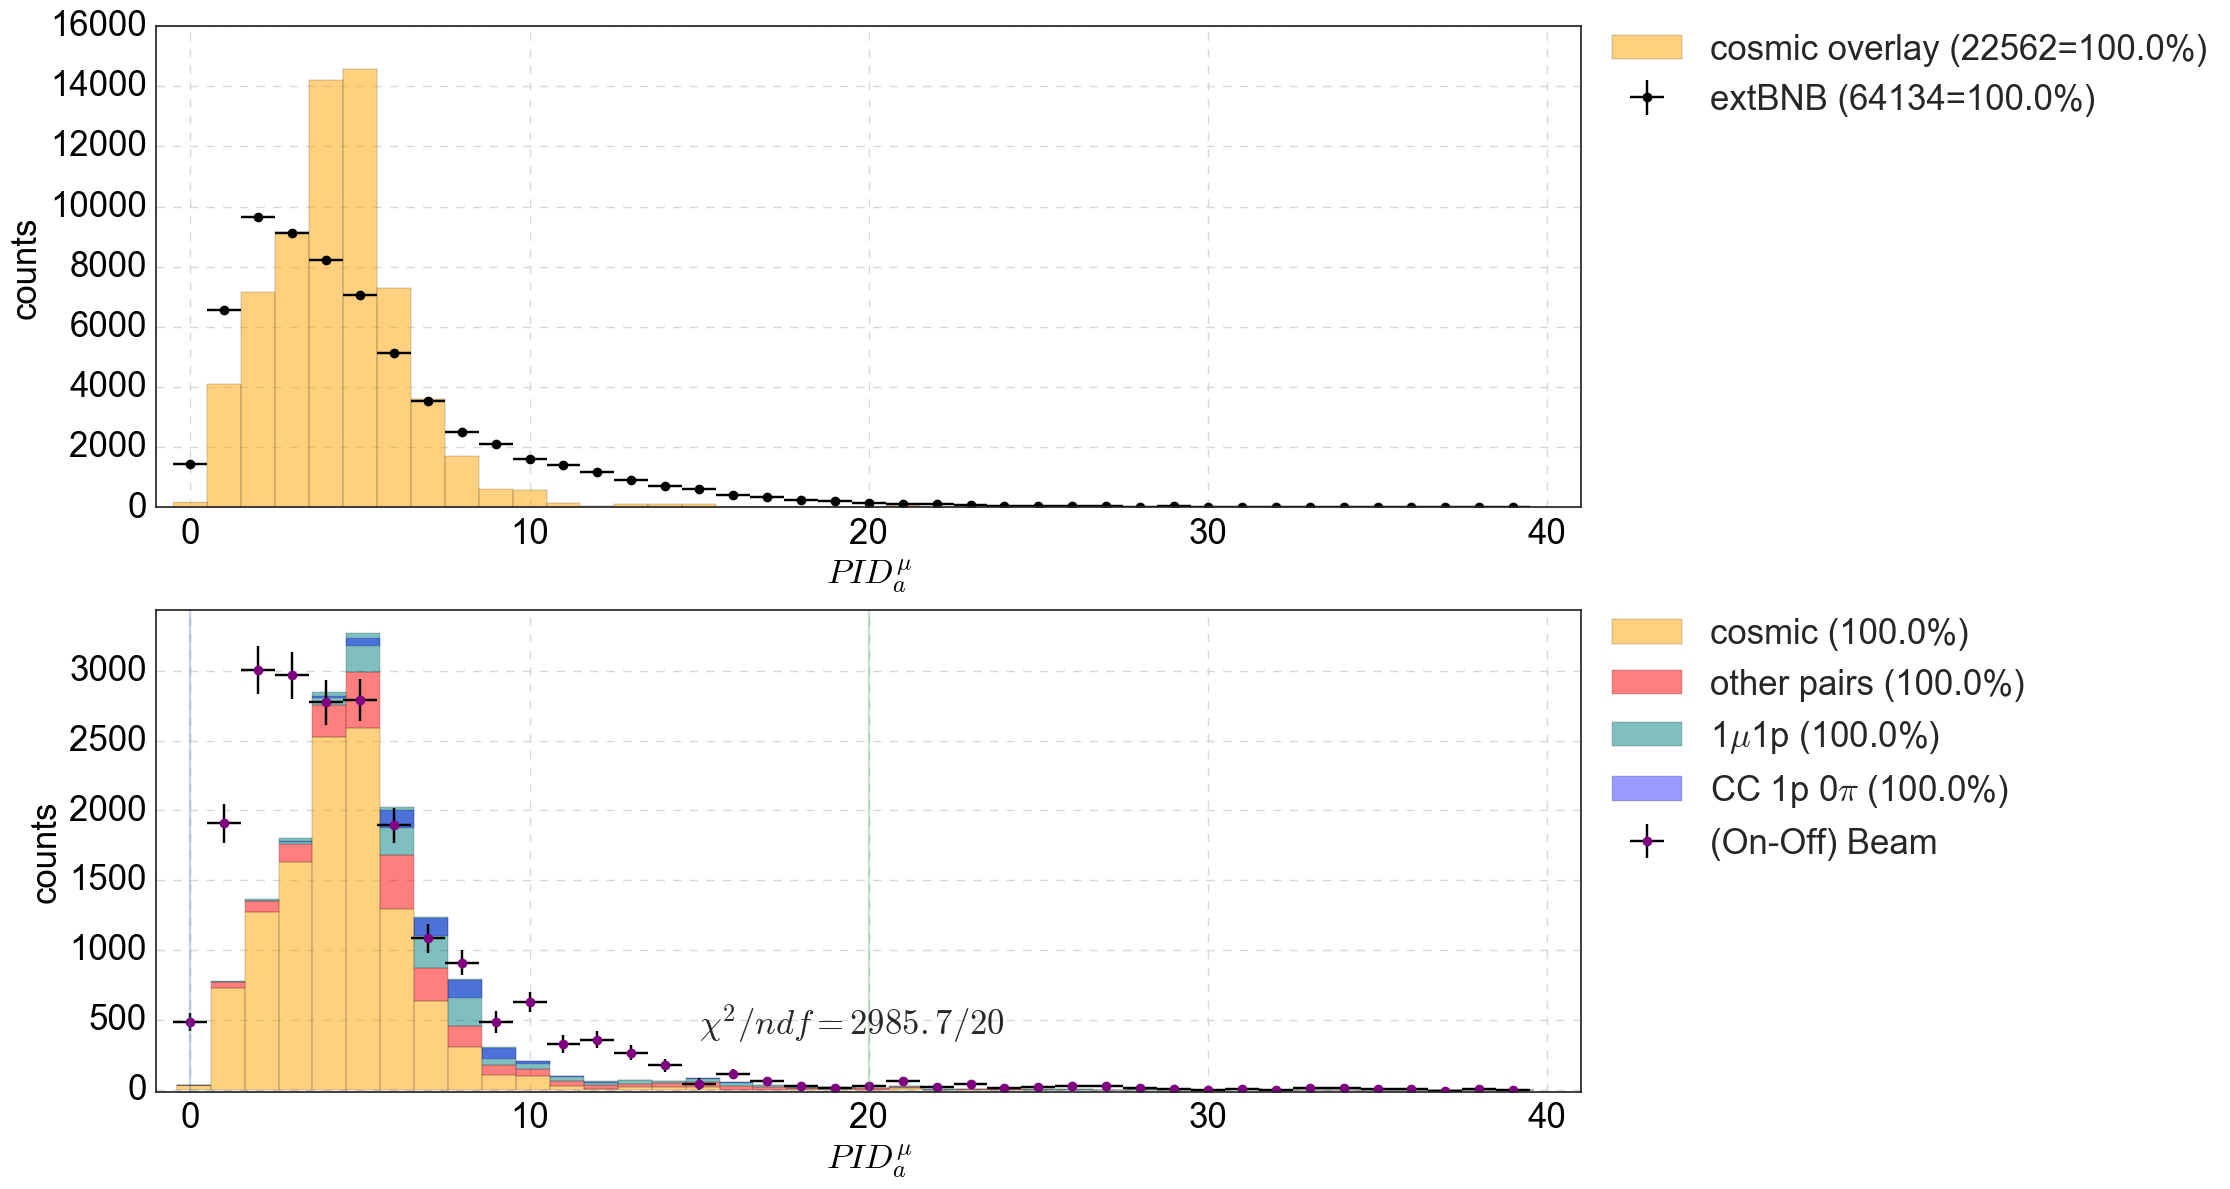

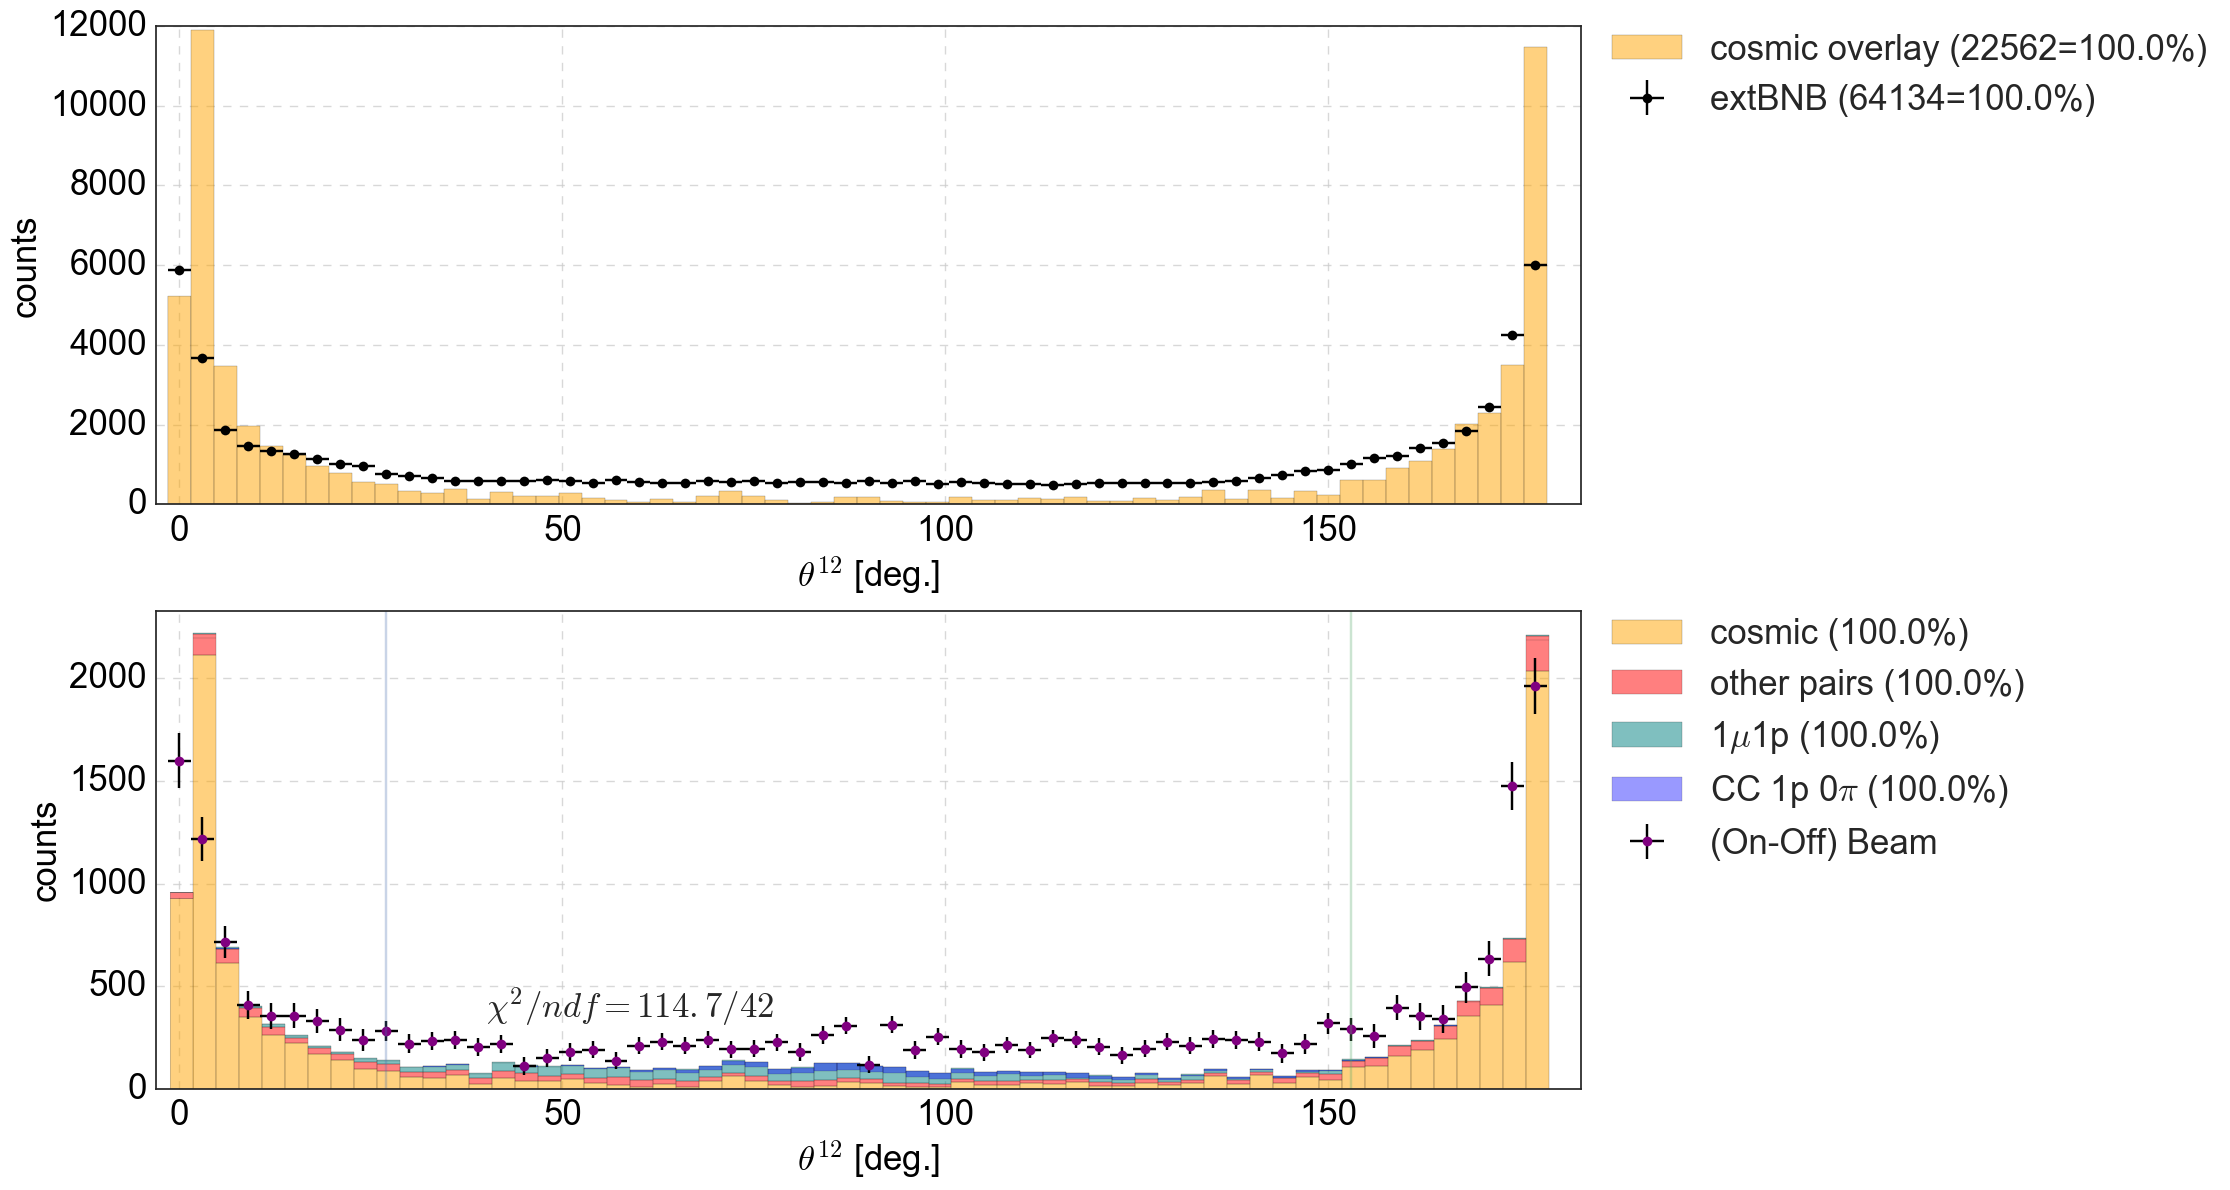

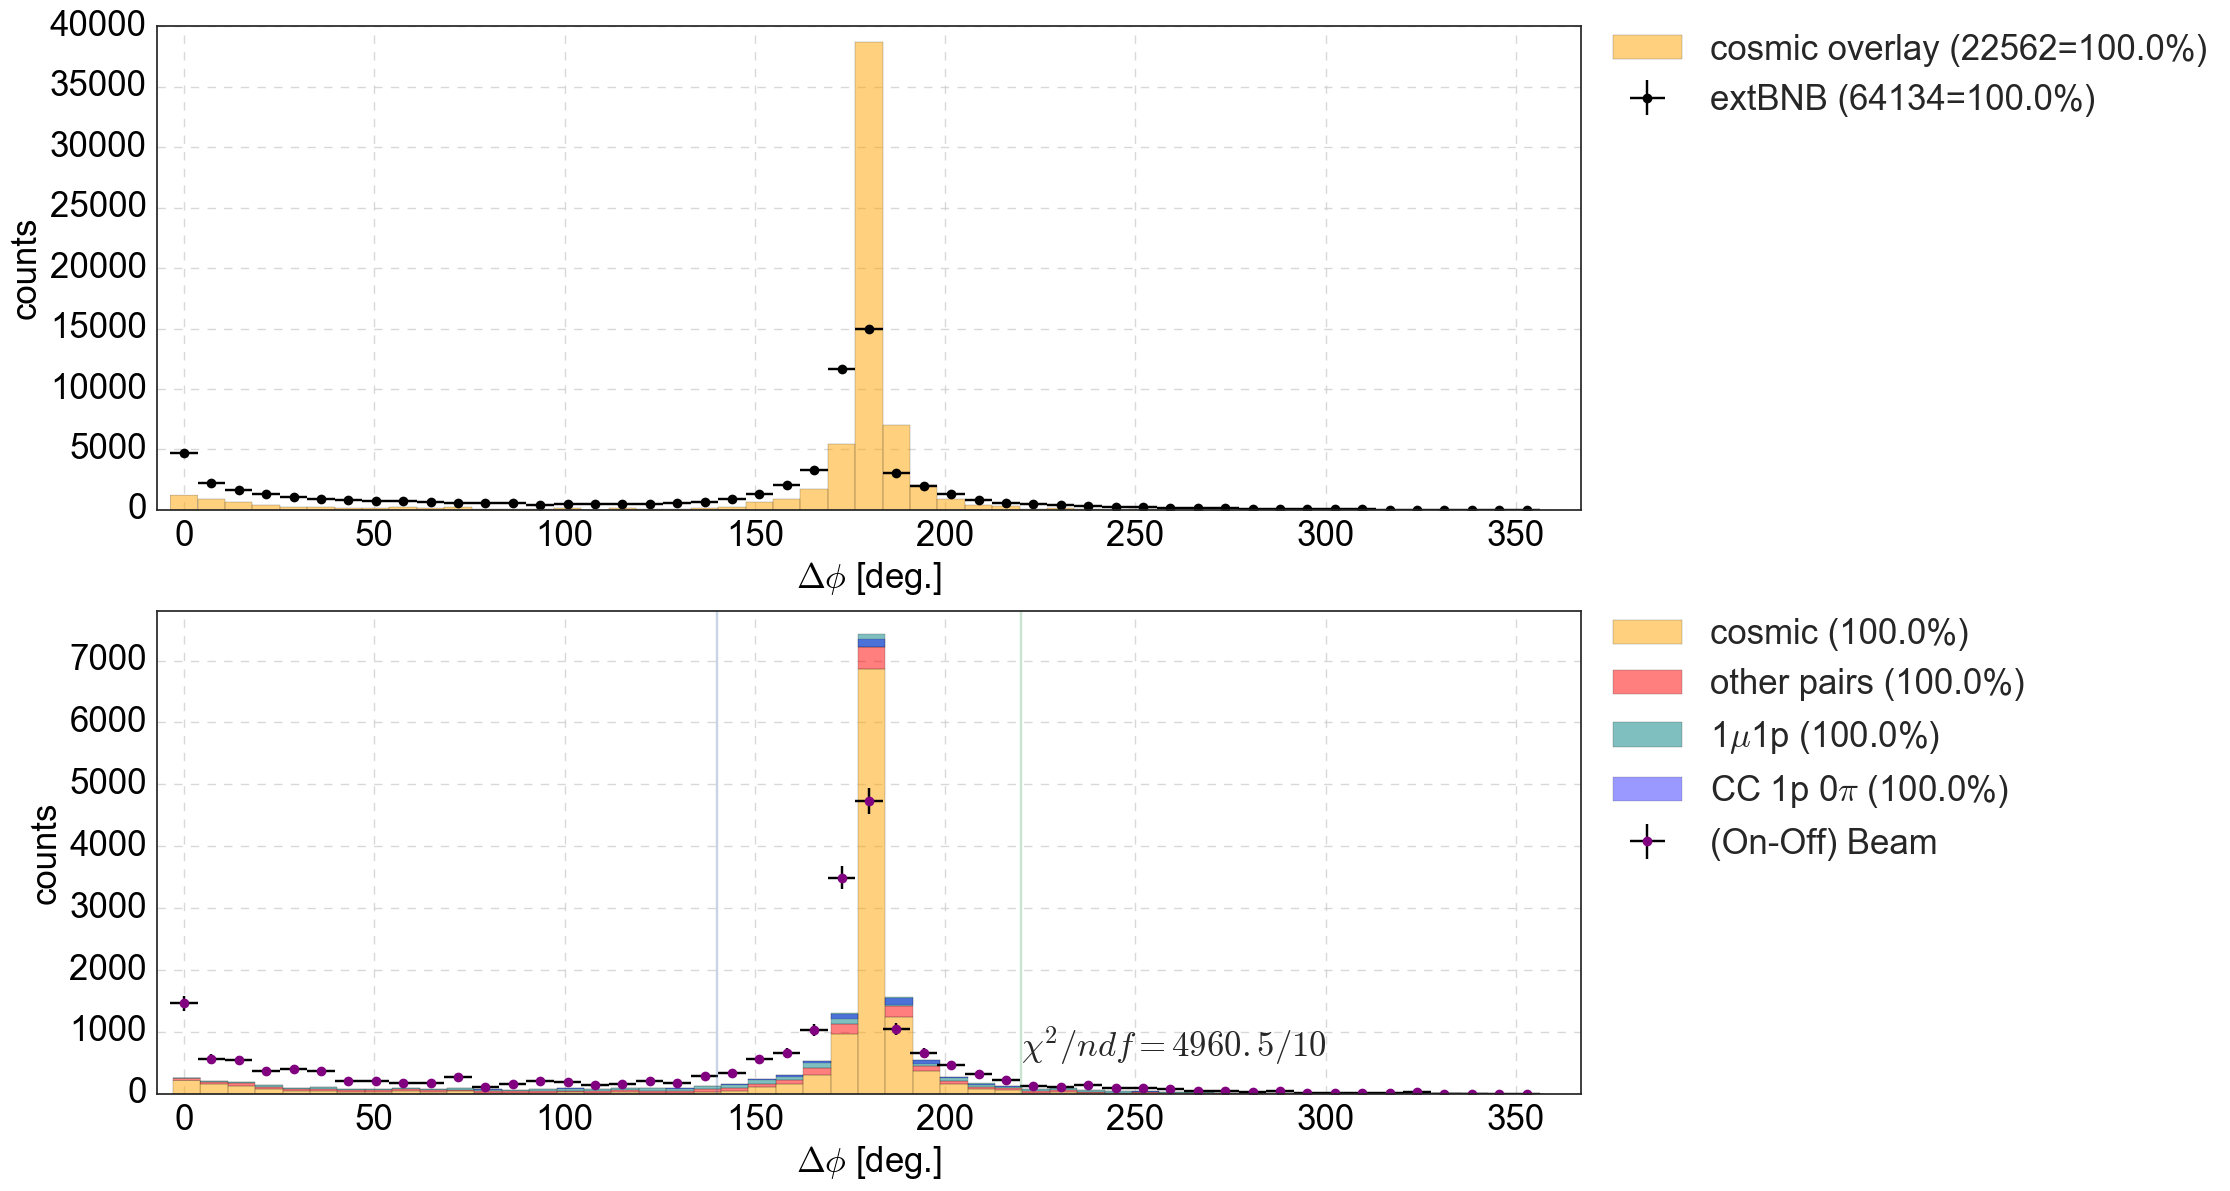

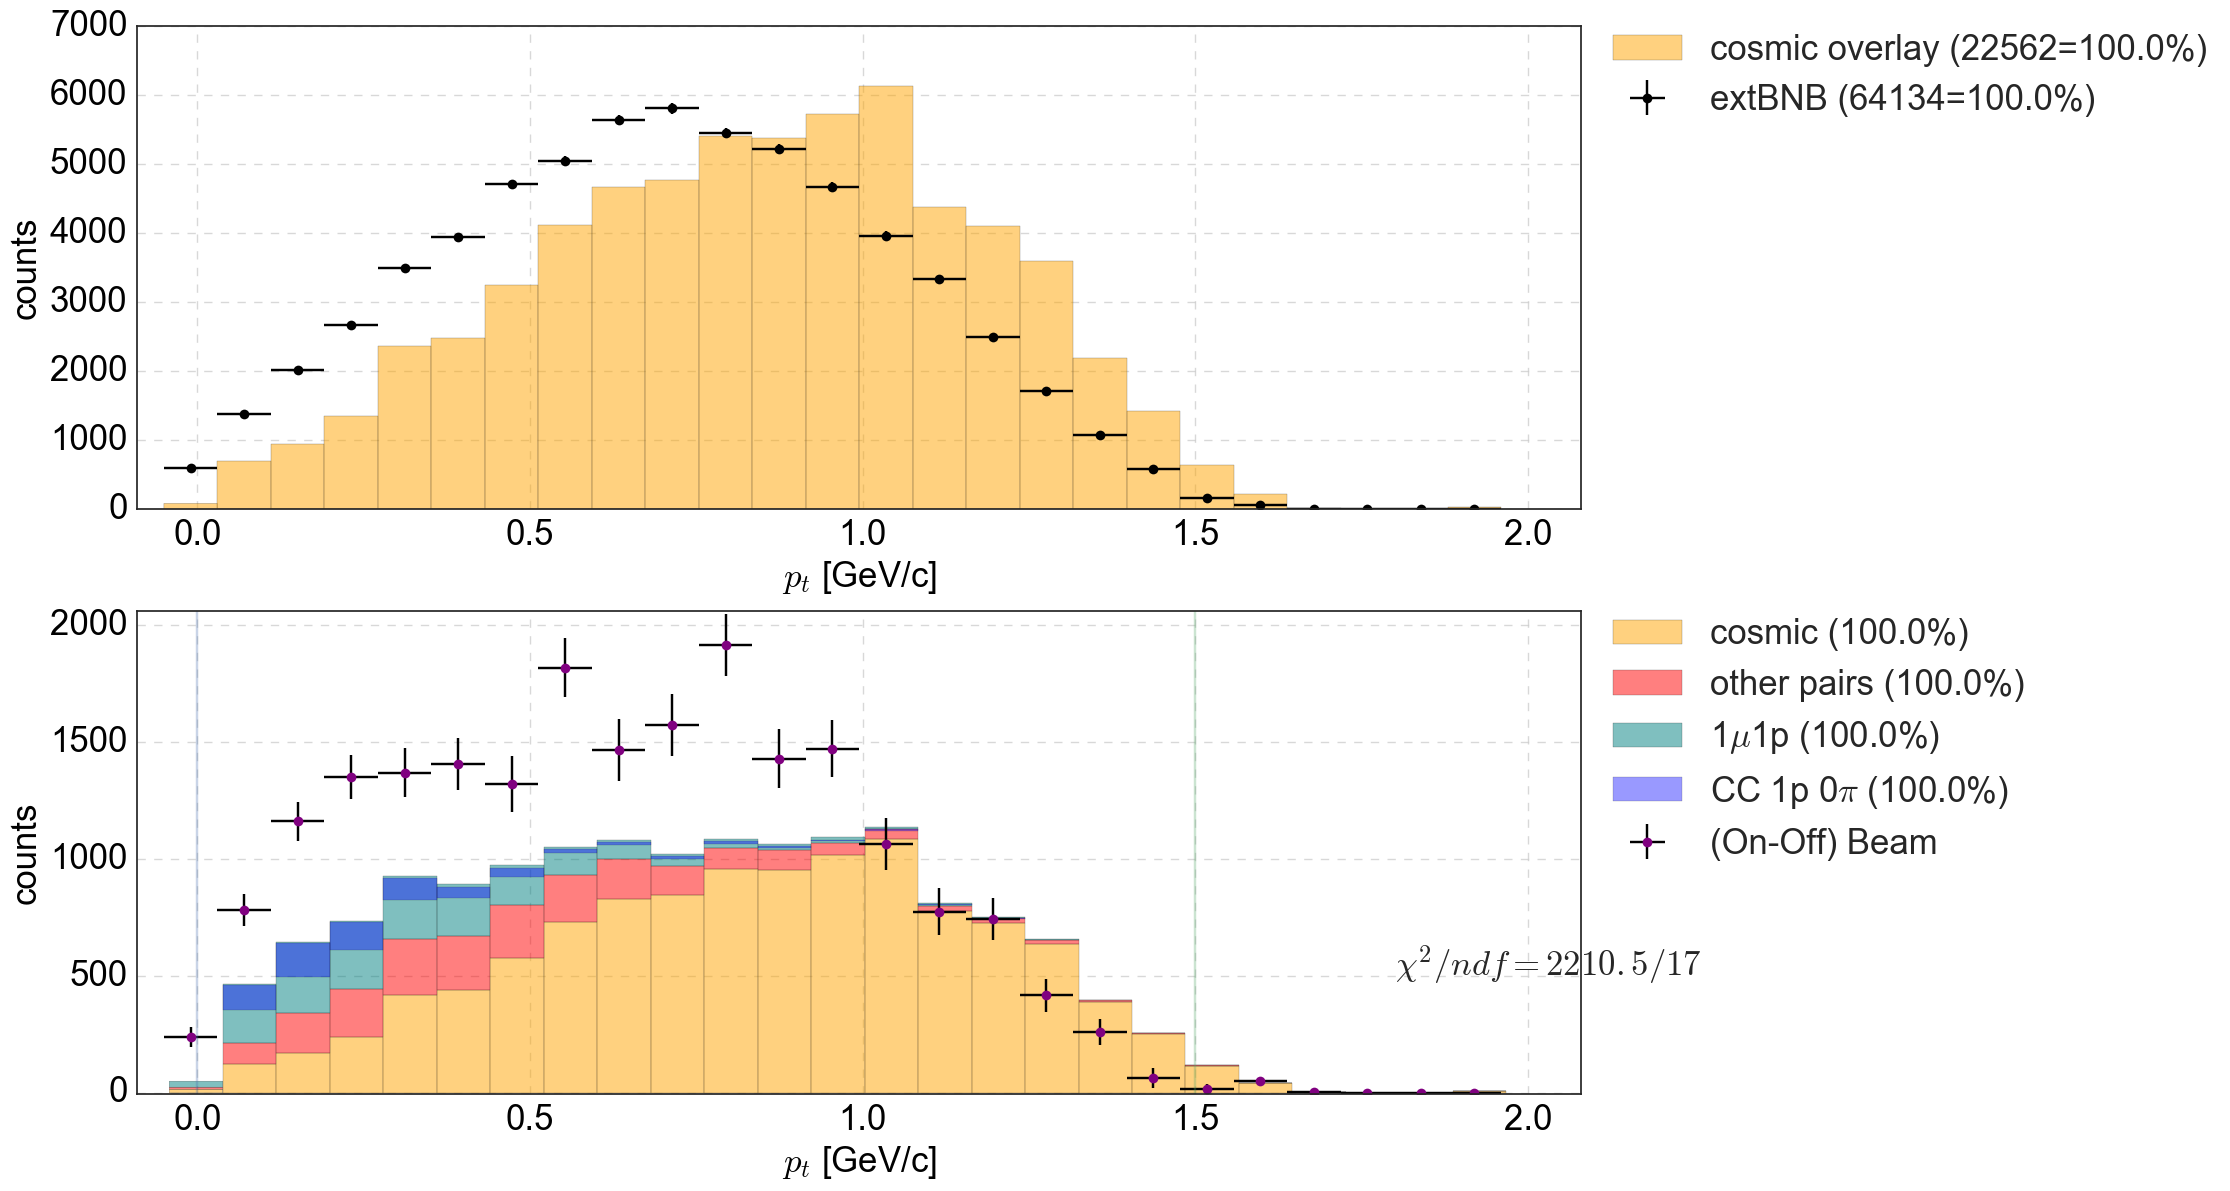

In [10]:
observables = ['distance','l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt']
x_labels = ['$d_{1,2}$ [cm]',r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]']
x_bins = [np.linspace(0,5,25),np.linspace(0,200,46),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,61),np.linspace(0,360,51),np.linspace(-0.01,2,26)]
chi2_xranges = [(0,5),(0,200),(0,70),(12,40),(0,20),(27,153),(140,220),(0,1.5)]
chi2_xy_text = [(2,1000),(80,500),(20,600),(25,400),(15,400),(40,350),(220,600),(1.8,500)]

for var,x_label,bins,chi2_xrange,chi2_xy in zip(observables,x_labels,x_bins,chi2_xranges,chi2_xy_text):
    
    fig = plt.figure(figsize=(16,12))

    ax = fig.add_subplot(2,1,1)
    ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam['no cut']                                 
                                 ,OffBeamFV=OffBeamFV,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                                 ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']
                                 ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')
    
    ax = fig.add_subplot(2,1,2)
    ax,leg=OnBeam_minus_OffBeam_1d(OnBeamSample=reduced_OnBeam['no cut'] 
                        ,OffBeamSample=reduced_OffBeam['no cut'] 
                        ,MCsamples=reduced_MCbnbDATAcosmicSamples['no cut'], MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                        ,var=var , x_label=x_label ,bins=bins  , ax=ax, legend_loc='bbox'
                                   ,do_add_chi2_MC_data=True , chi2_xrange=chi2_xrange, chi2_xy=chi2_xy)
    plt.savefig(figures_path+var+'_'+'before_cuts.pdf', bbox_inches='tight') 

# After application of cuts

# What aboue $Q^2$ dependce?

NameError: global name 'OffBeamFV' is not defined

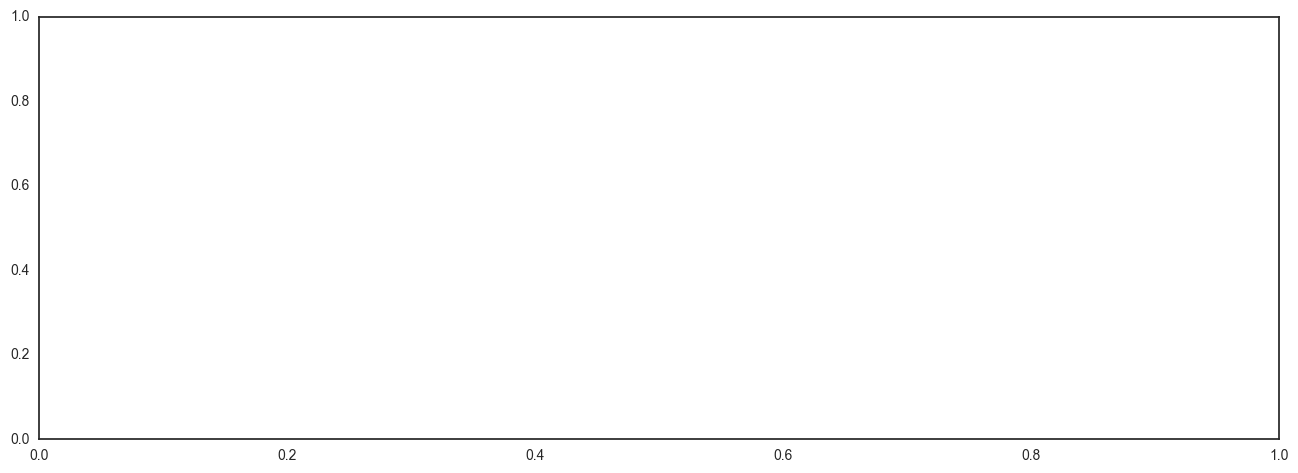

In [12]:
draw_var(cut_name='soft Pt',var='reco_Q2',x_label=r'$Q^2$ (GeV/c)$^2$',bins=np.linspace(0,1.1,35)
             ,do_cosmic_only=True,chi2_xrange=(0.,0.8),chi2_xy=(0.5,15),debug=0
         ,reduced_OnBeam=reduced_OnBeam,reduced_OffBeam=reduced_OffBeam,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples)

# averages

In [ ]:
l_mu = np.concatenate([reduced_MCbnbDATAcosmicSamples['delta phi']['1mu-1p']['l_assigned_muon']
                      ,reduced_MCbnbDATAcosmicSamples['delta phi']['cosmic']['l_assigned_muon']
                       ,reduced_MCbnbDATAcosmicSamples['delta phi']['other pairs']['l_assigned_muon']])
l_mu

In [ ]:
cut_name = 'delta phi'
var = 'l_assigned_muon'
bins = np.linspace(0,150,41)
# MCsamples = reduced_MCbnbDATAcosmicSamples[cut_name]
# avg_l_mu_overlay = np.average(l_mu_overlay)
# print 'average('+var+') in overlay:',avg_l_mu_overlay
observable = np.concatenate([reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p'][var]
                      ,reduced_MCbnbDATAcosmicSamples[cut_name]['cosmic'][var]
                       ,reduced_MCbnbDATAcosmicSamples[cut_name]['other pairs'][var]])
# for i_pair_type in [2,1,0]:
#     pgair_type=pair_types[i_pair_type]
#     sample = MCsamples[pair_type]; 
#     x_array.append(sample[var])
#     weights_array.append (MC_scaling_DATAcosmic * np.ones(len(sample)) )
#     bin_width = bins[1]-bins[0]
h,_=np.histogram( observable , weights=MC_scaling_DATAcosmic*np.ones(len(observable)) , bins=bins )         

avg_h_overlay = np.average(h)
print 'average(h('+var+')) in overlay:',avg_h_overlay
avg_l_mu_overlay = np.average(l_mu_overlay)
print 'average('+var+') in overlay:',avg_l_mu_overlay

# l_mu_off = reduced_MCbnbDATAcosmic[cut_name]['l_mu']

#     h_OnBeam,edges = np.histogram( OnBeamSample[var] , bins=bins )
#     h_OnBeam_err = np.sqrt(h_OnBeam)
#     h_OffBeam,edges = np.histogram( OffBeamSample[var] , bins=bins )
#     h_OffBeam_err = np.sqrt(h_OffBeam)
    
#     h_OnBeam_minus_OffBeam = h_OnBeam - OffBeam_scaling*h_OffBeam
#     h_OnBeam_minus_OffBeam_err = np.sqrt( np.square(h_OnBeam_err) + np.square(OffBeam_scaling*h_OffBeam_err)  )

